# IMPORTING LIBRARIES

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit

# IMPORTING DATA

In [38]:
file_paths = ['child#001.csv', 'adolescent#001.csv', 'adult#001.csv']
# Initialize an empty DataFrame to store the merged data
df = pd.DataFrame()
# Loop through the file paths and concatenate the data
for file_path in file_paths:
    df_d = pd.read_csv(file_path)
    df = pd.concat([df, df_d], ignore_index=True)
# Display the merged DataFrame
print(df)

                     Time          BG         CGM  CHO   insulin      LBGI  \
0     2023-10-25 06:00:00  104.216396  114.591591  0.0  0.006575  0.203706   
1     2023-10-25 06:05:00  104.905107  115.391832  0.0  0.006575  0.170215   
2     2023-10-25 06:10:00  105.582352  116.780220  0.0  0.006575  0.140396   
3     2023-10-25 06:15:00  106.248260  118.553025  0.0  0.006575  0.114029   
4     2023-10-25 06:20:00  106.902961  120.431335  0.0  0.006575  0.090911   
...                   ...         ...         ...  ...       ...       ...   
4315  2023-10-30 05:35:00   85.020026   81.294739  0.0  0.021125  2.713319   
4316  2023-10-30 05:40:00   85.383162   81.921877  0.0  0.021125  2.631616   
4317  2023-10-30 05:45:00   85.749449   82.446644  0.0  0.021125  2.550807   
4318  2023-10-30 05:50:00   86.118702   82.861941  0.0  0.021125  2.470953   
4319  2023-10-30 05:55:00   86.490740   83.168720  0.0  0.021125  2.392111   

      HBGI      Risk  
0      0.0  0.203706  
1      0.0  0.170

# DATA UNDERSTANDING , PREPROCESSING AND FEATURE ENGINEERING

In [4]:
# Display the first few rows
print(df.head(10))

                  Time          BG         CGM  CHO   insulin  LBGI      HBGI  \
0  2023-10-25 06:00:00  126.013943  136.435033  0.0  0.013933   0.0  0.446600   
1  2023-10-25 06:05:00  126.589661  137.121412  0.0  0.013933   0.0  0.483302   
2  2023-10-25 06:10:00  127.155902  138.398018  0.0  0.013933   0.0  0.520644   
3  2023-10-25 06:15:00  127.712577  140.060899  0.0  0.013933   0.0  0.558542   
4  2023-10-25 06:20:00  128.259611  141.830932  0.0  0.013933   0.0  0.596914   
5  2023-10-25 06:25:00  128.796943  143.429007  0.0  0.013933   0.0  0.635683   
6  2023-10-25 06:30:00  129.324526  144.576029  0.0  0.013933   0.0  0.674774   
7  2023-10-25 06:35:00  129.842325  144.992918  0.0  0.013933   0.0  0.714115   
8  2023-10-25 06:40:00  130.350322  144.400604  0.0  0.013933   0.0  0.753639   
9  2023-10-25 06:45:00  130.848506  142.520033  0.0  0.013933   0.0  0.793280   

       Risk  
0  0.446600  
1  0.483302  
2  0.520644  
3  0.558542  
4  0.596914  
5  0.635683  
6  0.67477

In [5]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (4320, 8)


In [6]:
# Display summary statistics
print(df.describe())

                BG          CGM          CHO      insulin         LBGI  \
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean    108.281085   112.261201     0.136065     0.024589    11.726586   
std      58.252846    57.416329     1.314530     0.109325    29.152820   
min       7.227086    39.000000     0.000000     0.006575     0.000000   
25%      71.621226    73.043170     0.000000     0.006575     0.000000   
50%     105.708530   106.938042     0.000000     0.013933     0.135177   
75%     132.715152   136.207540     0.000000     0.021125     7.028061   
max     387.813113   384.106087    18.400000     2.446700   245.956700   

              HBGI         Risk  
count  4320.000000  4320.000000  
mean      2.381652    14.108238  
std       6.965669    29.026492  
min       0.000000     0.000001  
25%       0.000000     0.584220  
50%       0.000000     2.962800  
75%       0.949399    11.851345  
max      54.271284   245.956700  


In [7]:
# Display data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     4320 non-null   object 
 1   BG       4320 non-null   float64
 2   CGM      4320 non-null   float64
 3   CHO      4320 non-null   float64
 4   insulin  4320 non-null   float64
 5   LBGI     4320 non-null   float64
 6   HBGI     4320 non-null   float64
 7   Risk     4320 non-null   float64
dtypes: float64(7), object(1)
memory usage: 270.1+ KB
None


In [8]:
# Keep only the required columns
df = df[['Time', 'CGM', 'CHO', 'insulin']]

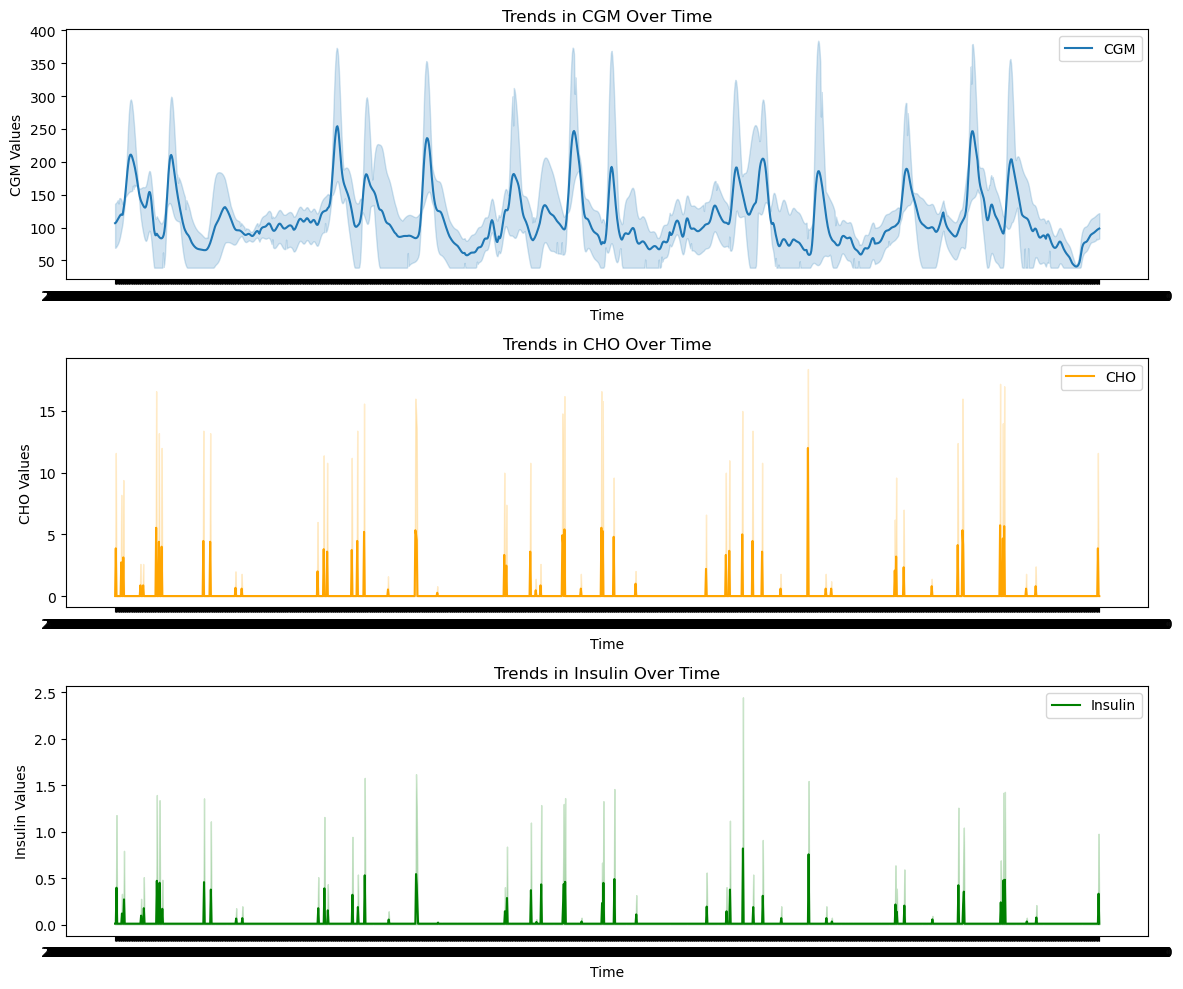

In [9]:
# Plot CGM, CHO, and Insulin trends over time
plt.figure(figsize=(12, 10))

# Plot CGM trend
plt.subplot(3, 1, 1)
sns.lineplot(x='Time', y='CGM', data=df, label='CGM')
plt.title('Trends in CGM Over Time')
plt.xlabel('Time')
plt.ylabel('CGM Values')
plt.legend()

# Plot CHO trend
plt.subplot(3, 1, 2)
sns.lineplot(x='Time', y='CHO', data=df, label='CHO', color='orange')
plt.title('Trends in CHO Over Time')
plt.xlabel('Time')
plt.ylabel('CHO Values')
plt.legend()

# Plot Insulin trend
plt.subplot(3, 1, 3)
sns.lineplot(x='Time', y='insulin', data=df, label='Insulin', color='green')
plt.title('Trends in Insulin Over Time')
plt.xlabel('Time')
plt.ylabel('Insulin Values')
plt.legend()

plt.tight_layout()
plt.show()

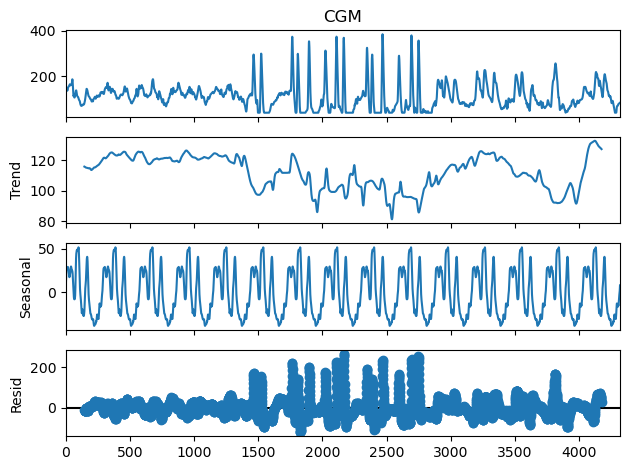

In [10]:
# 'CGM' is the target variable
result = seasonal_decompose(df['CGM'], model='additive', period=288)
result.plot()
plt.show()

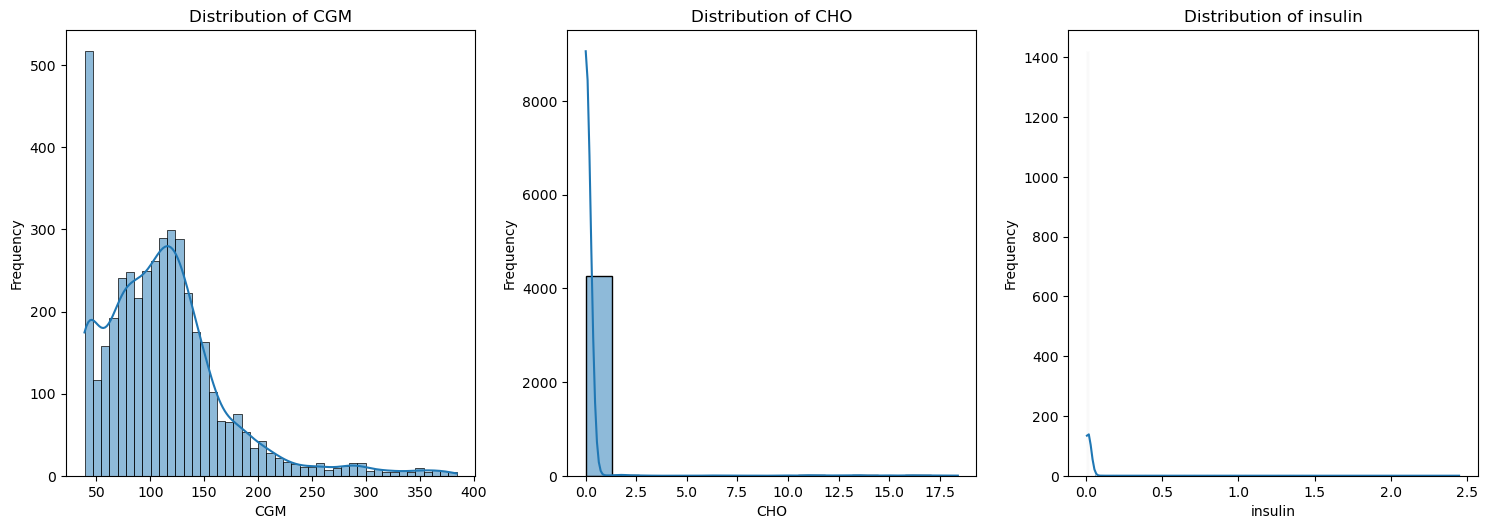

In [11]:
#  'df' is our DataFrame
df_no_time = df[['CGM', 'CHO', 'insulin']]
# Plot distributions for the selected columns
num_columns = len(df_no_time.columns)
num_rows = (num_columns // 3) + 1
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df_no_time.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df_no_time[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

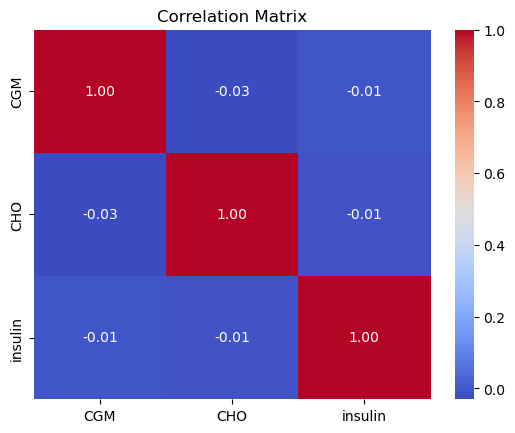

In [12]:
# Exclude non-numeric columns from the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

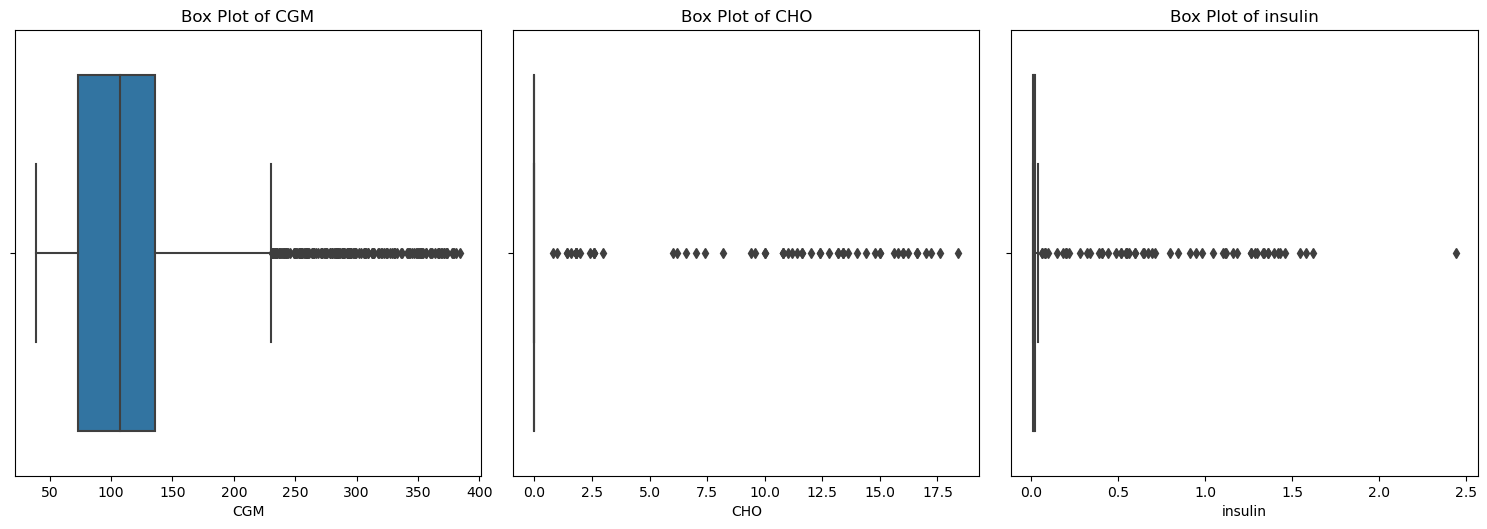

In [13]:
plt.figure(figsize=(15, num_rows * 5))
for i, column in enumerate(df_no_time.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df_no_time[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [14]:
df.loc[:, 'Time'] = pd.to_datetime(df['Time'])

In [15]:
# Define the original thresholds
original_cgm_threshold_low = 70
original_cgm_threshold_high = 180

# Get the minimum and maximum values for CGM in the original data
cgm_min = df['CGM'].min()
cgm_max = df['CGM'].max()


# Scale the thresholds based on the original data range
cgm_threshold_low = (original_cgm_threshold_low - cgm_min) / (cgm_max - cgm_min)
cgm_threshold_high = (original_cgm_threshold_high - cgm_min) / (cgm_max - cgm_min)

# Print the scaled thresholds
print("Scaled CGM Threshold Low:", cgm_threshold_low)
print("Scaled CGM Threshold High:", cgm_threshold_high)

Scaled CGM Threshold Low: 0.08982745068535679
Scaled CGM Threshold High: 0.408570017633397


In [16]:
from sklearn.preprocessing import MinMaxScaler
# Create MinMaxScaler object
scaler = MinMaxScaler()
df.loc[:, ['CGM', 'CHO', 'insulin']] = scaler.fit_transform(df[['CGM', 'CHO', 'insulin']])

In [17]:
# Display the modified DataFrame
print(df.head(10))

                  Time       CGM  CHO   insulin
0  2023-10-25 06:00:00  0.282334  0.0  0.003016
1  2023-10-25 06:05:00  0.284322  0.0  0.003016
2  2023-10-25 06:10:00  0.288022  0.0  0.003016
3  2023-10-25 06:15:00  0.292840  0.0  0.003016
4  2023-10-25 06:20:00  0.297969  0.0  0.003016
5  2023-10-25 06:25:00  0.302600  0.0  0.003016
6  2023-10-25 06:30:00  0.305923  0.0  0.003016
7  2023-10-25 06:35:00  0.307131  0.0  0.003016
8  2023-10-25 06:40:00  0.305415  0.0  0.003016
9  2023-10-25 06:45:00  0.299966  0.0  0.003016


In [18]:
# making copy of df for modelling
df_arima = df.copy()
df_prophet = df.copy()
df_prophet_cv = df.copy()

# ARIMA

In [19]:
# Set the train size to 80% of the data
train_size_arima = int(0.8 * len(df_arima))
train_arima = df_arima.iloc[:train_size_arima]
test_arima = df_arima.iloc[train_size_arima:]
# Initialize count variable
total_predictions = 0

# Lists to store actual and predicted values
actual_values_arima = []
predicted_values_arima = []

# Lists to store actual and predicted classifications
actual_categories_arima = []
predicted_categories_arima = []

In [20]:
# Continuous modeling loop
for i in range(train_size_arima, len(df_arima)):
    # Extract all previous data up to the current timestamp for training
    train_data_arima = df_arima.iloc[:i]

    # Prepare the training data with 'Time', 'CGM', 'CHO', and 'insulin' columns
    train_data_arima = train_data_arima[['Time', 'CGM', 'CHO', 'insulin']]
    train_data_arima.columns = ['ds', 'y', 'CHO', 'insulin']

    # Convert the 'Time' column to datetime format
    train_data_arima['ds'] = pd.to_datetime(train_data_arima['ds'])

    # Check if the timestamp at df['Time'][i+1] is a valid timestamp
    if i + 1 < len(df_arima) and pd.notna(df_arima['Time'][i]):
    
        # Check if the index is within the valid range
        target_index = i + 12 * 2
        if target_index < len(df_arima['CGM']):
            # Train ARIMA model
            model = ARIMA(train_data_arima['y'], order=(5, 1, 0))
            model_fit = model.fit()

            # Predict the value for 2 hours later
            predictions = model_fit.get_forecast(steps=12 * 2).predicted_mean
            predictions = predictions.iloc[-1]

            # Performance analysis
            actual_value_arima = df_arima['CGM'].iloc[target_index]
            # Calculate squared difference
            squared_error = (actual_value_arima - predictions)**2
            # Calculate RMSE
            rmse = sqrt(squared_error)
            
            # Classify as hypoglycemic or hyperglycemic
            actual_category_arima = 'Hypoglycemic' if actual_value_arima < cgm_threshold_low else 'Hyperglycemic' if actual_value_arima > cgm_threshold_high else 'Normal'
            predicted_category_arima = 'Hypoglycemic' if predictions < cgm_threshold_low else 'Hyperglycemic' if predictions > cgm_threshold_high else 'Normal'

            print(f"Iteration {i + 1}: Predicted: {predictions}, Actual: {actual_value_arima}, RMSE: {rmse}")
            print(f"   Actual Category: {actual_category_arima}, Predicted Category: {predicted_category_arima}")

            # Update the DataFrame with the predicted value for 2 hours later
            df_arima.at[i + 12 * 2, 'CGM'] = predictions

            # Update count variable
            total_predictions += 1

            # Add actual and predicted values to the lists
            actual_values_arima.append(actual_value_arima)
            predicted_values_arima.append(predictions)

            # Add actual and predicted categories to the lists
            actual_categories_arima.append(actual_category_arima)
            predicted_categories_arima.append(predicted_category_arima)

            # Add actual value to the training set for the next iteration
            train_arima = pd.concat([train_arima, df_arima.iloc[i:i + 1]])

print(f"Total Predictions: {total_predictions}")

Iteration 3457: Predicted: 0.13727262389654604, Actual: 0.16791837636243082, RMSE: 0.030645752465884774
   Actual Category: Normal, Predicted Category: Normal
Iteration 3458: Predicted: 0.15971424562261713, Actual: 0.17091760317793572, RMSE: 0.011203357555318594
   Actual Category: Normal, Predicted Category: Normal
Iteration 3459: Predicted: 0.1773735958368955, Actual: 0.17168738267980285, RMSE: 0.00568621315709264
   Actual Category: Normal, Predicted Category: Normal
Iteration 3460: Predicted: 0.17263195751092944, Actual: 0.17041459331798844, RMSE: 0.002217364192940996
   Actual Category: Normal, Predicted Category: Normal
Iteration 3461: Predicted: 0.15764439004693964, Actual: 0.16751343711662428, RMSE: 0.009869047069684639
   Actual Category: Normal, Predicted Category: Normal
Iteration 3462: Predicted: 0.14133057648190714, Actual: 0.16339812447751353, RMSE: 0.022067547995606396
   Actual Category: Normal, Predicted Category: Normal
Iteration 3463: Predicted: 0.12465360471623935, 

C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration 3469: Predicted: 0.1948552463219958, Actual: 0.15088717355714856, RMSE: 0.04396807276484724
   Actual Category: Normal, Predicted Category: Normal
Iteration 3470: Predicted: 0.1918185270565107, Actual: 0.16514216039874727, RMSE: 0.026676366657763434
   Actual Category: Normal, Predicted Category: Normal
Iteration 3471: Predicted: 0.17747942997005942, Actual: 0.1836505306813591, RMSE: 0.006171100711299671
   Actual Category: Normal, Predicted Category: Normal
Iteration 3472: Predicted: 0.15867443533321296, Actual: 0.2060989665725895, RMSE: 0.04742453123937654
   Actual Category: Normal, Predicted Category: Normal
Iteration 3473: Predicted: 0.13601795167034836, Actual: 0.23160260539688346, RMSE: 0.0955846537265351
   Actual Category: Normal, Predicted Category: Normal
Iteration 3474: Predicted: 0.1179701495057682, Actual: 0.2590761198482747, RMSE: 0.14110597034250652
   Actual Category: Normal, Predicted Category: Normal
Iteration 3475: Predicted: 0.12244511674928543, Actual: 0

C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration 3501: Predicted: 0.322570109543512, Actual: 0.36529267501083396, RMSE: 0.04272256546732195
   Actual Category: Normal, Predicted Category: Normal
Iteration 3502: Predicted: 0.23497893519563398, Actual: 0.351980565781962, RMSE: 0.11700163058632804
   Actual Category: Normal, Predicted Category: Normal
Iteration 3503: Predicted: 0.22269768727628897, Actual: 0.3391439027023462, RMSE: 0.11644621542605721
   Actual Category: Normal, Predicted Category: Normal
Iteration 3504: Predicted: 0.18585040723941537, Actual: 0.327022493262078, RMSE: 0.14117208602266262
   Actual Category: Normal, Predicted Category: Normal
Iteration 3505: Predicted: 0.015192955223498101, Actual: 0.3154425405993747, RMSE: 0.3002495853758766
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3506: Predicted: 0.0430946730316072, Actual: 0.30412471559050813, RMSE: 0.26103004255890094
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3507: Predicted: -4.536898088521486, Ac

C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration 3508: Predicted: 0.5814319078489925, Actual: 0.28113819927580097, RMSE: 0.3002937085731915
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3509: Predicted: 2.053294516121995, Actual: 0.2691259852833512, RMSE: 1.784168530838644
   Actual Category: Normal, Predicted Category: Hyperglycemic


C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Iteration 3510: Predicted: 0.18203594292448644, Actual: 0.25710078616188214, RMSE: 0.0750648432373957
   Actual Category: Normal, Predicted Category: Normal


C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration 3511: Predicted: -0.5994276436999658, Actual: 0.245517864022451, RMSE: 0.8449455077224168
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3512: Predicted: -1.289520686005677, Actual: 0.23482902741868647, RMSE: 1.5243497134243633
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3513: Predicted: 0.7022786029457407, Actual: 0.2255056842440684, RMSE: 0.4767729187016724
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3514: Predicted: 0.6509935841418213, Actual: 0.2182476474551077, RMSE: 0.4327459366867136
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3515: Predicted: 0.7525330487249173, Actual: 0.2144168999940718, RMSE: 0.5381161487308456
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3516: Predicted: 0.4579815963947798, Actual: 0.21587605670198454, RMSE: 0.24210553969279527
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3517: Predicted: 

C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Iteration 3533: Predicted: -2.9192553073180676, Actual: 0.5128274790522321, RMSE: 3.4320827863703
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Iteration 3534: Predicted: 1.3531584484838888, Actual: 0.5082353890440876, RMSE: 0.8449230594398012
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Iteration 3535: Predicted: 2.0046803465754177, Actual: 0.5009323429038732, RMSE: 1.5037480036715445
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


C:\Users\maske\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration 3536: Predicted: 2.066271996683807, Actual: 0.48990770222714397, RMSE: 1.576364294456663
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3537: Predicted: 0.8918695063911841, Actual: 0.47406791242651225, RMSE: 0.41780159396467187
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3538: Predicted: -0.19656828585191735, Actual: 0.45238627858751523, RMSE: 0.6489545644394326
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3539: Predicted: -0.21563322776008892, Actual: 0.42493139675695013, RMSE: 0.6405646245170391
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3540: Predicted: 0.5163671156116673, Actual: 0.3940609694847975, RMSE: 0.12230614612686974
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3541: Predicted: 0.6740560436684949, Actual: 0.36267302195190776, RMSE: 0.31138302171658716
   Actual Category: Normal, Predicted Category: Hyperg

Iteration 3587: Predicted: -7.066743413321902, Actual: 0.058006955784549036, RMSE: 7.124750369106451
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3588: Predicted: -2.5659665241002876, Actual: 0.04337890740447978, RMSE: 2.6093454315047673
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3589: Predicted: -1.3503622574471241, Actual: 0.03227375210243533, RMSE: 1.3826360095495596
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3590: Predicted: -0.30204798802679994, Actual: 0.025449436172760714, RMSE: 0.3274974241995606
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3591: Predicted: 0.256772806512224, Actual: 0.02405592922585567, RMSE: 0.23271687728636833
   Actual Category: Hypoglycemic, Predicted Category: Normal
Iteration 3592: Predicted: 0.4113277992085474, Actual: 0.02924805042047629, RMSE: 0.3820797487880711
   Actual Category: Hypoglycemic, Predicted Category: Hyperg

Iteration 3638: Predicted: -7.140877574249614, Actual: 0.1618152119150996, RMSE: 7.302692786164713
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3639: Predicted: -5.72156220306753, Actual: 0.15907377822414728, RMSE: 5.880635981291678
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3640: Predicted: -4.17625176667427, Actual: 0.1583496010451396, RMSE: 4.334601367719409
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3641: Predicted: -2.8130933951765, Actual: 0.1588679101632182, RMSE: 2.971961305339718
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3642: Predicted: -1.5976101944635968, Actual: 0.15984966599740194, RMSE: 1.7574598604609988
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3643: Predicted: -0.7304366485128038, Actual: 0.16052844015764026, RMSE: 0.890965088670444
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3644: Predicted: -0.22187036

Iteration 3689: Predicted: -6.625669309649814, Actual: 0.07241807887277354, RMSE: 6.698087388522588
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3690: Predicted: -5.916050162440112, Actual: 0.08925768426326794, RMSE: 6.0053078467033805
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3691: Predicted: -4.987369161027978, Actual: 0.10734975846117759, RMSE: 5.094718919489155
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3692: Predicted: -3.890060253332504, Actual: 0.12237971987814417, RMSE: 4.012439973210648
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3693: Predicted: -2.793832018989161, Actual: 0.13028297490282378, RMSE: 2.9241149938919846
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3694: Predicted: -1.8515657058616157, Actual: 0.12899460549336475, RMSE: 1.9805603113549806
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3695: Pr

Iteration 3739: Predicted: -5.969990566289911, Actual: 0.12987199643439248, RMSE: 6.0998625627243035
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3740: Predicted: -5.981984809105662, Actual: 0.12305795276392589, RMSE: 6.105042761869588
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3741: Predicted: -5.655482866005955, Actual: 0.11674055045898277, RMSE: 5.7722234164649375
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3742: Predicted: -5.043864022728475, Actual: 0.11093367504383383, RMSE: 5.154797697772309
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3743: Predicted: -4.234179539911545, Actual: 0.10565776600928198, RMSE: 4.339837305920827
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3744: Predicted: -3.3456017626015617, Actual: 0.1009856050152737, RMSE: 3.4465873676168353
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3745: Predicted: -2.5

Iteration 3789: Predicted: -4.897075321487645, Actual: 0.5949821745742575, RMSE: 5.492057496061902
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3790: Predicted: -5.345955404622178, Actual: 0.6088452079680075, RMSE: 5.954800612590186
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3791: Predicted: -5.478423221832181, Actual: 0.6191816633928664, RMSE: 6.0976048852250475
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3792: Predicted: -5.313606139696634, Actual: 0.6257330369372008, RMSE: 5.939339176633835
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3793: Predicted: -4.890160721205659, Actual: 0.6283556805895306, RMSE: 5.518516401795189
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3794: Predicted: -4.271961737636824, Actual: 0.6269652942701489, RMSE: 4.898927031906973
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycem

Iteration 3839: Predicted: -3.8509701883669636, Actual: 0.06487924770381936, RMSE: 3.9158494360707827
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3840: Predicted: -4.507723011969204, Actual: 0.05936258132129671, RMSE: 4.567085593290501
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3841: Predicted: -4.930200995153508, Actual: 0.05533078849250839, RMSE: 4.9855317836460165
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3842: Predicted: -5.094094730653856, Actual: 0.054217757425251284, RMSE: 5.148312488079107
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3843: Predicted: -5.0033750372110335, Actual: 0.05738427637549284, RMSE: 5.0607593135865265
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3844: Predicted: -4.6831968894595075, Actual: 0.06524690994918095, RMSE: 4.7484437994086885
   Actual Category: Hypoglycemic, Predicted Category: Hyp

Iteration 3888: Predicted: -2.198629892384891, Actual: 0.020185101792309368, RMSE: 2.2188149941772
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3889: Predicted: -2.9712143063876213, Actual: 0.026081137476722194, RMSE: 2.9972954438643433
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3890: Predicted: -3.6891595714415417, Actual: 0.032753854095852714, RMSE: 3.7219134255373945
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3891: Predicted: -4.265560664527003, Actual: 0.03941303268078383, RMSE: 4.304973697207787
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3892: Predicted: -4.645364135981419, Actual: 0.045271024006617505, RMSE: 4.6906351599880365
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3893: Predicted: -4.804121426397122, Actual: 0.049586461507916985, RMSE: 4.853707887905039
   Actual Category: Hypoglycemic, Predicted Category: Hyp

Iteration 3938: Predicted: -1.5992029926383198, Actual: 0.11717032995712184, RMSE: 1.7163733225954416
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3939: Predicted: -2.2777828281625476, Actual: 0.11118554578335821, RMSE: 2.388968373945906
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3940: Predicted: -2.9752377608151535, Actual: 0.10713687319639323, RMSE: 3.0823746340115465
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3941: Predicted: -3.6107276756740467, Actual: 0.10391755875124567, RMSE: 3.7146452344252925
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3942: Predicted: -4.116201039072438, Actual: 0.10042048040465312, RMSE: 4.216621519477091
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3943: Predicted: -4.447154571089645, Actual: 0.09562621572270918, RMSE: 4.542780786812354
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3944: Predicted: 

Iteration 3989: Predicted: -1.7497619522014496, Actual: 0.16285159772743737, RMSE: 1.912613549928887
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3990: Predicted: -2.386723911196518, Actual: 0.1643244523824113, RMSE: 2.5510483635789294
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3991: Predicted: -3.0215737595620116, Actual: 0.16600836269048294, RMSE: 3.1875821222524947
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3992: Predicted: -3.586595433419825, Actual: 0.16754306079451933, RMSE: 3.7541384942143443
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3993: Predicted: -4.026734897486138, Actual: 0.16859298165125622, RMSE: 4.195327879137395
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3994: Predicted: -4.305200723428408, Actual: 0.16902010931345077, RMSE: 4.4742208327418584
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3995: Predicted: -4

Iteration 4040: Predicted: -1.9173799571258727, Actual: 0.26094037872148834, RMSE: 2.178320335847361
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4041: Predicted: -2.517221612537944, Actual: 0.2565358661938031, RMSE: 2.7737574787317474
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4042: Predicted: -3.0964606403688437, Actual: 0.2524810285902137, RMSE: 3.3489416689590574
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4043: Predicted: -3.5975404589014337, Actual: 0.24912795613797437, RMSE: 3.846668415039408
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4044: Predicted: -3.974794871329475, Actual: 0.24673522950073926, RMSE: 4.221530100830214
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4045: Predicted: -4.198965684489742, Actual: 0.24536275487806777, RMSE: 4.444328439367809
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4046: Predicted: -4.2

Iteration 4091: Predicted: -2.0985714460991693, Actual: 0.20893524887505363, RMSE: 2.307506694974223
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4092: Predicted: -2.6628368433623444, Actual: 0.21797276954699793, RMSE: 2.880809612909342
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4093: Predicted: -3.1896164552612047, Actual: 0.22714081989292736, RMSE: 3.416757275154132
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4094: Predicted: -3.6294046319433795, Actual: 0.23776463781397913, RMSE: 3.8671692697573588
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4095: Predicted: -3.944658576976484, Actual: 0.2514800952967934, RMSE: 4.196138672273277
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4096: Predicted: -4.11347244600417, Actual: 0.26889302884553923, RMSE: 4.38236547484971
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4097: Predicted: -4.13

Iteration 4141: Predicted: -1.758303867410261, Actual: 0.3875004536744747, RMSE: 2.1458043210847357
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4142: Predicted: -2.2900951489665293, Actual: 0.3734721712918724, RMSE: 2.6635673202584016
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4143: Predicted: -2.8179497281621146, Actual: 0.3604007050565894, RMSE: 3.178350433218704
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4144: Predicted: -3.2924443659541254, Actual: 0.349961937223505, RMSE: 3.6424063031776304
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4145: Predicted: -3.671251069456891, Actual: 0.3416197903212074, RMSE: 4.012870859778099
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4146: Predicted: -3.924467922607464, Actual: 0.33431765866423657, RMSE: 4.258785581271701
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4147: Predicted: -4.0374

Iteration 4191: Predicted: -1.4860820026857064, Actual: 0.38119930033465865, RMSE: 1.867281303020365
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4192: Predicted: -1.9759449596658598, Actual: 0.3718402604720389, RMSE: 2.3477852201378986
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4193: Predicted: -2.488482543037591, Actual: 0.35961073906698715, RMSE: 2.8480932821045783
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4194: Predicted: -2.977019011053762, Actual: 0.3444571885731501, RMSE: 3.3214761996269124
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4195: Predicted: -3.397337961291475, Actual: 0.3278317083126281, RMSE: 3.725169669604103
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4196: Predicted: -3.7140778537136945, Actual: 0.31153536725347486, RMSE: 4.02561322096717
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4197: Predicted: -3.90

Iteration 4242: Predicted: -1.7149150236973048, Actual: 0.12839066201149854, RMSE: 1.8433056857088033
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4243: Predicted: -2.2018809986021703, Actual: 0.11845553432535302, RMSE: 2.320336532927523
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4244: Predicted: -2.68963514520324, Actual: 0.10845772294227254, RMSE: 2.798092868145513
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4245: Predicted: -3.134297708595163, Actual: 0.09871006584523459, RMSE: 3.2330077744403978
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4246: Predicted: -3.4972164045291674, Actual: 0.08944144783120703, RMSE: 3.5866578523603745
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4247: Predicted: -3.7501780222741345, Actual: 0.08088085779587373, RMSE: 3.8310588800700085
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4248:

Iteration 4293: Predicted: -1.955885795317612, Actual: 0.12437299250731701, RMSE: 2.080258787824929
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4294: Predicted: -2.4326516005131986, Actual: 0.12589358889927896, RMSE: 2.5585451894124778
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4295: Predicted: -2.8886354333790156, Actual: 0.12709697931566205, RMSE: 3.015732412694678
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 4296: Predicted: -3.2836866055902396, Actual: 0.12798592006365442, RMSE: 3.411672525653894
   Actual Category: Normal, Predicted Category: Hypoglycemic
Total Predictions: 840


# PERFORMANCE ANALYSIS OF ARIMA

In [21]:
# Convert the lists to a DataFrame for easier analysis
results_df = pd.DataFrame({
    'Actual': actual_values_arima,
    'Predicted': predicted_values_arima,
    'Actual_Category': actual_categories_arima,
    'Prediction_Category': predicted_categories_arima
})

accuracy = accuracy_score(results_df['Actual_Category'], results_df['Prediction_Category'])
precision_arima = precision_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')
recall_arima = recall_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')
f1_arima = f1_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')

print(f"\nARIMA Model Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision_arima * 100:.2f}%")
print(f"Recall: {recall_arima * 100:.2f}%")
print(f"F1-Score: {f1_arima * 100:.2f}%")

# Visualize the classification results
conf_matrix = confusion_matrix(
    results_df['Actual_Category'],
    results_df['Prediction_Category'],
    labels=['Hypoglycemic', 'Normal', 'Hyperglycemic']
)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


ARIMA Model Metrics:
Accuracy: 28.81%
Precision: 54.30%
Recall: 28.81%
F1-Score: 24.10%
Confusion Matrix:
[[159  16   3]
 [458  76  18]
 [ 87  16   7]]


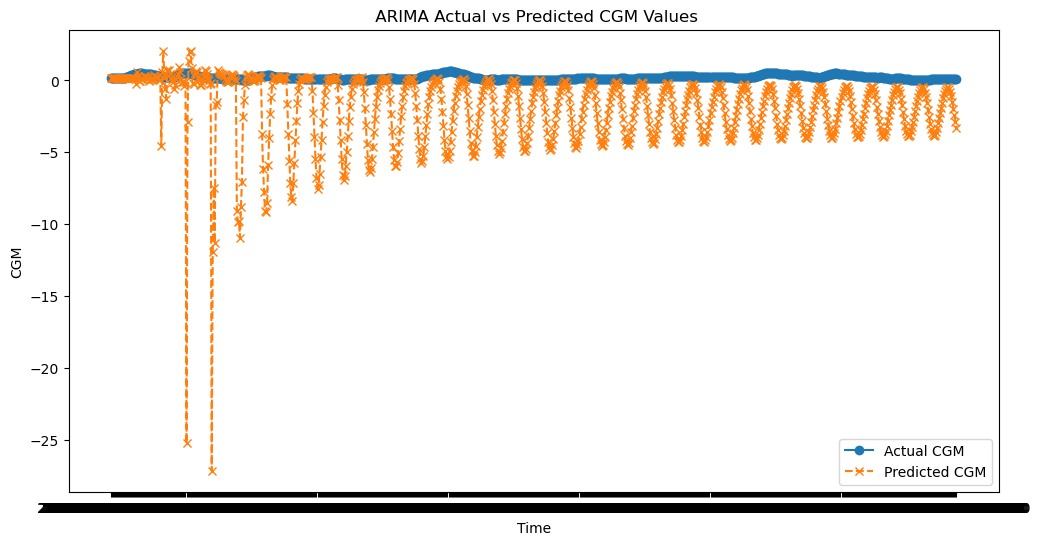

In [22]:
# Visualize the results
plt.figure(figsize=(12, 6))
# Convert the 'Time' column to string
df['Time'] = df['Time'].astype(str)

# Plot actual and predicted CGM values
time_range = df['Time'][train_size_arima:]
plt.plot(time_range[:len(results_df)], results_df['Actual'], label='Actual CGM', marker='o')
plt.plot(time_range[:len(results_df) ], results_df['Predicted'], label='Predicted CGM', linestyle='dashed', marker='x')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.legend()
plt.title(' ARIMA Actual vs Predicted CGM Values')
plt.show()

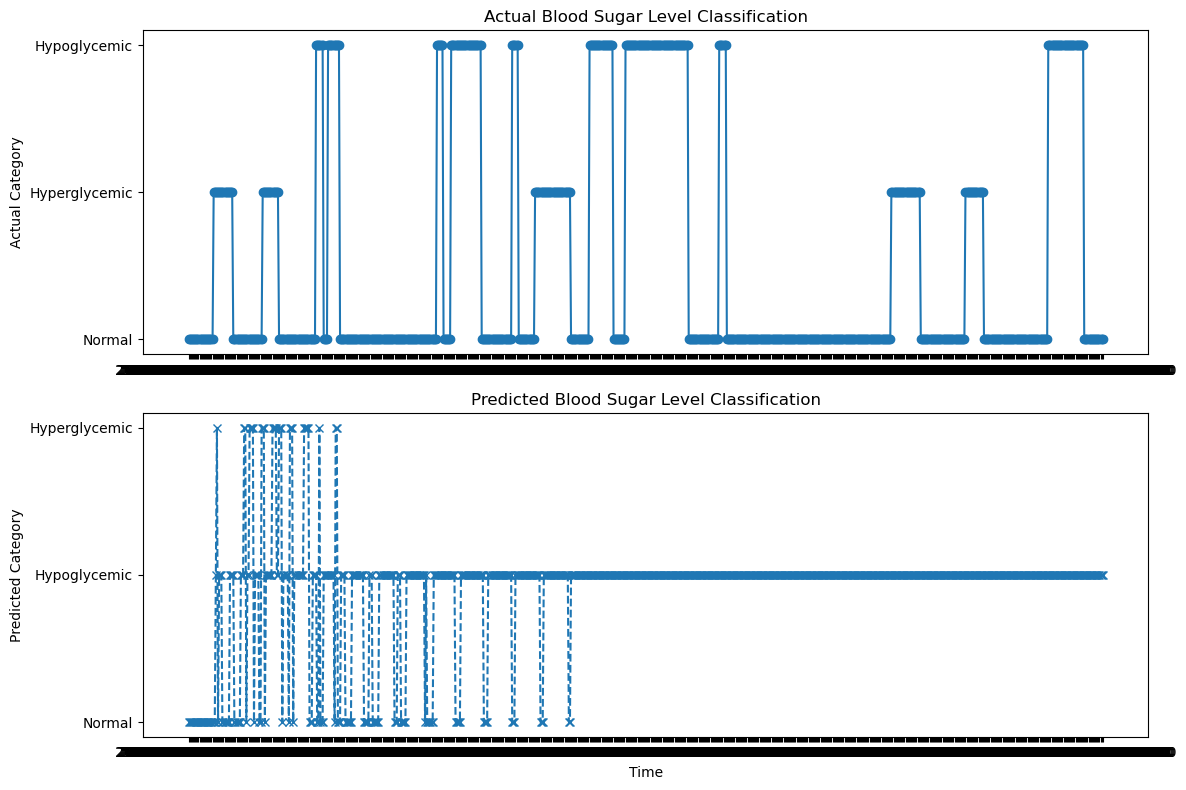

In [23]:
# Visualize the results for Blood Sugar Level Classification
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
# Plot actual and predicted classifications
axes[0].plot(time_range[:len(actual_categories_arima)], actual_categories_arima, label='Actual', marker='o')
axes[0].set_ylabel('Actual Category')
axes[0].set_title('Actual Blood Sugar Level Classification')
axes[1].plot(time_range[:len(predicted_categories_arima)], predicted_categories_arima, label='Predicted', linestyle='dashed', marker='x')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Predicted Category')
axes[1].set_title('Predicted Blood Sugar Level Classification')
plt.tight_layout()
plt.show()

# PROPHET

In [26]:
# Set the train size to 80% of the data
train_size = int(0.8 * len(df_prophet))
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]
# Initialize count variable
total_predictions = 0

# Lists to store actual and predicted values
actual_values_prophet = []
predicted_values_prophet = []

# Lists to store actual and predicted classifications
actual_categories_prophet = []
predicted_categories_prophet = []


In [27]:
# Continuous modeling loop
for i in range(train_size, len(df_prophet)):
    # Extract all previous data up to the current timestamp for training
    train_data = df_prophet.iloc[:i]
    # Create a new Prophet object for each iteration
    model = Prophet()

    # Prepare the training data with 'Time', 'CGM', 'CHO', and 'insulin' columns
    train_data = train_data[['Time', 'CGM', 'CHO', 'insulin']]
    train_data.columns = ['ds', 'y', 'CHO', 'insulin']
    model.add_regressor('CHO')
    model.fit(train_data)

    # Check if the timestamp at df['Time'][i+1] is a valid timestamp
    if i < len(df_prophet) and pd.notna(df_prophet['Time'][i]):
        current_timestamp = pd.to_datetime(df['Time'][i])
        # Check if the index is within the valid range
        target_index = i + 12 * 2
        if target_index < len(df_prophet['CGM']):
            # Predict the value for 2 hours later (only one timestamp)
            future = pd.DataFrame({
                'ds': [current_timestamp + pd.Timedelta(hours=2)],  # Single timestamp after 2 hours
                'CHO': df_prophet['CHO'][target_index],
            })

            forecast = model.predict(future)

            # Performance analysis
            predictions = forecast['yhat'].values
            actual_value = df_prophet['CGM'].iloc[target_index]
            rmse = sqrt(mean_squared_error([actual_value], predictions))
            
            # Classify as hypoglycemic or hyperglycemic
            actual_category = 'Hypoglycemic' if actual_value < cgm_threshold_low else 'Hyperglycemic' if actual_value > cgm_threshold_high else 'Normal'
            predicted_category = 'Hypoglycemic' if predictions[0] < cgm_threshold_low else 'Hyperglycemic' if predictions[0] > cgm_threshold_high else 'Normal'

            print(f"Iteration {i + 1}: Predicted: {predictions[0]}, Actual: {actual_value}, RMSE: {rmse}")
            print(f"   Actual Category: {actual_category}, Predicted Category: {predicted_category}")
            
            # Update the DataFrame with the predicted value for 2 hours later
            df_prophet.at[i + 12 * 2, 'CGM'] = predictions[0]

            # Update count variable
            total_predictions += 1

            # Add actual and predicted values to the lists
            actual_values_prophet.append(actual_value)
            predicted_values_prophet.append(predictions[0])

            # Add actual and predicted categories to the lists
            actual_categories_prophet.append(actual_category)
            predicted_categories_prophet.append(predicted_category)

            # Add actual value to the training set for the next iteration
            train = pd.concat([train, df_prophet.iloc[i:i+1]])

print(f"Total Predictions: {total_predictions}")

14:13:08 - cmdstanpy - INFO - Chain [1] start processing
14:13:08 - cmdstanpy - INFO - Chain [1] done processing
14:13:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3457: Predicted: 0.35382595411259316, Actual: 0.16791837636243082, RMSE: 0.18590757775016234
   Actual Category: Normal, Predicted Category: Normal


14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3458: Predicted: 0.3511814446980488, Actual: 0.17091760317793572, RMSE: 0.18026384152011307
   Actual Category: Normal, Predicted Category: Normal


14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3459: Predicted: 0.3489891661994764, Actual: 0.17168738267980285, RMSE: 0.17730178351967354
   Actual Category: Normal, Predicted Category: Normal


14:13:09 - cmdstanpy - INFO - Chain [1] done processing
14:13:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3460: Predicted: 0.3444233931632398, Actual: 0.17041459331798844, RMSE: 0.17400879984525133
   Actual Category: Normal, Predicted Category: Normal


14:13:10 - cmdstanpy - INFO - Chain [1] done processing
14:13:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3461: Predicted: 0.3405424444797297, Actual: 0.16751343711662428, RMSE: 0.17302900736310542
   Actual Category: Normal, Predicted Category: Normal


14:13:10 - cmdstanpy - INFO - Chain [1] done processing
14:13:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3462: Predicted: 0.3378326876393234, Actual: 0.16339812447751353, RMSE: 0.17443456316180986
   Actual Category: Normal, Predicted Category: Normal


14:13:10 - cmdstanpy - INFO - Chain [1] done processing
14:13:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3463: Predicted: 0.3312556364553877, Actual: 0.15848287401922254, RMSE: 0.17277276243616516
   Actual Category: Normal, Predicted Category: Normal


14:13:10 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3464: Predicted: 0.2546109518554951, Actual: 0.1531819124195218, RMSE: 0.10142903943597328
   Actual Category: Normal, Predicted Category: Normal


14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3465: Predicted: 0.32101076622705765, Actual: 0.1479098079263734, RMSE: 0.17310095830068425
   Actual Category: Normal, Predicted Category: Normal


14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3466: Predicted: 0.3151199443969334, Actual: 0.143115889052052, RMSE: 0.17200405534488142
   Actual Category: Normal, Predicted Category: Normal


14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3467: Predicted: 0.3093612663233051, Actual: 0.13955219250787412, RMSE: 0.16980907381543095
   Actual Category: Normal, Predicted Category: Normal


14:13:12 - cmdstanpy - INFO - Chain [1] done processing
14:13:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3468: Predicted: 0.30315923429332425, Actual: 0.14021739165975258, RMSE: 0.16294184263357167
   Actual Category: Normal, Predicted Category: Normal


14:13:12 - cmdstanpy - INFO - Chain [1] done processing
14:13:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3469: Predicted: 0.29803095712844213, Actual: 0.15088717355714856, RMSE: 0.14714378357129357
   Actual Category: Normal, Predicted Category: Normal


14:13:13 - cmdstanpy - INFO - Chain [1] done processing
14:13:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3470: Predicted: 0.290931215427891, Actual: 0.16514216039874727, RMSE: 0.12578905502914375
   Actual Category: Normal, Predicted Category: Normal


14:13:13 - cmdstanpy - INFO - Chain [1] done processing
14:13:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3471: Predicted: 0.2846520909648359, Actual: 0.1836505306813591, RMSE: 0.10100156028347682
   Actual Category: Normal, Predicted Category: Normal


14:13:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3472: Predicted: 0.27832976367619316, Actual: 0.2060989665725895, RMSE: 0.07223079710360367
   Actual Category: Normal, Predicted Category: Normal


14:13:14 - cmdstanpy - INFO - Chain [1] start processing
14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3473: Predicted: 0.2739872971765053, Actual: 0.23160260539688346, RMSE: 0.042384691779621814
   Actual Category: Normal, Predicted Category: Normal


14:13:14 - cmdstanpy - INFO - Chain [1] done processing
14:13:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3474: Predicted: 0.26675107894267, Actual: 0.2590761198482747, RMSE: 0.007674959094395251
   Actual Category: Normal, Predicted Category: Normal


14:13:15 - cmdstanpy - INFO - Chain [1] done processing
14:13:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3475: Predicted: 0.2597883758327404, Actual: 0.2874884433860072, RMSE: 0.027700067553266816
   Actual Category: Normal, Predicted Category: Normal


14:13:15 - cmdstanpy - INFO - Chain [1] done processing
14:13:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3476: Predicted: 0.25466529967900886, Actual: 0.3160062279243896, RMSE: 0.06134092824538073
   Actual Category: Normal, Predicted Category: Normal


14:13:15 - cmdstanpy - INFO - Chain [1] done processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3477: Predicted: 0.24853417122789417, Actual: 0.34405388575032003, RMSE: 0.09551971452242586
   Actual Category: Normal, Predicted Category: Normal


14:13:16 - cmdstanpy - INFO - Chain [1] done processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3478: Predicted: 0.24334295992290395, Actual: 0.3712737471693468, RMSE: 0.12793078724644286
   Actual Category: Normal, Predicted Category: Normal


14:13:16 - cmdstanpy - INFO - Chain [1] done processing
14:13:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3479: Predicted: 0.2217844490213674, Actual: 0.39719347866235843, RMSE: 0.17540902964099103
   Actual Category: Normal, Predicted Category: Normal


14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3480: Predicted: 0.23347817820506256, Actual: 0.42080348385354327, RMSE: 0.1873253056484807
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3481: Predicted: 0.22970954419556772, Actual: 0.4411532651118363, RMSE: 0.21144372091626856
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3482: Predicted: 0.22667411000084467, Actual: 0.45769300599856333, RMSE: 0.23101889599771866
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:18 - cmdstanpy - INFO - Chain [1] done processing
14:13:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3483: Predicted: 0.22202509956143981, Actual: 0.4701841799149924, RMSE: 0.24815908035355258
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:18 - cmdstanpy - INFO - Chain [1] done processing
14:13:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3484: Predicted: 0.22004549620012193, Actual: 0.47861008886254186, RMSE: 0.25856459266241993
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:18 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3485: Predicted: 0.21772750340322736, Actual: 0.4835385271272693, RMSE: 0.265811023724042
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3486: Predicted: 0.2145609067520886, Actual: 0.48552952650327286, RMSE: 0.27096861975118425
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3487: Predicted: 0.21371198053406662, Actual: 0.4850355429597718, RMSE: 0.2713235624257052
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3488: Predicted: 0.21237082699528348, Actual: 0.48246519466870297, RMSE: 0.2700943676734195
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3489: Predicted: 0.21162686923221719, Actual: 0.47814341486999745, RMSE: 0.26651654563778027
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3490: Predicted: 0.21116228062536602, Actual: 0.4722371324163185, RMSE: 0.26107485179095247
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3491: Predicted: 0.2117784855696307, Actual: 0.4649527136392003, RMSE: 0.25317422806956963
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3492: Predicted: 0.21261175106487853, Actual: 0.45675287148227894, RMSE: 0.2441411204174004
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:21 - cmdstanpy - INFO - Chain [1] done processing
14:13:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3493: Predicted: 0.21368198347885753, Actual: 0.44829858786754295, RMSE: 0.23461660438868542
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3494: Predicted: 0.21568919849575077, Actual: 0.44005367926144145, RMSE: 0.22436448076569068
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3495: Predicted: 0.2179827827894345, Actual: 0.43183485646427355, RMSE: 0.21385207367483905
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:22 - cmdstanpy - INFO - Chain [1] done processing
14:13:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3496: Predicted: 0.22108618322956988, Actual: 0.4232723813206811, RMSE: 0.20218619809111124
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3497: Predicted: 0.22374901358540344, Actual: 0.4139454821440205, RMSE: 0.19019646855861705
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3498: Predicted: 0.2274899691505911, Actual: 0.40342134057525914, RMSE: 0.17593137142466803
   Actual Category: Normal, Predicted Category: Normal


14:13:23 - cmdstanpy - INFO - Chain [1] done processing
14:13:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3499: Predicted: 0.23133046164827986, Actual: 0.3915168900813196, RMSE: 0.16018642843303976
   Actual Category: Normal, Predicted Category: Normal


14:13:24 - cmdstanpy - INFO - Chain [1] done processing
14:13:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3500: Predicted: 0.23507962835320279, Actual: 0.3786349376431358, RMSE: 0.14355530928993304
   Actual Category: Normal, Predicted Category: Normal


14:13:24 - cmdstanpy - INFO - Chain [1] done processing
14:13:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3501: Predicted: 0.2401337725508167, Actual: 0.36529267501083396, RMSE: 0.12515890246001726
   Actual Category: Normal, Predicted Category: Normal


14:13:24 - cmdstanpy - INFO - Chain [1] done processing
14:13:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3502: Predicted: 0.24416942307865092, Actual: 0.351980565781962, RMSE: 0.1078111427033111
   Actual Category: Normal, Predicted Category: Normal


14:13:24 - cmdstanpy - INFO - Chain [1] done processing
14:13:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3503: Predicted: 0.24915327189217934, Actual: 0.3391439027023462, RMSE: 0.08999063081016684
   Actual Category: Normal, Predicted Category: Normal


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3504: Predicted: 0.2541112666015472, Actual: 0.327022493262078, RMSE: 0.07291122666053079
   Actual Category: Normal, Predicted Category: Normal


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3505: Predicted: 0.2593364844867896, Actual: 0.3154425405993747, RMSE: 0.05610605611258512
   Actual Category: Normal, Predicted Category: Normal


14:13:25 - cmdstanpy - INFO - Chain [1] done processing
14:13:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3506: Predicted: 0.26446492383489417, Actual: 0.30412471559050813, RMSE: 0.03965979175561396
   Actual Category: Normal, Predicted Category: Normal


14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3507: Predicted: 0.26998554419024623, Actual: 0.2927802455514644, RMSE: 0.022794701361218195
   Actual Category: Normal, Predicted Category: Normal


14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3508: Predicted: 0.27499997979791996, Actual: 0.28113819927580097, RMSE: 0.006138219477881013
   Actual Category: Normal, Predicted Category: Normal


14:13:26 - cmdstanpy - INFO - Chain [1] done processing
14:13:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3509: Predicted: 0.27999517472056024, Actual: 0.2691259852833512, RMSE: 0.010869189437209048
   Actual Category: Normal, Predicted Category: Normal


14:13:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3510: Predicted: 0.2852118614278424, Actual: 0.25710078616188214, RMSE: 0.02811107526596024
   Actual Category: Normal, Predicted Category: Normal


14:13:27 - cmdstanpy - INFO - Chain [1] start processing
14:13:27 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3511: Predicted: 0.29019512342576814, Actual: 0.245517864022451, RMSE: 0.044677259403317154
   Actual Category: Normal, Predicted Category: Normal


14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3512: Predicted: 0.21173388910299096, Actual: 0.23482902741868647, RMSE: 0.023095138315695513
   Actual Category: Normal, Predicted Category: Normal


14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3513: Predicted: 0.29949416416181796, Actual: 0.2255056842440684, RMSE: 0.07398847991774957
   Actual Category: Normal, Predicted Category: Normal


14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3514: Predicted: 0.3037318441316177, Actual: 0.2182476474551077, RMSE: 0.08548419667651
   Actual Category: Normal, Predicted Category: Normal


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3515: Predicted: 0.3074667218533957, Actual: 0.2144168999940718, RMSE: 0.0930498218593239
   Actual Category: Normal, Predicted Category: Normal


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3516: Predicted: 0.311194651066689, Actual: 0.21587605670198454, RMSE: 0.09531859436470444
   Actual Category: Normal, Predicted Category: Normal


14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3517: Predicted: 0.3144222492884325, Actual: 0.22485638189693838, RMSE: 0.08956586739149411
   Actual Category: Normal, Predicted Category: Normal


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3518: Predicted: 0.31720689049769046, Actual: 0.23813101671472378, RMSE: 0.07907587378296668
   Actual Category: Normal, Predicted Category: Normal


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3519: Predicted: 0.31974862478076616, Actual: 0.2417735387056081, RMSE: 0.07797508607515805
   Actual Category: Normal, Predicted Category: Normal


14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3520: Predicted: 0.32136129740880653, Actual: 0.2570292137447733, RMSE: 0.06433208366403326
   Actual Category: Normal, Predicted Category: Normal


14:13:31 - cmdstanpy - INFO - Chain [1] done processing
14:13:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3521: Predicted: 0.32256183213402684, Actual: 0.2812640022570232, RMSE: 0.041297829877003644
   Actual Category: Normal, Predicted Category: Normal


14:13:31 - cmdstanpy - INFO - Chain [1] done processing
14:13:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3522: Predicted: 0.3233687140745507, Actual: 0.31164579222421507, RMSE: 0.011722921850335632
   Actual Category: Normal, Predicted Category: Normal


14:13:31 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3523: Predicted: 0.3241994178899761, Actual: 0.34543765021616646, RMSE: 0.021238232326190376
   Actual Category: Normal, Predicted Category: Normal


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3524: Predicted: 0.3239340016417065, Actual: 0.38016208013118924, RMSE: 0.05622807848948275
   Actual Category: Normal, Predicted Category: Normal


14:13:32 - cmdstanpy - INFO - Chain [1] done processing
14:13:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3525: Predicted: 0.3227418929626963, Actual: 0.41366634801542035, RMSE: 0.09092445505272406
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:33 - cmdstanpy - INFO - Chain [1] done processing
14:13:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3526: Predicted: 0.32191554531404565, Actual: 0.44412290870798277, RMSE: 0.12220736339393712
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:33 - cmdstanpy - INFO - Chain [1] done processing
14:13:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3527: Predicted: 0.3195694487808462, Actual: 0.4700025214332295, RMSE: 0.15043307265238332
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:33 - cmdstanpy - INFO - Chain [1] done processing
14:13:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3528: Predicted: 0.31724720658514816, Actual: 0.4900891164278953, RMSE: 0.17284190984274717
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3529: Predicted: 0.31444358768899106, Actual: 0.503857277022348, RMSE: 0.1894136893333569
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3530: Predicted: 0.3116924295729783, Actual: 0.5119777490615349, RMSE: 0.2002853194885566
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:34 - cmdstanpy - INFO - Chain [1] done processing
14:13:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3531: Predicted: 0.30661367896102404, Actual: 0.5154671301515119, RMSE: 0.20885345119048787
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:35 - cmdstanpy - INFO - Chain [1] done processing
14:13:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3532: Predicted: 0.3022999935167353, Actual: 0.5154033463317728, RMSE: 0.21310335281503745
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:35 - cmdstanpy - INFO - Chain [1] done processing
14:13:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3533: Predicted: 0.2976493668638819, Actual: 0.5128274790522321, RMSE: 0.21517811218835026
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:35 - cmdstanpy - INFO - Chain [1] done processing
14:13:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3534: Predicted: 0.2922703462273001, Actual: 0.5082353890440876, RMSE: 0.21596504281678752
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:36 - cmdstanpy - INFO - Chain [1] done processing
14:13:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3535: Predicted: 0.2865112762215861, Actual: 0.5009323429038732, RMSE: 0.2144210666822871
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:36 - cmdstanpy - INFO - Chain [1] done processing
14:13:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3536: Predicted: 0.2800888219003503, Actual: 0.48990770222714397, RMSE: 0.2098188803267937
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:36 - cmdstanpy - INFO - Chain [1] done processing
14:13:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3537: Predicted: 0.2736334557144297, Actual: 0.47406791242651225, RMSE: 0.20043445671208254
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3538: Predicted: 0.2670168327354152, Actual: 0.45238627858751523, RMSE: 0.18536944585210002
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:37 - cmdstanpy - INFO - Chain [1] done processing
14:13:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3539: Predicted: 0.2599849012643614, Actual: 0.42493139675695013, RMSE: 0.16494649549258872
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:13:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3540: Predicted: 0.25299869416751203, Actual: 0.3940609694847975, RMSE: 0.1410622753172855
   Actual Category: Normal, Predicted Category: Normal


14:13:38 - cmdstanpy - INFO - Chain [1] start processing
14:13:38 - cmdstanpy - INFO - Chain [1] done processing
14:13:38 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3541: Predicted: 0.2451910904664415, Actual: 0.36267302195190776, RMSE: 0.11748193148546626
   Actual Category: Normal, Predicted Category: Normal


14:13:38 - cmdstanpy - INFO - Chain [1] done processing
14:13:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3542: Predicted: 0.2381116835044051, Actual: 0.333640989638619, RMSE: 0.0955293061342139
   Actual Category: Normal, Predicted Category: Normal


14:13:39 - cmdstanpy - INFO - Chain [1] done processing
14:13:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3543: Predicted: 0.230558402744091, Actual: 0.309642079571696, RMSE: 0.07908367682760498
   Actual Category: Normal, Predicted Category: Normal


14:13:39 - cmdstanpy - INFO - Chain [1] done processing
14:13:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3544: Predicted: 0.2225094545795438, Actual: 0.29208672541547054, RMSE: 0.06957727083592674
   Actual Category: Normal, Predicted Category: Normal


14:13:39 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3545: Predicted: 0.2150620866986384, Actual: 0.2797507551917199, RMSE: 0.06468866849308147
   Actual Category: Normal, Predicted Category: Normal


14:13:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3546: Predicted: 0.20762599738728166, Actual: 0.2707644003114751, RMSE: 0.06313840292419343
   Actual Category: Normal, Predicted Category: Normal


14:13:40 - cmdstanpy - INFO - Chain [1] start processing
14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3547: Predicted: 0.20030939363596006, Actual: 0.2632293876504209, RMSE: 0.06291999401446086
   Actual Category: Normal, Predicted Category: Normal


14:13:40 - cmdstanpy - INFO - Chain [1] done processing
14:13:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3548: Predicted: 0.19327567512997448, Actual: 0.255314666792802, RMSE: 0.06203899166282753
   Actual Category: Normal, Predicted Category: Normal


14:13:41 - cmdstanpy - INFO - Chain [1] done processing
14:13:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3549: Predicted: 0.18604285720570635, Actual: 0.24588673167696654, RMSE: 0.05984387447126019
   Actual Category: Normal, Predicted Category: Normal


14:13:41 - cmdstanpy - INFO - Chain [1] done processing
14:13:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3550: Predicted: 0.1794304271157563, Actual: 0.23531741392082003, RMSE: 0.05588698680506374
   Actual Category: Normal, Predicted Category: Normal


14:13:41 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3551: Predicted: 0.17319913628272476, Actual: 0.22432644378743857, RMSE: 0.05112730750471381
   Actual Category: Normal, Predicted Category: Normal


14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3552: Predicted: 0.1671072141664886, Actual: 0.213626806393136, RMSE: 0.046519592226647394
   Actual Category: Normal, Predicted Category: Normal


14:13:42 - cmdstanpy - INFO - Chain [1] done processing
14:13:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3553: Predicted: 0.16167363665091258, Actual: 0.20389914802951067, RMSE: 0.04222551137859809
   Actual Category: Normal, Predicted Category: Normal


14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3554: Predicted: 0.1560953930437283, Actual: 0.19560080776080815, RMSE: 0.039505414717079856
   Actual Category: Normal, Predicted Category: Normal


14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3555: Predicted: 0.15173082333177346, Actual: 0.18871952701504766, RMSE: 0.0369887036832742
   Actual Category: Normal, Predicted Category: Normal


14:13:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3556: Predicted: 0.14721963365239943, Actual: 0.18313156183226623, RMSE: 0.0359119281798668
   Actual Category: Normal, Predicted Category: Normal


14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:44 - cmdstanpy - INFO - Chain [1] done processing
14:13:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3557: Predicted: 0.14387750258403914, Actual: 0.1787122345486251, RMSE: 0.03483473196458595
   Actual Category: Normal, Predicted Category: Normal


14:13:44 - cmdstanpy - INFO - Chain [1] done processing
14:13:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3558: Predicted: 0.14069639530576938, Actual: 0.17532347301180481, RMSE: 0.03462707770603543
   Actual Category: Normal, Predicted Category: Normal


14:13:44 - cmdstanpy - INFO - Chain [1] done processing
14:13:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3559: Predicted: 0.13800816991996231, Actual: 0.17272367908763417, RMSE: 0.034715509167671854
   Actual Category: Normal, Predicted Category: Normal


14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3560: Predicted: 0.13602450008028052, Actual: 0.1704516659250789, RMSE: 0.03442716584479838
   Actual Category: Normal, Predicted Category: Normal


14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3561: Predicted: 0.13438771864112364, Actual: 0.16799494403174017, RMSE: 0.03360722539061653
   Actual Category: Normal, Predicted Category: Normal


14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3562: Predicted: 0.1338163651023302, Actual: 0.16484163014271438, RMSE: 0.031025265040384192
   Actual Category: Normal, Predicted Category: Normal


14:13:45 - cmdstanpy - INFO - Chain [1] done processing
14:13:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3563: Predicted: 0.13362783504896092, Actual: 0.1604806357829757, RMSE: 0.026852800734014776
   Actual Category: Normal, Predicted Category: Normal


14:13:46 - cmdstanpy - INFO - Chain [1] done processing
14:13:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3564: Predicted: 0.13386131171523433, Actual: 0.15440186728032132, RMSE: 0.020540555565086993
   Actual Category: Normal, Predicted Category: Normal


14:13:46 - cmdstanpy - INFO - Chain [1] done processing
14:13:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3565: Predicted: 0.1347528435634054, Actual: 0.1460964653454976, RMSE: 0.011343621782092222
   Actual Category: Normal, Predicted Category: Normal


14:13:46 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3566: Predicted: 0.1366515059696382, Actual: 0.13505712136908662, RMSE: 0.001594384600551585
   Actual Category: Normal, Predicted Category: Normal


14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3567: Predicted: 0.1389719896106454, Actual: 0.12077851475663362, RMSE: 0.018193474854011793
   Actual Category: Normal, Predicted Category: Normal


14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3568: Predicted: 0.1419468176014991, Actual: 0.1095479634868397, RMSE: 0.0323988541146594
   Actual Category: Normal, Predicted Category: Normal


14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3569: Predicted: 0.1451911627184702, Actual: 0.12048137261039657, RMSE: 0.024709790108073643
   Actual Category: Normal, Predicted Category: Normal


14:13:47 - cmdstanpy - INFO - Chain [1] done processing
14:13:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3570: Predicted: 0.1488705340812477, Actual: 0.12335824755756139, RMSE: 0.02551228652368631
   Actual Category: Normal, Predicted Category: Normal


14:13:48 - cmdstanpy - INFO - Chain [1] done processing
14:13:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3571: Predicted: 0.15356910202538238, Actual: 0.11995832884339994, RMSE: 0.03361077318198244
   Actual Category: Normal, Predicted Category: Normal


14:13:48 - cmdstanpy - INFO - Chain [1] done processing
14:13:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3572: Predicted: 0.1580308922478939, Actual: 0.11205498613195045, RMSE: 0.04597590611594346
   Actual Category: Normal, Predicted Category: Normal


14:13:48 - cmdstanpy - INFO - Chain [1] done processing
14:13:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3573: Predicted: 0.16334910876077346, Actual: 0.10140764841612798, RMSE: 0.06194146034464548
   Actual Category: Normal, Predicted Category: Normal


14:13:49 - cmdstanpy - INFO - Chain [1] done processing
14:13:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3574: Predicted: 0.1691096071182788, Actual: 0.08976119202686739, RMSE: 0.07934841509141141
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3575: Predicted: 0.17511942643928427, Actual: 0.07885377034847946, RMSE: 0.09626565609080481
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:49 - cmdstanpy - INFO - Chain [1] start processing
14:13:49 - cmdstanpy - INFO - Chain [1] done processing
14:13:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3576: Predicted: 0.18110943501222457, Actual: 0.07042620473798131, RMSE: 0.11068323027424326
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3577: Predicted: 0.18820467479036132, Actual: 0.0662276000113804, RMSE: 0.12197707477898093
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3578: Predicted: 0.1946028501078224, Actual: 0.0678474094702122, RMSE: 0.1267554406376102
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3579: Predicted: 0.20155577711557301, Actual: 0.07552875987861557, RMSE: 0.12602701723695744
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:51 - cmdstanpy - INFO - Chain [1] done processing
14:13:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3580: Predicted: 0.20868036562957562, Actual: 0.08664206562722582, RMSE: 0.1220383000023498
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:51 - cmdstanpy - INFO - Chain [1] done processing
14:13:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3581: Predicted: 0.21584807857528268, Actual: 0.09788472572357551, RMSE: 0.11796335285170717
   Actual Category: Normal, Predicted Category: Normal


14:13:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3582: Predicted: 0.2230016520347716, Actual: 0.10595683047072282, RMSE: 0.11704482156404877
   Actual Category: Normal, Predicted Category: Normal


14:13:51 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3583: Predicted: 0.23023787653981875, Actual: 0.10775587466638131, RMSE: 0.12248200187343744
   Actual Category: Normal, Predicted Category: Normal


14:13:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3584: Predicted: 0.23730839391092517, Actual: 0.10174812760743632, RMSE: 0.13556026630348886
   Actual Category: Normal, Predicted Category: Normal


14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3585: Predicted: 0.24384808083501655, Actual: 0.08973241775011351, RMSE: 0.15411566308490304
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:53 - cmdstanpy - INFO - Chain [1] done processing
14:13:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3586: Predicted: 0.15675280711713982, Actual: 0.07429127747137346, RMSE: 0.08246152964576636
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:53 - cmdstanpy - INFO - Chain [1] done processing
14:13:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3587: Predicted: 0.2571244951186805, Actual: 0.058006955784549036, RMSE: 0.19911753933413148
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:53 - cmdstanpy - INFO - Chain [1] done processing
14:13:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3588: Predicted: 0.263168099385708, Actual: 0.04337890740447978, RMSE: 0.21978919198122823
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:54 - cmdstanpy - INFO - Chain [1] done processing
14:13:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3589: Predicted: 0.26927353616803507, Actual: 0.03227375210243533, RMSE: 0.23699978406559974
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:54 - cmdstanpy - INFO - Chain [1] done processing
14:13:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3590: Predicted: 0.27492538078776746, Actual: 0.025449436172760714, RMSE: 0.24947594461500675
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:54 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3591: Predicted: 0.2797361859208587, Actual: 0.02405592922585567, RMSE: 0.25568025669500305
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3592: Predicted: 0.2845651102038842, Actual: 0.02924805042047629, RMSE: 0.2553170597834079
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3593: Predicted: 0.2889628120350892, Actual: 0.041137293765774796, RMSE: 0.24782551826931443
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3594: Predicted: 0.29205633243037343, Actual: 0.05887130117212955, RMSE: 0.23318503125824389
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3595: Predicted: 0.29517754901607085, Actual: 0.08151114016461475, RMSE: 0.2136664088514561
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:13:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3596: Predicted: 0.29778122417232034, Actual: 0.10786680567198662, RMSE: 0.18991441850033372
   Actual Category: Normal, Predicted Category: Normal


14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3597: Predicted: 0.2995804505453568, Actual: 0.1366909926525909, RMSE: 0.1628894578927659
   Actual Category: Normal, Predicted Category: Normal


14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3598: Predicted: 0.3009289993152733, Actual: 0.16687944115564265, RMSE: 0.13404955815963063
   Actual Category: Normal, Predicted Category: Normal


14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3599: Predicted: 0.30135296963448444, Actual: 0.1972333039008944, RMSE: 0.10411966573359002
   Actual Category: Normal, Predicted Category: Normal


14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3600: Predicted: 0.3018141958659208, Actual: 0.22602927298636857, RMSE: 0.07578492287955221
   Actual Category: Normal, Predicted Category: Normal


14:13:58 - cmdstanpy - INFO - Chain [1] done processing
14:13:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3601: Predicted: 0.3011237922908462, Actual: 0.2516775506115423, RMSE: 0.04944624167930389
   Actual Category: Normal, Predicted Category: Normal


14:13:58 - cmdstanpy - INFO - Chain [1] done processing
14:13:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3602: Predicted: 0.2998188571189732, Actual: 0.27288442343818375, RMSE: 0.02693443368078946
   Actual Category: Normal, Predicted Category: Normal


14:13:58 - cmdstanpy - INFO - Chain [1] done processing
14:13:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3603: Predicted: 0.29809792891609876, Actual: 0.28867820231563446, RMSE: 0.009419726600464307
   Actual Category: Normal, Predicted Category: Normal


14:13:59 - cmdstanpy - INFO - Chain [1] done processing
14:13:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3604: Predicted: 0.2959761355012166, Actual: 0.29892645102394766, RMSE: 0.002950315522731062
   Actual Category: Normal, Predicted Category: Normal


14:13:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3605: Predicted: 0.29282152119485116, Actual: 0.3050223750457062, RMSE: 0.012200853850855009
   Actual Category: Normal, Predicted Category: Normal


14:13:59 - cmdstanpy - INFO - Chain [1] start processing
14:13:59 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3606: Predicted: 0.28937519945177714, Actual: 0.30877592228235984, RMSE: 0.019400722830582695
   Actual Category: Normal, Predicted Category: Normal


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3607: Predicted: 0.28532642802400104, Actual: 0.31205089860556345, RMSE: 0.02672447058156241
   Actual Category: Normal, Predicted Category: Normal


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3608: Predicted: 0.28066635647798444, Actual: 0.3166321150207173, RMSE: 0.03596575854273287
   Actual Category: Normal, Predicted Category: Normal


14:14:00 - cmdstanpy - INFO - Chain [1] done processing
14:14:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3609: Predicted: 0.2754808309240398, Actual: 0.32346508793885576, RMSE: 0.047984257014815956
   Actual Category: Normal, Predicted Category: Normal


14:14:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3610: Predicted: 0.26969708273883564, Actual: 0.33169006800824596, RMSE: 0.06199298526941033
   Actual Category: Normal, Predicted Category: Normal


14:14:01 - cmdstanpy - INFO - Chain [1] start processing
14:14:01 - cmdstanpy - INFO - Chain [1] done processing
14:14:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3611: Predicted: 0.2634555000158945, Actual: 0.3400068582683763, RMSE: 0.07655135825248177
   Actual Category: Normal, Predicted Category: Normal


14:14:01 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3612: Predicted: 0.2568600334327753, Actual: 0.3470916405303691, RMSE: 0.09023160709759381
   Actual Category: Normal, Predicted Category: Normal


14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3613: Predicted: 0.2502898004625014, Actual: 0.351593591602835, RMSE: 0.10130379114033361
   Actual Category: Normal, Predicted Category: Normal


14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3614: Predicted: 0.24292317938813643, Actual: 0.3521334952627754, RMSE: 0.10921031587463895
   Actual Category: Normal, Predicted Category: Normal


14:14:02 - cmdstanpy - INFO - Chain [1] done processing
14:14:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3615: Predicted: 0.23541673877473793, Actual: 0.34730376885828285, RMSE: 0.11188703008354492
   Actual Category: Normal, Predicted Category: Normal


14:14:03 - cmdstanpy - INFO - Chain [1] done processing
14:14:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3616: Predicted: 0.22747317777611786, Actual: 0.33566945272194637, RMSE: 0.10819627494582851
   Actual Category: Normal, Predicted Category: Normal


14:14:03 - cmdstanpy - INFO - Chain [1] done processing
14:14:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3617: Predicted: 0.21948942724715906, Actual: 0.31576981898882595, RMSE: 0.09628039174166689
   Actual Category: Normal, Predicted Category: Normal


14:14:03 - cmdstanpy - INFO - Chain [1] done processing
14:14:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3618: Predicted: 0.1917436598091201, Actual: 0.2884755031074119, RMSE: 0.09673184329829179
   Actual Category: Normal, Predicted Category: Normal


14:14:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3619: Predicted: 0.2029553265153378, Actual: 0.26310326786237337, RMSE: 0.06014794134703558
   Actual Category: Normal, Predicted Category: Normal


14:14:04 - cmdstanpy - INFO - Chain [1] start processing
14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3620: Predicted: 0.19464802966665767, Actual: 0.24387352756102634, RMSE: 0.04922549789436867
   Actual Category: Normal, Predicted Category: Normal


14:14:04 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3621: Predicted: 0.1863293439407549, Actual: 0.2300144425839025, RMSE: 0.043685098643147596
   Actual Category: Normal, Predicted Category: Normal


14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3622: Predicted: 0.17800036103212116, Actual: 0.22110672751747226, RMSE: 0.0431063664853511
   Actual Category: Normal, Predicted Category: Normal


14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3623: Predicted: 0.16971569517764834, Actual: 0.21673292317259615, RMSE: 0.04701722799494781
   Actual Category: Normal, Predicted Category: Normal


14:14:05 - cmdstanpy - INFO - Chain [1] done processing
14:14:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3624: Predicted: 0.1615768036154922, Actual: 0.21612676708557463, RMSE: 0.054549963470082424
   Actual Category: Normal, Predicted Category: Normal


14:14:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3625: Predicted: 0.15352707061785906, Actual: 0.2181822561335162, RMSE: 0.06465518551565713
   Actual Category: Normal, Predicted Category: Normal


14:14:06 - cmdstanpy - INFO - Chain [1] start processing
14:14:06 - cmdstanpy - INFO - Chain [1] done processing
14:14:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3626: Predicted: 0.14570305224746918, Actual: 0.2215758185999023, RMSE: 0.07587276635243312
   Actual Category: Normal, Predicted Category: Normal


14:14:06 - cmdstanpy - INFO - Chain [1] done processing
14:14:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3627: Predicted: 0.13803292216051788, Actual: 0.2248872515771522, RMSE: 0.08685432941663432
   Actual Category: Normal, Predicted Category: Normal


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3628: Predicted: 0.13083387235160499, Actual: 0.2267369484385153, RMSE: 0.09590307608691032
   Actual Category: Normal, Predicted Category: Normal


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3629: Predicted: 0.12389639764259794, Actual: 0.2261867563397744, RMSE: 0.10229035869717645
   Actual Category: Normal, Predicted Category: Normal


14:14:07 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3630: Predicted: 0.11723652645665464, Actual: 0.2232131211342838, RMSE: 0.10597659467762915
   Actual Category: Normal, Predicted Category: Normal


14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3631: Predicted: 0.11097746998071656, Actual: 0.2180666289733176, RMSE: 0.10708915899260105
   Actual Category: Normal, Predicted Category: Normal


14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3632: Predicted: 0.10513588581602282, Actual: 0.21106870772058425, RMSE: 0.10593282190456144
   Actual Category: Normal, Predicted Category: Normal


14:14:08 - cmdstanpy - INFO - Chain [1] done processing
14:14:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3633: Predicted: 0.0997325231690506, Actual: 0.20261225541550762, RMSE: 0.10287973224645702
   Actual Category: Normal, Predicted Category: Normal


14:14:09 - cmdstanpy - INFO - Chain [1] done processing
14:14:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3634: Predicted: 0.094623546850127, Actual: 0.19322239220248147, RMSE: 0.09859884535235447
   Actual Category: Normal, Predicted Category: Normal


14:14:09 - cmdstanpy - INFO - Chain [1] done processing
14:14:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3635: Predicted: 0.09019760076106778, Actual: 0.18363795685353376, RMSE: 0.09344035609246598
   Actual Category: Normal, Predicted Category: Normal


14:14:09 - cmdstanpy - INFO - Chain [1] done processing
14:14:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3636: Predicted: 0.0860244845043161, Actual: 0.1746660085503511, RMSE: 0.08864152404603501
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3637: Predicted: 0.0824957724689758, Actual: 0.1671312979939684, RMSE: 0.0846355255249926
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3638: Predicted: 0.07947870362691917, Actual: 0.1618152119150996, RMSE: 0.08233650828818043
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:10 - cmdstanpy - INFO - Chain [1] done processing
14:14:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3639: Predicted: 0.07679150154021966, Actual: 0.15907377822414728, RMSE: 0.08228227668392762
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:11 - cmdstanpy - INFO - Chain [1] done processing
14:14:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3640: Predicted: 0.07494886011202928, Actual: 0.1583496010451396, RMSE: 0.08340074093311031
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:11 - cmdstanpy - INFO - Chain [1] done processing
14:14:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3641: Predicted: 0.07314077192364296, Actual: 0.1588679101632182, RMSE: 0.08572713823957523
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:11 - cmdstanpy - INFO - Chain [1] done processing
14:14:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3642: Predicted: 0.07197922130481507, Actual: 0.15984966599740194, RMSE: 0.08787044469258687
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:12 - cmdstanpy - INFO - Chain [1] done processing
14:14:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3643: Predicted: 0.07132019059609768, Actual: 0.16052844015764026, RMSE: 0.08920824956154258
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:12 - cmdstanpy - INFO - Chain [1] done processing
14:14:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3644: Predicted: 0.07120342467076321, Actual: 0.1602761196329244, RMSE: 0.08907269496216119
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3645: Predicted: 0.0714153089964964, Actual: 0.15876246961257753, RMSE: 0.08734716061608114
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:13 - cmdstanpy - INFO - Chain [1] start processing
14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3646: Predicted: 0.0721246777647083, Actual: 0.1557194957141724, RMSE: 0.0835948179494641
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:13 - cmdstanpy - INFO - Chain [1] done processing
14:14:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3647: Predicted: 0.07311543237646678, Actual: 0.15088540854157742, RMSE: 0.07776997616511064
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:14 - cmdstanpy - INFO - Chain [1] done processing
14:14:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3648: Predicted: 0.07468372767646578, Actual: 0.14406115798849925, RMSE: 0.06937743031203347
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:14 - cmdstanpy - INFO - Chain [1] done processing
14:14:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3649: Predicted: 0.07658359157136455, Actual: 0.13547789489561504, RMSE: 0.058894303324250497
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:14 - cmdstanpy - INFO - Chain [1] done processing
14:14:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3650: Predicted: 0.07845856719518593, Actual: 0.1262733819540376, RMSE: 0.04781481475885166
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:14 - cmdstanpy - INFO - Chain [1] done processing
14:14:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3651: Predicted: 0.08094491888817731, Actual: 0.11779290840667406, RMSE: 0.03684798951849674
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:15 - cmdstanpy - INFO - Chain [1] done processing
14:14:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3652: Predicted: 0.08354654536965564, Actual: 0.11137474441890788, RMSE: 0.02782819904925224
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:15 - cmdstanpy - INFO - Chain [1] done processing
14:14:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3653: Predicted: 0.08652834155337083, Actual: 0.10825273450404155, RMSE: 0.021724392950670718
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:15 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3654: Predicted: 0.08956986982278856, Actual: 0.10886971148683491, RMSE: 0.019299841664046358
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3655: Predicted: 0.09271738595851808, Actual: 0.11199439212491705, RMSE: 0.019277006166398963
   Actual Category: Normal, Predicted Category: Normal


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3656: Predicted: 0.09628054785165557, Actual: 0.11599963141766129, RMSE: 0.019719083566005713
   Actual Category: Normal, Predicted Category: Normal


14:14:16 - cmdstanpy - INFO - Chain [1] done processing
14:14:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3657: Predicted: 0.09973632971974862, Actual: 0.11925623206646707, RMSE: 0.01951990234671845
   Actual Category: Normal, Predicted Category: Normal


14:14:17 - cmdstanpy - INFO - Chain [1] done processing
14:14:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3658: Predicted: 0.10303512948137783, Actual: 0.1202261409987492, RMSE: 0.017191011517371374
   Actual Category: Normal, Predicted Category: Normal


14:14:17 - cmdstanpy - INFO - Chain [1] done processing
14:14:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3659: Predicted: 0.10675489198565519, Actual: 0.1181109043846921, RMSE: 0.011356012399036913
   Actual Category: Normal, Predicted Category: Normal


14:14:17 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3660: Predicted: 0.11010783774749049, Actual: 0.11368513779914924, RMSE: 0.003577300051658752
   Actual Category: Normal, Predicted Category: Normal


14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3661: Predicted: 0.11404524313217759, Actual: 0.10809339795483316, RMSE: 0.005951845177344428
   Actual Category: Normal, Predicted Category: Normal


14:14:18 - cmdstanpy - INFO - Chain [1] done processing
14:14:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3662: Predicted: 0.11716858025581844, Actual: 0.10248009843874517, RMSE: 0.014688481817073273
   Actual Category: Normal, Predicted Category: Normal


14:14:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3663: Predicted: 0.12057691850237362, Actual: 0.09798964568331117, RMSE: 0.02258727281906245
   Actual Category: Normal, Predicted Category: Normal


14:14:19 - cmdstanpy - INFO - Chain [1] start processing
14:14:19 - cmdstanpy - INFO - Chain [1] done processing
14:14:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3664: Predicted: 0.12397692029515991, Actual: 0.09576653563831661, RMSE: 0.028210384656843307
   Actual Category: Normal, Predicted Category: Normal


14:14:19 - cmdstanpy - INFO - Chain [1] done processing
14:14:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3665: Predicted: 0.1268595655995442, Actual: 0.09695542173986207, RMSE: 0.029904143859682125
   Actual Category: Normal, Predicted Category: Normal


14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3666: Predicted: 0.1298156824176756, Actual: 0.10270116215731548, RMSE: 0.027114520260360125
   Actual Category: Normal, Predicted Category: Normal


14:14:20 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3667: Predicted: 0.13258209746160804, Actual: 0.11414885234109903, RMSE: 0.018433245120509006
   Actual Category: Normal, Predicted Category: Normal


14:14:20 - cmdstanpy - INFO - Chain [1] start processing
14:14:20 - cmdstanpy - INFO - Chain [1] done processing
14:14:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3668: Predicted: 0.13515117519915146, Actual: 0.12476819102158745, RMSE: 0.010382984177564003
   Actual Category: Normal, Predicted Category: Normal


14:14:21 - cmdstanpy - INFO - Chain [1] done processing
14:14:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3669: Predicted: 0.13751817362817068, Actual: 0.11223122263797361, RMSE: 0.025286950990197066
   Actual Category: Normal, Predicted Category: Normal


14:14:21 - cmdstanpy - INFO - Chain [1] done processing
14:14:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3670: Predicted: 0.13961928415907632, Actual: 0.10613326579844667, RMSE: 0.033486018360629644
   Actual Category: Normal, Predicted Category: Normal


14:14:21 - cmdstanpy - INFO - Chain [1] done processing
14:14:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3671: Predicted: 0.14152333296781297, Actual: 0.10528675019440745, RMSE: 0.036236582773405523
   Actual Category: Normal, Predicted Category: Normal


14:14:22 - cmdstanpy - INFO - Chain [1] done processing
14:14:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3672: Predicted: 0.14304689373928905, Actual: 0.10850442195998916, RMSE: 0.034542471779299894
   Actual Category: Normal, Predicted Category: Normal


14:14:22 - cmdstanpy - INFO - Chain [1] done processing
14:14:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3673: Predicted: 0.144587548598248, Actual: 0.1145993662160335, RMSE: 0.029988182382214484
   Actual Category: Normal, Predicted Category: Normal


14:14:22 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3674: Predicted: 0.14573529277239877, Actual: 0.12238504211733986, RMSE: 0.023350250655058913
   Actual Category: Normal, Predicted Category: Normal


14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3675: Predicted: 0.1466775447177891, Actual: 0.1306753366556843, RMSE: 0.01600220806210481
   Actual Category: Normal, Predicted Category: Normal


14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3676: Predicted: 0.14729216687790703, Actual: 0.13828463917450576, RMSE: 0.009007527703401269
   Actual Category: Normal, Predicted Category: Normal


14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3677: Predicted: 0.14782401785505817, Actual: 0.14402791167909615, RMSE: 0.0037961061759620163
   Actual Category: Normal, Predicted Category: Normal


14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3678: Predicted: 0.14812910821666225, Actual: 0.14676926099507284, RMSE: 0.0013598472215894108
   Actual Category: Normal, Predicted Category: Normal


14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3679: Predicted: 0.14821818104995493, Actual: 0.1457618501581642, RMSE: 0.002456330891790731
   Actual Category: Normal, Predicted Category: Normal


14:14:24 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3680: Predicted: 0.14812494343286456, Actual: 0.14108447779331693, RMSE: 0.007040465639547633
   Actual Category: Normal, Predicted Category: Normal


14:14:25 - cmdstanpy - INFO - Chain [1] start processing
14:14:25 - cmdstanpy - INFO - Chain [1] done processing
14:14:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3681: Predicted: 0.14781929425178347, Actual: 0.13300847661341555, RMSE: 0.014810817638367918
   Actual Category: Normal, Predicted Category: Normal


14:14:25 - cmdstanpy - INFO - Chain [1] done processing
14:14:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3682: Predicted: 0.1473516131292109, Actual: 0.12180327704977967, RMSE: 0.025548336079431244
   Actual Category: Normal, Predicted Category: Normal


14:14:26 - cmdstanpy - INFO - Chain [1] done processing
14:14:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3683: Predicted: 0.14693840999285884, Actual: 0.10781775993467363, RMSE: 0.03912065005818521
   Actual Category: Normal, Predicted Category: Normal


14:14:26 - cmdstanpy - INFO - Chain [1] done processing
14:14:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3684: Predicted: 0.14627252902559867, Actual: 0.09204278659784398, RMSE: 0.05422974242775469
   Actual Category: Normal, Predicted Category: Normal


14:14:26 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3685: Predicted: 0.14564959726015947, Actual: 0.07683351784003775, RMSE: 0.06881607942012172
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3686: Predicted: 0.14491792090782976, Actual: 0.06486724878299191, RMSE: 0.08005067212483785
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3687: Predicted: 0.1441664029035276, Actual: 0.05882251784807488, RMSE: 0.08534388505545273
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3688: Predicted: 0.14342377337274023, Actual: 0.061145628154828074, RMSE: 0.08227814521791216
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:28 - cmdstanpy - INFO - Chain [1] done processing
14:14:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3689: Predicted: 0.14282893200383837, Actual: 0.07241807887277354, RMSE: 0.07041085313106482
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:28 - cmdstanpy - INFO - Chain [1] done processing
14:14:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3690: Predicted: 0.14229443426387284, Actual: 0.08925768426326794, RMSE: 0.0530367500006049
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:28 - cmdstanpy - INFO - Chain [1] done processing
14:14:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3691: Predicted: 0.14189126679416403, Actual: 0.10734975846117759, RMSE: 0.03454150833298644
   Actual Category: Normal, Predicted Category: Normal


14:14:28 - cmdstanpy - INFO - Chain [1] done processing
14:14:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3692: Predicted: 0.1415247162561118, Actual: 0.12237971987814417, RMSE: 0.019144996377967627
   Actual Category: Normal, Predicted Category: Normal


14:14:29 - cmdstanpy - INFO - Chain [1] done processing
14:14:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3693: Predicted: 0.14139755721257993, Actual: 0.13028297490282378, RMSE: 0.01111458230975615
   Actual Category: Normal, Predicted Category: Normal


14:14:29 - cmdstanpy - INFO - Chain [1] done processing
14:14:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3694: Predicted: 0.1412838576208481, Actual: 0.12899460549336475, RMSE: 0.012289252127483358
   Actual Category: Normal, Predicted Category: Normal


14:14:29 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3695: Predicted: 0.14162192822147573, Actual: 0.12069900313532494, RMSE: 0.02092292508615079
   Actual Category: Normal, Predicted Category: Normal


14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3696: Predicted: 0.14215051061803732, Actual: 0.10858035801790031, RMSE: 0.033570152600137015
   Actual Category: Normal, Predicted Category: Normal


14:14:30 - cmdstanpy - INFO - Chain [1] done processing
14:14:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3697: Predicted: 0.14276099160058392, Actual: 0.09582281341674914, RMSE: 0.04693817818383478
   Actual Category: Normal, Predicted Category: Normal


14:14:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3698: Predicted: 0.14371010422857816, Actual: 0.08545811466599165, RMSE: 0.05825198956258651
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:31 - cmdstanpy - INFO - Chain [1] start processing
14:14:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3699: Predicted: 0.1450706057093439, Actual: 0.07929911475889831, RMSE: 0.0657714909504456
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:31 - cmdstanpy - INFO - Chain [1] start processing
14:14:31 - cmdstanpy - INFO - Chain [1] done processing
14:14:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3700: Predicted: 0.14682445553613205, Actual: 0.07656856539093762, RMSE: 0.07025589014519443
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:31 - cmdstanpy - INFO - Chain [1] done processing
14:14:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3701: Predicted: 0.14874134476553202, Actual: 0.0758797753904592, RMSE: 0.07286156937507282
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:32 - cmdstanpy - INFO - Chain [1] done processing
14:14:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3702: Predicted: 0.15096462591517434, Actual: 0.07584604968390646, RMSE: 0.07511857623126789
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:32 - cmdstanpy - INFO - Chain [1] done processing
14:14:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3703: Predicted: 0.15369996771246236, Actual: 0.07514850281698987, RMSE: 0.07855146489547249
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:32 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3704: Predicted: 0.15672760541211056, Actual: 0.0730107082532934, RMSE: 0.08371689715881717
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3705: Predicted: 0.16009622261049336, Actual: 0.06980895885109431, RMSE: 0.09028726375939905
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3706: Predicted: 0.1638179822306301, Actual: 0.06619079078231208, RMSE: 0.09762719144831802
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:33 - cmdstanpy - INFO - Chain [1] start processing
14:14:33 - cmdstanpy - INFO - Chain [1] done processing
14:14:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3707: Predicted: 0.16773424084043698, Actual: 0.06280376197144363, RMSE: 0.10493047886899334
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:34 - cmdstanpy - INFO - Chain [1] done processing
14:14:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3708: Predicted: 0.1720985533805177, Actual: 0.06026729271642525, RMSE: 0.11183126066409244
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:34 - cmdstanpy - INFO - Chain [1] done processing
14:14:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3709: Predicted: 0.17685924218483234, Actual: 0.05897553562404567, RMSE: 0.11788370656078667
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:34 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3710: Predicted: 0.18195587920858391, Actual: 0.058843921660924975, RMSE: 0.12311195754765894
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:35 - cmdstanpy - INFO - Chain [1] start processing
14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3711: Predicted: 0.1872742957210332, Actual: 0.05967526252993652, RMSE: 0.1275990331910967
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:35 - cmdstanpy - INFO - Chain [1] done processing
14:14:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3712: Predicted: 0.19295433270886483, Actual: 0.06127239765608675, RMSE: 0.1316819350527781
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:36 - cmdstanpy - INFO - Chain [1] done processing
14:14:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3713: Predicted: 0.19880183940997692, Actual: 0.06343819421247893, RMSE: 0.135363645197498
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:36 - cmdstanpy - INFO - Chain [1] done processing
14:14:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3714: Predicted: 0.20501213475244331, Actual: 0.06597554693330313, RMSE: 0.1390365878191402
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:36 - cmdstanpy - INFO - Chain [1] done processing
14:14:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3715: Predicted: 0.21126524461470175, Actual: 0.06868737776519218, RMSE: 0.14257786684950957
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:36 - cmdstanpy - INFO - Chain [1] done processing
14:14:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3716: Predicted: 0.2178658548801379, Actual: 0.07137663539867736, RMSE: 0.14648921948146054
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:37 - cmdstanpy - INFO - Chain [1] done processing
14:14:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3717: Predicted: 0.22440558522497162, Actual: 0.07384629471332393, RMSE: 0.15055929051164768
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:37 - cmdstanpy - INFO - Chain [1] done processing
14:14:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3718: Predicted: 0.2312417606861987, Actual: 0.07652334619333773, RMSE: 0.15471841449286097
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3719: Predicted: 0.23817649367919524, Actual: 0.08086072068981082, RMSE: 0.15731577298938443
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:38 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3720: Predicted: 0.24505441808997272, Actual: 0.08342961651687508, RMSE: 0.16162480157309764
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3721: Predicted: 0.25192471364518854, Actual: 0.0847949432156217, RMSE: 0.16712977042956684
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:38 - cmdstanpy - INFO - Chain [1] start processing
14:14:38 - cmdstanpy - INFO - Chain [1] done processing
14:14:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3722: Predicted: 0.25886470082413693, Actual: 0.08552163320660272, RMSE: 0.1733430676175342
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:39 - cmdstanpy - INFO - Chain [1] done processing
14:14:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3723: Predicted: 0.2659991283547739, Actual: 0.08617464111413431, RMSE: 0.1798244872406396
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:39 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3724: Predicted: 0.272716495571794, Actual: 0.08731894310374341, RMSE: 0.1853975524680506
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3725: Predicted: 0.27928068934607364, Actual: 0.0895195362365796, RMSE: 0.18976115310949404
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3726: Predicted: 0.2857950801914154, Actual: 0.09334143784341459, RMSE: 0.19245364234800083
   Actual Category: Normal, Predicted Category: Normal


14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3727: Predicted: 0.2921244373949432, Actual: 0.09934968491991614, RMSE: 0.19277475247502707
   Actual Category: Normal, Predicted Category: Normal


14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3728: Predicted: 0.29808894612416437, Actual: 0.10803390191980439, RMSE: 0.19005504420435998
   Actual Category: Normal, Predicted Category: Normal


14:14:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3729: Predicted: 0.3037209970395112, Actual: 0.11928027882451953, RMSE: 0.1844407182149917
   Actual Category: Normal, Predicted Category: Normal


14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3730: Predicted: 0.30906124137143665, Actual: 0.13169268598682113, RMSE: 0.17736855538461552
   Actual Category: Normal, Predicted Category: Normal


14:14:42 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3731: Predicted: 0.3140513115052078, Actual: 0.1435732847325711, RMSE: 0.1704780267726367
   Actual Category: Normal, Predicted Category: Normal


14:14:42 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3732: Predicted: 0.3187259980681634, Actual: 0.15322425336509468, RMSE: 0.1655017447030687
   Actual Category: Normal, Predicted Category: Normal


14:14:43 - cmdstanpy - INFO - Chain [1] done processing
14:14:43 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3733: Predicted: 0.3229032927116647, Actual: 0.159042723637053, RMSE: 0.1638605690746117
   Actual Category: Normal, Predicted Category: Normal


14:14:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3734: Predicted: 0.3268832298802756, Actual: 0.16018533890570255, RMSE: 0.16669789097457308
   Actual Category: Normal, Predicted Category: Normal


14:14:43 - cmdstanpy - INFO - Chain [1] start processing
14:14:43 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3735: Predicted: 0.33025258174154287, Actual: 0.1574226861952572, RMSE: 0.17282989554628567
   Actual Category: Normal, Predicted Category: Normal


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3736: Predicted: 0.33313683861313015, Actual: 0.15190511551301314, RMSE: 0.181231723100117
   Actual Category: Normal, Predicted Category: Normal


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3737: Predicted: 0.33558844032362395, Actual: 0.14478299167768913, RMSE: 0.19080544864593482
   Actual Category: Normal, Predicted Category: Normal


14:14:44 - cmdstanpy - INFO - Chain [1] done processing
14:14:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3738: Predicted: 0.33784993713649314, Actual: 0.13716880900785314, RMSE: 0.20068112812864
   Actual Category: Normal, Predicted Category: Normal


14:14:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3739: Predicted: 0.3387939243809083, Actual: 0.12987199643439248, RMSE: 0.2089219279465158
   Actual Category: Normal, Predicted Category: Normal


14:14:45 - cmdstanpy - INFO - Chain [1] start processing
14:14:45 - cmdstanpy - INFO - Chain [1] done processing
14:14:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3740: Predicted: 0.3396778464915764, Actual: 0.12305795276392589, RMSE: 0.2166198937276505
   Actual Category: Normal, Predicted Category: Normal


14:14:45 - cmdstanpy - INFO - Chain [1] done processing
14:14:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3741: Predicted: 0.34005955721229786, Actual: 0.11674055045898277, RMSE: 0.2233190067533151
   Actual Category: Normal, Predicted Category: Normal


14:14:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3742: Predicted: 0.33997355918121563, Actual: 0.11093367504383383, RMSE: 0.2290398841373818
   Actual Category: Normal, Predicted Category: Normal


14:14:46 - cmdstanpy - INFO - Chain [1] start processing
14:14:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3743: Predicted: 0.3390855825270387, Actual: 0.10565776600928198, RMSE: 0.2334278165177567
   Actual Category: Normal, Predicted Category: Normal


14:14:47 - cmdstanpy - INFO - Chain [1] start processing
14:14:47 - cmdstanpy - INFO - Chain [1] done processing
14:14:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3744: Predicted: 0.3380509567142057, Actual: 0.1009856050152737, RMSE: 0.237065351698932
   Actual Category: Normal, Predicted Category: Normal


14:14:47 - cmdstanpy - INFO - Chain [1] done processing
14:14:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3745: Predicted: 0.33627894350384363, Actual: 0.09710118653317892, RMSE: 0.2391777569706647
   Actual Category: Normal, Predicted Category: Normal


14:14:47 - cmdstanpy - INFO - Chain [1] done processing
14:14:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3746: Predicted: 0.334062613848744, Actual: 0.09421468178234618, RMSE: 0.2398479320663978
   Actual Category: Normal, Predicted Category: Normal


14:14:48 - cmdstanpy - INFO - Chain [1] done processing
14:14:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3747: Predicted: 0.3315979805979987, Actual: 0.09253627360559696, RMSE: 0.23906170699240176
   Actual Category: Normal, Predicted Category: Normal


14:14:48 - cmdstanpy - INFO - Chain [1] done processing
14:14:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3748: Predicted: 0.3283946882312089, Actual: 0.09223898196469019, RMSE: 0.2361557062665187
   Actual Category: Normal, Predicted Category: Normal


14:14:48 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3749: Predicted: 0.32484700917914466, Actual: 0.09319844396490787, RMSE: 0.2316485652142368
   Actual Category: Normal, Predicted Category: Normal


14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3750: Predicted: 0.3208869647620586, Actual: 0.09465834539453669, RMSE: 0.2262286193675219
   Actual Category: Normal, Predicted Category: Normal


14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3751: Predicted: 0.31693688864431513, Actual: 0.09571368569645194, RMSE: 0.22122320294786318
   Actual Category: Normal, Predicted Category: Normal


14:14:49 - cmdstanpy - INFO - Chain [1] done processing
14:14:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3752: Predicted: 0.3119210157056922, Actual: 0.09545947472769273, RMSE: 0.21646154097799947
   Actual Category: Normal, Predicted Category: Normal


14:14:50 - cmdstanpy - INFO - Chain [1] done processing
14:14:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3753: Predicted: 0.30701693033536837, Actual: 0.093073399005485, RMSE: 0.21394353132988336
   Actual Category: Normal, Predicted Category: Normal


14:14:50 - cmdstanpy - INFO - Chain [1] done processing
14:14:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3754: Predicted: 0.3019007633422447, Actual: 0.08839448675569347, RMSE: 0.21350627658655122
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:50 - cmdstanpy - INFO - Chain [1] done processing
14:14:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3755: Predicted: 0.22485899487430933, Actual: 0.08266710589928072, RMSE: 0.1421918889750286
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:51 - cmdstanpy - INFO - Chain [1] done processing
14:14:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3756: Predicted: 0.29123296834502055, Actual: 0.0774701664556397, RMSE: 0.21376280188938085
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:51 - cmdstanpy - INFO - Chain [1] done processing
14:14:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3757: Predicted: 0.285164577831755, Actual: 0.07447850639438991, RMSE: 0.21068607143736506
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:51 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3758: Predicted: 0.27945248726532324, Actual: 0.07579961304148533, RMSE: 0.2036528742238379
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3759: Predicted: 0.2737070300323451, Actual: 0.08371529886217569, RMSE: 0.1899917311701694
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3760: Predicted: 0.2676078679484674, Actual: 0.09919084869201517, RMSE: 0.16841701925645225
   Actual Category: Normal, Predicted Category: Normal


14:14:52 - cmdstanpy - INFO - Chain [1] done processing
14:14:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3761: Predicted: 0.26216428303037587, Actual: 0.12198620928615028, RMSE: 0.14017807374422558
   Actual Category: Normal, Predicted Category: Normal


14:14:53 - cmdstanpy - INFO - Chain [1] done processing
14:14:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3762: Predicted: 0.2563118112723862, Actual: 0.1507000603030433, RMSE: 0.10561175096934292
   Actual Category: Normal, Predicted Category: Normal


14:14:53 - cmdstanpy - INFO - Chain [1] done processing
14:14:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3763: Predicted: 0.25048311783024524, Actual: 0.18308060519976502, RMSE: 0.06740251263048022
   Actual Category: Normal, Predicted Category: Normal


14:14:53 - cmdstanpy - INFO - Chain [1] done processing
14:14:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3764: Predicted: 0.2449774458801482, Actual: 0.2164476695738484, RMSE: 0.028529776306299798
   Actual Category: Normal, Predicted Category: Normal


14:14:53 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3765: Predicted: 0.2396314334862893, Actual: 0.24802903383482808, RMSE: 0.008397600348538786
   Actual Category: Normal, Predicted Category: Normal


14:14:54 - cmdstanpy - INFO - Chain [1] done processing
14:14:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3766: Predicted: 0.23456659383809517, Actual: 0.2751747532790799, RMSE: 0.040608159440984753
   Actual Category: Normal, Predicted Category: Normal


14:14:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3767: Predicted: 0.2297632763341014, Actual: 0.29546792645699094, RMSE: 0.06570465012288954
   Actual Category: Normal, Predicted Category: Normal


14:14:54 - cmdstanpy - INFO - Chain [1] start processing
14:14:55 - cmdstanpy - INFO - Chain [1] done processing
14:14:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3768: Predicted: 0.2252202322101092, Actual: 0.31011021258298244, RMSE: 0.08488998037287324
   Actual Category: Normal, Predicted Category: Normal


14:14:55 - cmdstanpy - INFO - Chain [1] done processing
14:14:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3769: Predicted: 0.22114878788549577, Actual: 0.3295583604570622, RMSE: 0.10840957257156644
   Actual Category: Normal, Predicted Category: Normal


14:14:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3770: Predicted: 0.21720541532721105, Actual: 0.3481231257190569, RMSE: 0.13091771039184585
   Actual Category: Normal, Predicted Category: Normal


14:14:55 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3771: Predicted: 0.2140503046588182, Actual: 0.36517866261892806, RMSE: 0.15112835796010987
   Actual Category: Normal, Predicted Category: Normal


14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3772: Predicted: 0.21159596649186369, Actual: 0.38025184609172624, RMSE: 0.16865587959986256
   Actual Category: Normal, Predicted Category: Normal


14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3773: Predicted: 0.20846040743241828, Actual: 0.39298058144893633, RMSE: 0.18452017401651805
   Actual Category: Normal, Predicted Category: Normal


14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3774: Predicted: 0.10884002540071352, Actual: 0.4030786978941229, RMSE: 0.29423867249340935
   Actual Category: Normal, Predicted Category: Normal


14:14:57 - cmdstanpy - INFO - Chain [1] done processing
14:14:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3775: Predicted: 0.2048722502394575, Actual: 0.41031149100971087, RMSE: 0.20543924077025338
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:57 - cmdstanpy - INFO - Chain [1] done processing
14:14:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3776: Predicted: 0.20377429459467183, Actual: 0.41456563480877195, RMSE: 0.21079134021410012
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:57 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3777: Predicted: 0.20312762893968733, Actual: 0.4162642571140517, RMSE: 0.21313662817436435
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3778: Predicted: 0.2030255818345214, Actual: 0.41684479733769186, RMSE: 0.21381921550317046
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3779: Predicted: 0.20359133404035262, Actual: 0.41861423643741114, RMSE: 0.2150229023970585
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:58 - cmdstanpy - INFO - Chain [1] start processing
14:14:58 - cmdstanpy - INFO - Chain [1] done processing
14:14:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3780: Predicted: 0.20433767397240557, Actual: 0.4240618979074756, RMSE: 0.21972422393507005
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:59 - cmdstanpy - INFO - Chain [1] done processing
14:14:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3781: Predicted: 0.20561720011491877, Actual: 0.4344652490855764, RMSE: 0.2288480489706576
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:14:59 - cmdstanpy - INFO - Chain [1] done processing
14:14:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3782: Predicted: 0.20746837698854814, Actual: 0.44977221677322, RMSE: 0.24230383978467185
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:00 - cmdstanpy - INFO - Chain [1] done processing
14:15:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3783: Predicted: 0.20965608476444073, Actual: 0.469093111297613, RMSE: 0.25943702653317224
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3784: Predicted: 0.2124738193266396, Actual: 0.4910908618751173, RMSE: 0.2786170425484777
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:00 - cmdstanpy - INFO - Chain [1] start processing
14:15:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3785: Predicted: 0.21544082243225862, Actual: 0.5141933869875503, RMSE: 0.29875256455529176
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] done processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3786: Predicted: 0.2190035418473748, Actual: 0.5370166577542689, RMSE: 0.3180131159068941
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:01 - cmdstanpy - INFO - Chain [1] done processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3787: Predicted: 0.22280622735650896, Actual: 0.5585231911700836, RMSE: 0.3357169638135747
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:01 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3788: Predicted: 0.22685380203219746, Actual: 0.5780180120021868, RMSE: 0.35116420996998937
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3789: Predicted: 0.23160998105249567, Actual: 0.5949821745742575, RMSE: 0.36337219352176187
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3790: Predicted: 0.23594634830946756, Actual: 0.6088452079680075, RMSE: 0.37289885965853986
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:02 - cmdstanpy - INFO - Chain [1] start processing
14:15:03 - cmdstanpy - INFO - Chain [1] done processing
14:15:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3791: Predicted: 0.24077108261314248, Actual: 0.6191816633928664, RMSE: 0.3784105807797239
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3792: Predicted: 0.2458770245512104, Actual: 0.6257330369372008, RMSE: 0.3798560123859904
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:03 - cmdstanpy - INFO - Chain [1] start processing
14:15:03 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3793: Predicted: 0.2509192577990502, Actual: 0.6283556805895306, RMSE: 0.3774364227904804
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3794: Predicted: 0.2562394763121258, Actual: 0.6269652942701489, RMSE: 0.3707258179580231
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:04 - cmdstanpy - INFO - Chain [1] done processing
14:15:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3795: Predicted: 0.26139987435749185, Actual: 0.6214859418520781, RMSE: 0.3600860674945862
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:05 - cmdstanpy - INFO - Chain [1] done processing
14:15:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3796: Predicted: 0.26662954386598103, Actual: 0.6118485645576652, RMSE: 0.3452190206916842
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:05 - cmdstanpy - INFO - Chain [1] done processing
14:15:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3797: Predicted: 0.27177504413673137, Actual: 0.5979701507926433, RMSE: 0.3261951066559119
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:05 - cmdstanpy - INFO - Chain [1] done processing
14:15:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3798: Predicted: 0.27702412936092413, Actual: 0.5797717605506257, RMSE: 0.3027476311897016
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:06 - cmdstanpy - INFO - Chain [1] done processing
14:15:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3799: Predicted: 0.28198586563891176, Actual: 0.5576420743883476, RMSE: 0.2756562087494358
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:06 - cmdstanpy - INFO - Chain [1] done processing
14:15:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3800: Predicted: 0.28656752023881993, Actual: 0.5331973774446587, RMSE: 0.24662985720583874
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3801: Predicted: 0.2911357759199693, Actual: 0.5084481296717763, RMSE: 0.21731235375180702
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:07 - cmdstanpy - INFO - Chain [1] start processing
14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3802: Predicted: 0.2953684146335205, Actual: 0.4854693368571811, RMSE: 0.1901009222236606
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:07 - cmdstanpy - INFO - Chain [1] done processing
14:15:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3803: Predicted: 0.29933332785046274, Actual: 0.46619095767663277, RMSE: 0.16685762982617003
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:08 - cmdstanpy - INFO - Chain [1] done processing
14:15:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3804: Predicted: 0.3028134633345034, Actual: 0.4513853312851278, RMSE: 0.14857186795062444
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:08 - cmdstanpy - INFO - Chain [1] done processing
14:15:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3805: Predicted: 0.3060378023865686, Actual: 0.4394013763551645, RMSE: 0.13336357396859594
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3806: Predicted: 0.30882780644152, Actual: 0.42796787562656247, RMSE: 0.11914006918504244
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:08 - cmdstanpy - INFO - Chain [1] start processing
14:15:09 - cmdstanpy - INFO - Chain [1] done processing
14:15:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3807: Predicted: 0.3111139843792158, Actual: 0.41476474439813804, RMSE: 0.10365076001892226
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:15:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3808: Predicted: 0.313104443479401, Actual: 0.3975679052219788, RMSE: 0.08446346174257785
   Actual Category: Normal, Predicted Category: Normal


14:15:09 - cmdstanpy - INFO - Chain [1] start processing
14:15:09 - cmdstanpy - INFO - Chain [1] done processing
14:15:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3809: Predicted: 0.31437372830946286, Actual: 0.375215999263978, RMSE: 0.06084227095451511
   Actual Category: Normal, Predicted Category: Normal


14:15:10 - cmdstanpy - INFO - Chain [1] done processing
14:15:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3810: Predicted: 0.3152047837634848, Actual: 0.34885085356540635, RMSE: 0.03364606980192153
   Actual Category: Normal, Predicted Category: Normal


14:15:10 - cmdstanpy - INFO - Chain [1] done processing
14:15:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3811: Predicted: 0.31560160763958267, Actual: 0.3201414250473187, RMSE: 0.004539817407736013
   Actual Category: Normal, Predicted Category: Normal


14:15:10 - cmdstanpy - INFO - Chain [1] done processing
14:15:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3812: Predicted: 0.31526438092541004, Actual: 0.29074030891461555, RMSE: 0.024524072010794484
   Actual Category: Normal, Predicted Category: Normal


14:15:11 - cmdstanpy - INFO - Chain [1] done processing
14:15:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3813: Predicted: 0.31457251476575077, Actual: 0.26228756056490177, RMSE: 0.052284954200849
   Actual Category: Normal, Predicted Category: Normal


14:15:11 - cmdstanpy - INFO - Chain [1] done processing
14:15:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3814: Predicted: 0.3133062109419202, Actual: 0.23641370974485773, RMSE: 0.07689250119706245
   Actual Category: Normal, Predicted Category: Normal


14:15:11 - cmdstanpy - INFO - Chain [1] done processing
14:15:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3815: Predicted: 0.3113738840444179, Actual: 0.21474212787119504, RMSE: 0.09663175617322287
   Actual Category: Normal, Predicted Category: Normal


14:15:12 - cmdstanpy - INFO - Chain [1] done processing
14:15:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3816: Predicted: 0.30897797816963835, Actual: 0.19889088830481647, RMSE: 0.11008708986482188
   Actual Category: Normal, Predicted Category: Normal


14:15:12 - cmdstanpy - INFO - Chain [1] done processing
14:15:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3817: Predicted: 0.306047679218237, Actual: 0.19047423323671483, RMSE: 0.11557344598152217
   Actual Category: Normal, Predicted Category: Normal


14:15:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3818: Predicted: 0.3026414676090365, Actual: 0.19046854321857484, RMSE: 0.11217292439046164
   Actual Category: Normal, Predicted Category: Normal


14:15:13 - cmdstanpy - INFO - Chain [1] start processing
14:15:13 - cmdstanpy - INFO - Chain [1] done processing
14:15:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3819: Predicted: 0.2985744153615301, Actual: 0.19404169991466583, RMSE: 0.1045327154468643
   Actual Category: Normal, Predicted Category: Normal


14:15:13 - cmdstanpy - INFO - Chain [1] done processing
14:15:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3820: Predicted: 0.29419425810535854, Actual: 0.18732820159127775, RMSE: 0.10686605651408079
   Actual Category: Normal, Predicted Category: Normal


14:15:14 - cmdstanpy - INFO - Chain [1] done processing
14:15:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3821: Predicted: 0.28919346568748167, Actual: 0.17258836558858645, RMSE: 0.11660510009889521
   Actual Category: Normal, Predicted Category: Normal


14:15:14 - cmdstanpy - INFO - Chain [1] done processing
14:15:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3822: Predicted: 0.28387632379035, Actual: 0.15208262400776248, RMSE: 0.1317936997825875
   Actual Category: Normal, Predicted Category: Normal


14:15:14 - cmdstanpy - INFO - Chain [1] done processing
14:15:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3823: Predicted: 0.2780559392742214, Actual: 0.12807194809184366, RMSE: 0.14998399118237773
   Actual Category: Normal, Predicted Category: Normal


14:15:15 - cmdstanpy - INFO - Chain [1] done processing
14:15:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3824: Predicted: 0.27185059810025164, Actual: 0.10281822245906827, RMSE: 0.16903237564118337
   Actual Category: Normal, Predicted Category: Normal


14:15:15 - cmdstanpy - INFO - Chain [1] done processing
14:15:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3825: Predicted: 0.26549124316813644, Actual: 0.07858459724699834, RMSE: 0.1869066459211381
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:15 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3826: Predicted: 0.2586821178787603, Actual: 0.05763585136238222, RMSE: 0.20104626651637805
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:16 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3827: Predicted: 0.2516920572782713, Actual: 0.04223880973839808, RMSE: 0.20945324753987324
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:16 - cmdstanpy - INFO - Chain [1] done processing
14:15:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3828: Predicted: 0.24446952558907775, Actual: 0.034491542672771935, RMSE: 0.20997798291630582
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:17 - cmdstanpy - INFO - Chain [1] done processing
14:15:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3829: Predicted: 0.23706506194577368, Actual: 0.03512476591259281, RMSE: 0.20194029603318087
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3830: Predicted: 0.2179621077822629, Actual: 0.04196072244872501, RMSE: 0.1760013853335379
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:17 - cmdstanpy - INFO - Chain [1] start processing
14:15:17 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3831: Predicted: 0.2219742570487664, Actual: 0.05214142537955055, RMSE: 0.16983283166921584
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3832: Predicted: 0.21444072416511153, Actual: 0.06283695770300715, RMSE: 0.15160376646210438
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3833: Predicted: 0.20676226794313998, Actual: 0.07146935757311562, RMSE: 0.13529291037002436
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:18 - cmdstanpy - INFO - Chain [1] done processing
14:15:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3834: Predicted: 0.19941585562452444, Actual: 0.07655003704188357, RMSE: 0.12286581858264087
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:19 - cmdstanpy - INFO - Chain [1] done processing
14:15:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3835: Predicted: 0.1920067961497453, Actual: 0.07845024836454625, RMSE: 0.11355654778519905
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3836: Predicted: 0.1847904913902384, Actual: 0.07778774283046166, RMSE: 0.10700274855977673
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:19 - cmdstanpy - INFO - Chain [1] start processing
14:15:19 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3837: Predicted: 0.17787148510614254, Actual: 0.07500844467212814, RMSE: 0.1028630404340144
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3838: Predicted: 0.17120045952116536, Actual: 0.0704974533710262, RMSE: 0.10070300615013916
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3839: Predicted: 0.1648374216310171, Actual: 0.06487924770381936, RMSE: 0.09995817392719775
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:20 - cmdstanpy - INFO - Chain [1] done processing
14:15:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3840: Predicted: 0.15888385606216696, Actual: 0.05936258132129671, RMSE: 0.09952127474087025
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3841: Predicted: 0.1532158898963329, Actual: 0.05533078849250839, RMSE: 0.0978851014038245
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:21 - cmdstanpy - INFO - Chain [1] start processing
14:15:21 - cmdstanpy - INFO - Chain [1] done processing
14:15:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3842: Predicted: 0.14794107633049924, Actual: 0.054217757425251284, RMSE: 0.09372331890524796
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3843: Predicted: 0.14328364738202115, Actual: 0.05738427637549284, RMSE: 0.08589937100652831
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:22 - cmdstanpy - INFO - Chain [1] start processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3844: Predicted: 0.1391203206814484, Actual: 0.06524690994918095, RMSE: 0.07387341073226744
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3845: Predicted: 0.13527008401940976, Actual: 0.07615707618419962, RMSE: 0.059113007835210146
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3846: Predicted: 0.13222681616550613, Actual: 0.0880008271520763, RMSE: 0.044225989013429834
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3847: Predicted: 0.12956342484347375, Actual: 0.0986858581413333, RMSE: 0.030877566702140452
   Actual Category: Normal, Predicted Category: Normal


14:15:23 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3848: Predicted: 0.127644155032191, Actual: 0.10624413004824657, RMSE: 0.021400024983944443
   Actual Category: Normal, Predicted Category: Normal


14:15:24 - cmdstanpy - INFO - Chain [1] done processing
14:15:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3849: Predicted: 0.12621180194508697, Actual: 0.10959140384039065, RMSE: 0.016620398104696316
   Actual Category: Normal, Predicted Category: Normal


14:15:24 - cmdstanpy - INFO - Chain [1] done processing
14:15:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3850: Predicted: 0.12542689965045645, Actual: 0.10950165229722655, RMSE: 0.015925247353229893
   Actual Category: Normal, Predicted Category: Normal


14:15:24 - cmdstanpy - INFO - Chain [1] done processing
14:15:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3851: Predicted: 0.12522867057019196, Actual: 0.10717055869512743, RMSE: 0.018058111875064536
   Actual Category: Normal, Predicted Category: Normal


14:15:25 - cmdstanpy - INFO - Chain [1] done processing
14:15:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3852: Predicted: 0.12570694693686243, Actual: 0.10378873678067624, RMSE: 0.021918210156186196
   Actual Category: Normal, Predicted Category: Normal


14:15:25 - cmdstanpy - INFO - Chain [1] done processing
14:15:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3853: Predicted: 0.1266879535448895, Actual: 0.10050713630732441, RMSE: 0.026180817237565074
   Actual Category: Normal, Predicted Category: Normal


14:15:25 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3854: Predicted: 0.1284081076806487, Actual: 0.09800172343093075, RMSE: 0.03040638424971795
   Actual Category: Normal, Predicted Category: Normal


14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3855: Predicted: 0.1304850980189201, Actual: 0.09590040673658085, RMSE: 0.034584691282339264
   Actual Category: Normal, Predicted Category: Normal


14:15:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3856: Predicted: 0.1333845913665357, Actual: 0.09357807475386185, RMSE: 0.03980651661267384
   Actual Category: Normal, Predicted Category: Normal


14:15:26 - cmdstanpy - INFO - Chain [1] start processing
14:15:26 - cmdstanpy - INFO - Chain [1] done processing
14:15:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3857: Predicted: 0.13662222968040175, Actual: 0.09039986313720616, RMSE: 0.04622236654319559
   Actual Category: Normal, Predicted Category: Normal


14:15:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3858: Predicted: 0.1405648637986616, Actual: 0.08576385392548064, RMSE: 0.054801009873180956
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:27 - cmdstanpy - INFO - Chain [1] start processing
14:15:27 - cmdstanpy - INFO - Chain [1] done processing
14:15:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3859: Predicted: 0.14496339232910926, Actual: 0.07940696737844113, RMSE: 0.06555642495066813
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3860: Predicted: 0.14977046731253835, Actual: 0.07179862839292644, RMSE: 0.0779718389196119
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:28 - cmdstanpy - INFO - Chain [1] start processing
14:15:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3861: Predicted: 0.15505178138063236, Actual: 0.06357617108761085, RMSE: 0.09147561029302151
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:28 - cmdstanpy - INFO - Chain [1] start processing
14:15:28 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3862: Predicted: 0.16070953602808274, Actual: 0.055372098847583706, RMSE: 0.10533743718049904
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3863: Predicted: 0.16663842007650112, Actual: 0.0478153203660906, RMSE: 0.11882309971041052
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:29 - cmdstanpy - INFO - Chain [1] done processing
14:15:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3864: Predicted: 0.17304884898383707, Actual: 0.04153212299144893, RMSE: 0.13151672599238814
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:30 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3865: Predicted: 0.17961335218943716, Actual: 0.03714691774514162, RMSE: 0.14246643444429555
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:30 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3866: Predicted: 0.1862340005966065, Actual: 0.03528279868687911, RMSE: 0.15095120190972738
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:30 - cmdstanpy - INFO - Chain [1] done processing
14:15:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3867: Predicted: 0.1932535320039332, Actual: 0.03656195717602326, RMSE: 0.15669157482790994
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3868: Predicted: 0.20038981115949123, Actual: 0.03630904464111323, RMSE: 0.164080766518378
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3869: Predicted: 0.20747758676832895, Actual: 0.019505172867606446, RMSE: 0.1879724139007225
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3870: Predicted: 0.21461636504038892, Actual: 0.008646402309619161, RMSE: 0.20596996273076976
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:32 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3871: Predicted: 0.22172441394478787, Actual: 0.0027757233459102804, RMSE: 0.2189486905988776
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:32 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3872: Predicted: 0.22863698050261166, Actual: 0.0009361081169799446, RMSE: 0.22770087238563172
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3873: Predicted: 0.23557608321655024, Actual: 0.0021705721033946496, RMSE: 0.2334055111131556
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3874: Predicted: 0.24227891641455834, Actual: 0.005522220742951556, RMSE: 0.2367566956716068
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:33 - cmdstanpy - INFO - Chain [1] start processing
14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3875: Predicted: 0.24908715163398737, Actual: 0.010034286988990948, RMSE: 0.23905286464499642
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3876: Predicted: 0.25483179199495337, Actual: 0.01475016495190537, RMSE: 0.240081627043048
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3877: Predicted: 0.2605565811192194, Actual: 0.018713444697123438, RMSE: 0.24184313642209598
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3878: Predicted: 0.266171966940289, Actual: 0.021023114181412367, RMSE: 0.24514885275887663
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3879: Predicted: 0.2713249475803237, Actual: 0.021219736721184518, RMSE: 0.25010521085913917
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3880: Predicted: 0.2759384934836239, Actual: 0.019781973325159435, RMSE: 0.25615652015846446
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3881: Predicted: 0.28003574665607744, Actual: 0.017409617378704778, RMSE: 0.26262612927737267
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3882: Predicted: 0.2837194604858833, Actual: 0.014803111411290315, RMSE: 0.268916349074593
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:36 - cmdstanpy - INFO - Chain [1] done processing
14:15:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3883: Predicted: 0.2867513313353536, Actual: 0.012645144919201712, RMSE: 0.27410618641615186
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:36 - cmdstanpy - INFO - Chain [1] done processing
14:15:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3884: Predicted: 0.2892083265696004, Actual: 0.01147070547090373, RMSE: 0.27773762109869665
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:36 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3885: Predicted: 0.2912271870388137, Actual: 0.011499285787951743, RMSE: 0.27972790125086194
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3886: Predicted: 0.2924910325458071, Actual: 0.012874165701148854, RMSE: 0.27961686684465825
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:37 - cmdstanpy - INFO - Chain [1] start processing
14:15:37 - cmdstanpy - INFO - Chain [1] done processing
14:15:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3887: Predicted: 0.2933591327500049, Actual: 0.015734628127397204, RMSE: 0.2776245046226077
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:38 - cmdstanpy - INFO - Chain [1] done processing
14:15:38 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3888: Predicted: 0.29332251269774573, Actual: 0.020185101792309368, RMSE: 0.27313741090543636
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3889: Predicted: 0.2926368685274209, Actual: 0.026081137476722194, RMSE: 0.2665557310506987
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:38 - cmdstanpy - INFO - Chain [1] start processing
14:15:38 - cmdstanpy - INFO - Chain [1] done processing
14:15:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3890: Predicted: 0.2918198115349985, Actual: 0.032753854095852714, RMSE: 0.25906595743914573
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:39 - cmdstanpy - INFO - Chain [1] done processing
14:15:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3891: Predicted: 0.28983345787510817, Actual: 0.03941303268078383, RMSE: 0.25042042519432434
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:39 - cmdstanpy - INFO - Chain [1] done processing
14:15:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3892: Predicted: 0.2875264115629788, Actual: 0.045271024006617505, RMSE: 0.2422553875563613
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3893: Predicted: 0.28457751573879064, Actual: 0.049586461507916985, RMSE: 0.23499105423087366
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3894: Predicted: 0.2809636413841101, Actual: 0.05197197684779409, RMSE: 0.22899166453631603
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:40 - cmdstanpy - INFO - Chain [1] start processing
14:15:40 - cmdstanpy - INFO - Chain [1] done processing
14:15:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3895: Predicted: 0.27671495602507923, Actual: 0.05278999354050848, RMSE: 0.22392496248457075
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3896: Predicted: 0.2603497204103598, Actual: 0.05257974254680167, RMSE: 0.20776997786355814
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:41 - cmdstanpy - INFO - Chain [1] start processing
14:15:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3897: Predicted: 0.26684840306064994, Actual: 0.051880804063180685, RMSE: 0.21496759899746926
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:41 - cmdstanpy - INFO - Chain [1] start processing
14:15:41 - cmdstanpy - INFO - Chain [1] done processing
14:15:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3898: Predicted: 0.26143424284345546, Actual: 0.05122827987479012, RMSE: 0.21020596296866534
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3899: Predicted: 0.2550852960759138, Actual: 0.05111947874367204, RMSE: 0.20396581733224176
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:42 - cmdstanpy - INFO - Chain [1] start processing
14:15:42 - cmdstanpy - INFO - Chain [1] done processing
14:15:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3900: Predicted: 0.248535296488126, Actual: 0.051962061282713606, RMSE: 0.1965732352054124
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3901: Predicted: 0.24168701755410968, Actual: 0.05406404570020373, RMSE: 0.18762297185390595
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:43 - cmdstanpy - INFO - Chain [1] done processing
14:15:43 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3902: Predicted: 0.23432620645524616, Actual: 0.057523569585151424, RMSE: 0.17680263687009473
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3903: Predicted: 0.22676252129496488, Actual: 0.06223324824603077, RMSE: 0.1645292730489341
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:44 - cmdstanpy - INFO - Chain [1] start processing
14:15:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3904: Predicted: 0.2190953637613656, Actual: 0.067854525869221, RMSE: 0.1512408378921446
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:44 - cmdstanpy - INFO - Chain [1] start processing
14:15:44 - cmdstanpy - INFO - Chain [1] done processing
14:15:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3905: Predicted: 0.21114788057973982, Actual: 0.07375895650056799, RMSE: 0.13738892407917183
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:44 - cmdstanpy - INFO - Chain [1] done processing
14:15:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3906: Predicted: 0.20284425146200938, Actual: 0.07926266810635094, RMSE: 0.12358158335565844
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:45 - cmdstanpy - INFO - Chain [1] done processing
14:15:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3907: Predicted: 0.1946216299271921, Actual: 0.08371193513709566, RMSE: 0.11090969479009644
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3908: Predicted: 0.18625142702759284, Actual: 0.08653380746982386, RMSE: 0.09971761955776898
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:46 - cmdstanpy - INFO - Chain [1] start processing
14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3909: Predicted: 0.17774249105442583, Actual: 0.08750260081578182, RMSE: 0.09023989023864401
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3910: Predicted: 0.1695475271143716, Actual: 0.08707578947238911, RMSE: 0.08247173764198248
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:46 - cmdstanpy - INFO - Chain [1] done processing
14:15:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3911: Predicted: 0.16119314443869331, Actual: 0.08589787002031371, RMSE: 0.0752952744183796
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:47 - cmdstanpy - INFO - Chain [1] done processing
14:15:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3912: Predicted: 0.1530408213648843, Actual: 0.0846424040548801, RMSE: 0.0683984173100042
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:47 - cmdstanpy - INFO - Chain [1] done processing
14:15:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3913: Predicted: 0.14509044293997686, Actual: 0.08400496173216107, RMSE: 0.06108548120781579
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:47 - cmdstanpy - INFO - Chain [1] done processing
14:15:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3914: Predicted: 0.1372349916586078, Actual: 0.08469682590754665, RMSE: 0.052538165751061155
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:48 - cmdstanpy - INFO - Chain [1] done processing
14:15:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3915: Predicted: 0.12961165590105708, Actual: 0.08743970856762046, RMSE: 0.04217194733343663
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:48 - cmdstanpy - INFO - Chain [1] done processing
14:15:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3916: Predicted: 0.12249537716508413, Actual: 0.09296152104297584, RMSE: 0.029533856122108293
   Actual Category: Normal, Predicted Category: Normal


14:15:48 - cmdstanpy - INFO - Chain [1] done processing
14:15:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3917: Predicted: 0.11510277935279513, Actual: 0.10199312421875706, RMSE: 0.01310965513403807
   Actual Category: Normal, Predicted Category: Normal


14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3918: Predicted: 0.1086321859775384, Actual: 0.11474653508864788, RMSE: 0.006114349111109474
   Actual Category: Normal, Predicted Category: Normal


14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3919: Predicted: 0.102296231608596, Actual: 0.12850353013401883, RMSE: 0.026207298525422834
   Actual Category: Normal, Predicted Category: Normal


14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3920: Predicted: 0.09658557172621571, Actual: 0.1384900512521758, RMSE: 0.0419044795259601
   Actual Category: Normal, Predicted Category: Normal


14:15:50 - cmdstanpy - INFO - Chain [1] done processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3921: Predicted: 0.09101647400368053, Actual: 0.14533910950268267, RMSE: 0.05432263549900214
   Actual Category: Normal, Predicted Category: Normal


14:15:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3922: Predicted: 0.08632924463835728, Actual: 0.1496803935967517, RMSE: 0.06335114895839442
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] done processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3923: Predicted: 0.0815474310842802, Actual: 0.1521401444597448, RMSE: 0.0705927133754646
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3924: Predicted: 0.07754991454624466, Actual: 0.1533411965019941, RMSE: 0.07579128195574944
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3925: Predicted: 0.07373053556463607, Actual: 0.15390313018321974, RMSE: 0.08017259461858367
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3926: Predicted: 0.07073827090282445, Actual: 0.15444249387045603, RMSE: 0.08370422296763158
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3927: Predicted: 0.06814356212901823, Actual: 0.155573063933903, RMSE: 0.08742950180488476
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3928: Predicted: 0.06638094364533087, Actual: 0.15784402783018522, RMSE: 0.09146308418485435
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3929: Predicted: 0.064808150549172, Actual: 0.16130561009173647, RMSE: 0.09649745954256447
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:53 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3930: Predicted: 0.06354558833585494, Actual: 0.164950502432428, RMSE: 0.10140491409657307
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:53 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3931: Predicted: 0.06300726165217196, Actual: 0.16752132109154852, RMSE: 0.10451405943937656
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:53 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3932: Predicted: 0.06270054266890626, Actual: 0.1677592077423695, RMSE: 0.10505866507346323
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3933: Predicted: 0.06294510421397839, Actual: 0.16449859673242764, RMSE: 0.10155349251844925
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3934: Predicted: 0.06380946733431453, Actual: 0.1573293149391327, RMSE: 0.09351984760481816
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3935: Predicted: 0.06483942698118642, Actual: 0.14744771660967668, RMSE: 0.08260828962849026
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:55 - cmdstanpy - INFO - Chain [1] start processing
14:15:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3936: Predicted: 0.06613173192367724, Actual: 0.13642729686950475, RMSE: 0.0702955649458275
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:55 - cmdstanpy - INFO - Chain [1] start processing
14:15:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3937: Predicted: 0.06804148685261388, Actual: 0.12584051483584682, RMSE: 0.05779902798323294
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:56 - cmdstanpy - INFO - Chain [1] start processing
14:15:56 - cmdstanpy - INFO - Chain [1] done processing
14:15:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3938: Predicted: 0.0698762281149044, Actual: 0.11717032995712184, RMSE: 0.04729410184221744
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3939: Predicted: 0.07225002222995622, Actual: 0.11118554578335821, RMSE: 0.03893552355340199
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:56 - cmdstanpy - INFO - Chain [1] start processing
14:15:56 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3940: Predicted: 0.07529022380041497, Actual: 0.10713687319639323, RMSE: 0.031846649395978255
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3941: Predicted: 0.07769710004341704, Actual: 0.10391755875124567, RMSE: 0.02622045870782863
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3942: Predicted: 0.0809987558825942, Actual: 0.10042048040465312, RMSE: 0.019421724522058925
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3943: Predicted: 0.08422414292181123, Actual: 0.09562621572270918, RMSE: 0.011402072800897958
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:15:58 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3944: Predicted: 0.08757375260466965, Actual: 0.08921953030336571, RMSE: 0.0016457776986960604
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:15:58 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3945: Predicted: 0.09114430305906521, Actual: 0.082382003268749, RMSE: 0.008762299790316203
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:58 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3946: Predicted: 0.09446435530401495, Actual: 0.07664728171365054, RMSE: 0.017817073590364413
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3947: Predicted: 0.09795070272746179, Actual: 0.07354888482145397, RMSE: 0.024401817906007817
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3948: Predicted: 0.10152280835190156, Actual: 0.0745018832101553, RMSE: 0.027020925141746255
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:15:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3949: Predicted: 0.10544178231187609, Actual: 0.07997439308264229, RMSE: 0.025467389229233806
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3950: Predicted: 0.10857936823695113, Actual: 0.08842233716246697, RMSE: 0.02015703107448416
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:16:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3951: Predicted: 0.11216471149903029, Actual: 0.09782817576677727, RMSE: 0.01433653573225302
   Actual Category: Normal, Predicted Category: Normal


14:16:00 - cmdstanpy - INFO - Chain [1] start processing
14:16:00 - cmdstanpy - INFO - Chain [1] done processing
14:16:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3952: Predicted: 0.11553937397941731, Actual: 0.10617436994689097, RMSE: 0.009365004032526339
   Actual Category: Normal, Predicted Category: Normal


14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3953: Predicted: 0.11861253739034486, Actual: 0.11156917434521857, RMSE: 0.0070433630451262885
   Actual Category: Normal, Predicted Category: Normal


14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3954: Predicted: 0.12134396930262464, Actual: 0.1131271289373878, RMSE: 0.008216840365236844
   Actual Category: Normal, Predicted Category: Normal


14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3955: Predicted: 0.12406162064289997, Actual: 0.11210111601281797, RMSE: 0.011960504630081997
   Actual Category: Normal, Predicted Category: Normal


14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3956: Predicted: 0.12634330462006801, Actual: 0.11024717675186588, RMSE: 0.016096127868202137
   Actual Category: Normal, Predicted Category: Normal


14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3957: Predicted: 0.12909257896044407, Actual: 0.1093213791037135, RMSE: 0.019771199856730565
   Actual Category: Normal, Predicted Category: Normal


14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3958: Predicted: 0.1310082167742082, Actual: 0.1109783007219701, RMSE: 0.02002991605223811
   Actual Category: Normal, Predicted Category: Normal


14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3959: Predicted: 0.13297695171479773, Actual: 0.11606039990281344, RMSE: 0.016916551811984287
   Actual Category: Normal, Predicted Category: Normal


14:16:03 - cmdstanpy - INFO - Chain [1] done processing
14:16:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3960: Predicted: 0.13422479989967473, Actual: 0.12368434902671652, RMSE: 0.010540450872958212
   Actual Category: Normal, Predicted Category: Normal


14:16:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3961: Predicted: 0.13618791861624485, Actual: 0.13256077662620205, RMSE: 0.003627141990042798
   Actual Category: Normal, Predicted Category: Normal


14:16:03 - cmdstanpy - INFO - Chain [1] start processing
14:16:03 - cmdstanpy - INFO - Chain [1] done processing
14:16:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3962: Predicted: 0.13729748517538687, Actual: 0.14140034215218325, RMSE: 0.004102856976796382
   Actual Category: Normal, Predicted Category: Normal


14:16:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3963: Predicted: 0.1377857704651239, Actual: 0.14891373649098097, RMSE: 0.011127966025857056
   Actual Category: Normal, Predicted Category: Normal


14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3964: Predicted: 0.138956744637891, Actual: 0.15381168273186493, RMSE: 0.014854938093973924
   Actual Category: Normal, Predicted Category: Normal


14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3965: Predicted: 0.13902249542404158, Actual: 0.1548049374049302, RMSE: 0.01578244198088863
   Actual Category: Normal, Predicted Category: Normal


14:16:05 - cmdstanpy - INFO - Chain [1] done processing
14:16:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3966: Predicted: 0.1391378245373943, Actual: 0.15060429244367354, RMSE: 0.011466467906279254
   Actual Category: Normal, Predicted Category: Normal


14:16:05 - cmdstanpy - INFO - Chain [1] done processing
14:16:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3967: Predicted: 0.13969059575806098, Actual: 0.13992057796278615, RMSE: 0.00022998220472517095
   Actual Category: Normal, Predicted Category: Normal


14:16:06 - cmdstanpy - INFO - Chain [1] done processing
14:16:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3968: Predicted: 0.1393955384297545, Actual: 0.12641074497598506, RMSE: 0.012984793453769433
   Actual Category: Normal, Predicted Category: Normal


14:16:06 - cmdstanpy - INFO - Chain [1] done processing
14:16:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3969: Predicted: 0.1391543995680452, Actual: 0.12561447023741096, RMSE: 0.013539929330634248
   Actual Category: Normal, Predicted Category: Normal


14:16:06 - cmdstanpy - INFO - Chain [1] done processing
14:16:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3970: Predicted: 0.13855060830318583, Actual: 0.12471236870429642, RMSE: 0.013838239598889412
   Actual Category: Normal, Predicted Category: Normal


14:16:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3971: Predicted: 0.1378837746676617, Actual: 0.12387483759726922, RMSE: 0.014008937070392469
   Actual Category: Normal, Predicted Category: Normal


14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3972: Predicted: 0.13772088743850963, Actual: 0.12327221390186774, RMSE: 0.014448673536641893
   Actual Category: Normal, Predicted Category: Normal


14:16:07 - cmdstanpy - INFO - Chain [1] start processing
14:16:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3973: Predicted: 0.13713607748350642, Actual: 0.12307477491459656, RMSE: 0.014061302568909861
   Actual Category: Normal, Predicted Category: Normal


14:16:08 - cmdstanpy - INFO - Chain [1] start processing
14:16:08 - cmdstanpy - INFO - Chain [1] done processing
14:16:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3974: Predicted: 0.13666549077332735, Actual: 0.12345278410998123, RMSE: 0.013212706663346119
   Actual Category: Normal, Predicted Category: Normal


14:16:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3975: Predicted: 0.13572755544312845, Actual: 0.12457654209429025, RMSE: 0.011151013348838196
   Actual Category: Normal, Predicted Category: Normal


14:16:08 - cmdstanpy - INFO - Chain [1] start processing
14:16:08 - cmdstanpy - INFO - Chain [1] done processing
14:16:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3976: Predicted: 0.13504366792506434, Actual: 0.12661641520108655, RMSE: 0.00842725272397779
   Actual Category: Normal, Predicted Category: Normal


14:16:09 - cmdstanpy - INFO - Chain [1] done processing
14:16:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3977: Predicted: 0.1341266565837676, Actual: 0.12974284131938155, RMSE: 0.004383815264386054
   Actual Category: Normal, Predicted Category: Normal


14:16:09 - cmdstanpy - INFO - Chain [1] done processing
14:16:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3978: Predicted: 0.1338175755998117, Actual: 0.13409743186817022, RMSE: 0.00027985626835852484
   Actual Category: Normal, Predicted Category: Normal


14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3979: Predicted: 0.1335747447942679, Actual: 0.1395907246152754, RMSE: 0.006015979821007517
   Actual Category: Normal, Predicted Category: Normal


14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3980: Predicted: 0.13280848625946037, Actual: 0.145642155064838, RMSE: 0.012833668805377618
   Actual Category: Normal, Predicted Category: Normal


14:16:10 - cmdstanpy - INFO - Chain [1] done processing
14:16:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3981: Predicted: 0.13277318940373875, Actual: 0.1515556261833659, RMSE: 0.018782436779627154
   Actual Category: Normal, Predicted Category: Normal


14:16:11 - cmdstanpy - INFO - Chain [1] done processing
14:16:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3982: Predicted: 0.13290864629386445, Actual: 0.1566350639560912, RMSE: 0.023726417662226745
   Actual Category: Normal, Predicted Category: Normal


14:16:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3983: Predicted: 0.13316110811186196, Actual: 0.16022821659825834, RMSE: 0.027067108486396374
   Actual Category: Normal, Predicted Category: Normal


14:16:11 - cmdstanpy - INFO - Chain [1] start processing
14:16:11 - cmdstanpy - INFO - Chain [1] done processing
14:16:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3984: Predicted: 0.1337564574287129, Actual: 0.16203328173583734, RMSE: 0.028276824307124443
   Actual Category: Normal, Predicted Category: Normal


14:16:11 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3985: Predicted: 0.13444493900687735, Actual: 0.16249314361314685, RMSE: 0.0280482046062695
   Actual Category: Normal, Predicted Category: Normal


14:16:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3986: Predicted: 0.13534069312156516, Actual: 0.16222591516085436, RMSE: 0.026885222039289197
   Actual Category: Normal, Predicted Category: Normal


14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3987: Predicted: 0.13635102610285796, Actual: 0.1618497199258703, RMSE: 0.02549869382301234
   Actual Category: Normal, Predicted Category: Normal


14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3988: Predicted: 0.13808874200316928, Actual: 0.16195007703837308, RMSE: 0.023861335035203796
   Actual Category: Normal, Predicted Category: Normal


14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3989: Predicted: 0.14030235417132525, Actual: 0.16285159772743737, RMSE: 0.022549243556112125
   Actual Category: Normal, Predicted Category: Normal


14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3990: Predicted: 0.1422993132023938, Actual: 0.1643244523824113, RMSE: 0.0220251391800175
   Actual Category: Normal, Predicted Category: Normal


14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3991: Predicted: 0.14521745607672065, Actual: 0.16600836269048294, RMSE: 0.02079090661376229
   Actual Category: Normal, Predicted Category: Normal


14:16:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3992: Predicted: 0.1481137045468359, Actual: 0.16754306079451933, RMSE: 0.019429356247683438
   Actual Category: Normal, Predicted Category: Normal


14:16:14 - cmdstanpy - INFO - Chain [1] start processing
14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3993: Predicted: 0.15168441661113657, Actual: 0.16859298165125622, RMSE: 0.016908565040119644
   Actual Category: Normal, Predicted Category: Normal


14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3994: Predicted: 0.1553502781977788, Actual: 0.16902010931345077, RMSE: 0.013669831115671965
   Actual Category: Normal, Predicted Category: Normal


14:16:15 - cmdstanpy - INFO - Chain [1] done processing
14:16:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3995: Predicted: 0.15903954181741572, Actual: 0.16910620782652772, RMSE: 0.01006666600911199
   Actual Category: Normal, Predicted Category: Normal


14:16:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3996: Predicted: 0.16367900428384896, Actual: 0.1692318208988898, RMSE: 0.00555281661504084
   Actual Category: Normal, Predicted Category: Normal


14:16:16 - cmdstanpy - INFO - Chain [1] start processing
14:16:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3997: Predicted: 0.1281691887920428, Actual: 0.1697775024796134, RMSE: 0.04160831368757059
   Actual Category: Normal, Predicted Category: Normal


14:16:16 - cmdstanpy - INFO - Chain [1] start processing
14:16:16 - cmdstanpy - INFO - Chain [1] done processing
14:16:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3998: Predicted: 0.17324278739873214, Actual: 0.1710870890625701, RMSE: 0.0021556983361620263
   Actual Category: Normal, Predicted Category: Normal


14:16:17 - cmdstanpy - INFO - Chain [1] done processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3999: Predicted: 0.17876889035917196, Actual: 0.17321972212409978, RMSE: 0.005549168235072177
   Actual Category: Normal, Predicted Category: Normal


14:16:17 - cmdstanpy - INFO - Chain [1] done processing
14:16:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4000: Predicted: 0.1844571038237875, Actual: 0.17575328474332094, RMSE: 0.008703819080466552
   Actual Category: Normal, Predicted Category: Normal


14:16:17 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4001: Predicted: 0.19036999477146163, Actual: 0.17868418685050694, RMSE: 0.011685807920954694
   Actual Category: Normal, Predicted Category: Normal


14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4002: Predicted: 0.19653590006128963, Actual: 0.18250657283276414, RMSE: 0.014029327228525484
   Actual Category: Normal, Predicted Category: Normal


14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4003: Predicted: 0.20273442633371375, Actual: 0.18739333892313223, RMSE: 0.015341087410581516
   Actual Category: Normal, Predicted Category: Normal


14:16:18 - cmdstanpy - INFO - Chain [1] done processing
14:16:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4004: Predicted: 0.20925954144554632, Actual: 0.19326546938941327, RMSE: 0.01599407205613304
   Actual Category: Normal, Predicted Category: Normal


14:16:19 - cmdstanpy - INFO - Chain [1] done processing
14:16:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4005: Predicted: 0.21604642019548934, Actual: 0.20046640973291022, RMSE: 0.01558001046257912
   Actual Category: Normal, Predicted Category: Normal


14:16:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4006: Predicted: 0.22279800769773211, Actual: 0.2092640961911383, RMSE: 0.013533911506593804
   Actual Category: Normal, Predicted Category: Normal


14:16:19 - cmdstanpy - INFO - Chain [1] start processing
14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4007: Predicted: 0.22959402201083742, Actual: 0.21983233716290693, RMSE: 0.009761684847930496
   Actual Category: Normal, Predicted Category: Normal


14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4008: Predicted: 0.2366543911116813, Actual: 0.23233834409638535, RMSE: 0.0043160470152959485
   Actual Category: Normal, Predicted Category: Normal


14:16:20 - cmdstanpy - INFO - Chain [1] done processing
14:16:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4009: Predicted: 0.24354929750893664, Actual: 0.24664870249290813, RMSE: 0.0030994049839714877
   Actual Category: Normal, Predicted Category: Normal


14:16:21 - cmdstanpy - INFO - Chain [1] done processing
14:16:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4010: Predicted: 0.25062875227666753, Actual: 0.26188332202685494, RMSE: 0.011254569750187404
   Actual Category: Normal, Predicted Category: Normal


14:16:21 - cmdstanpy - INFO - Chain [1] done processing
14:16:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4011: Predicted: 0.2574728829018876, Actual: 0.27710361439439724, RMSE: 0.019630731492509657
   Actual Category: Normal, Predicted Category: Normal


14:16:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4012: Predicted: 0.2642112358910126, Actual: 0.2915085449656778, RMSE: 0.02729730907466521
   Actual Category: Normal, Predicted Category: Normal


14:16:22 - cmdstanpy - INFO - Chain [1] start processing
14:16:22 - cmdstanpy - INFO - Chain [1] done processing
14:16:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4013: Predicted: 0.2707540885615727, Actual: 0.3044118661995868, RMSE: 0.03365777763801414
   Actual Category: Normal, Predicted Category: Normal


14:16:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4014: Predicted: 0.27764682946759267, Actual: 0.3152176182950053, RMSE: 0.037570788827412605
   Actual Category: Normal, Predicted Category: Normal


14:16:23 - cmdstanpy - INFO - Chain [1] start processing
14:16:23 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4015: Predicted: 0.28366605063885814, Actual: 0.32339704734834573, RMSE: 0.0397309967094876
   Actual Category: Normal, Predicted Category: Normal


14:16:23 - cmdstanpy - INFO - Chain [1] done processing
14:16:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4016: Predicted: 0.2896636096156753, Actual: 0.328468490013611, RMSE: 0.038804880397935726
   Actual Category: Normal, Predicted Category: Normal


14:16:24 - cmdstanpy - INFO - Chain [1] done processing
14:16:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4017: Predicted: 0.2952642156223263, Actual: 0.329980774019212, RMSE: 0.0347165583968857
   Actual Category: Normal, Predicted Category: Normal


14:16:24 - cmdstanpy - INFO - Chain [1] done processing
14:16:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4018: Predicted: 0.3006202954565579, Actual: 0.32824842063209503, RMSE: 0.027628125175537144
   Actual Category: Normal, Predicted Category: Normal


14:16:24 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4019: Predicted: 0.30601501132203, Actual: 0.32632750297797053, RMSE: 0.020312491655940512
   Actual Category: Normal, Predicted Category: Normal


14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4020: Predicted: 0.3104437990776937, Actual: 0.3257595481664102, RMSE: 0.015315749088716468
   Actual Category: Normal, Predicted Category: Normal


14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4021: Predicted: 0.3146566157907402, Actual: 0.32616846906030594, RMSE: 0.01151185326956572
   Actual Category: Normal, Predicted Category: Normal


14:16:25 - cmdstanpy - INFO - Chain [1] done processing
14:16:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4022: Predicted: 0.3184370317145215, Actual: 0.32716990928438483, RMSE: 0.008732877569863351
   Actual Category: Normal, Predicted Category: Normal


14:16:26 - cmdstanpy - INFO - Chain [1] done processing
14:16:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4023: Predicted: 0.3218303042133809, Actual: 0.3283692406165871, RMSE: 0.006538936403206241
   Actual Category: Normal, Predicted Category: Normal


14:16:26 - cmdstanpy - INFO - Chain [1] done processing
14:16:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4024: Predicted: 0.3247945557430466, Actual: 0.3293605536804861, RMSE: 0.004565997937439503
   Actual Category: Normal, Predicted Category: Normal


14:16:27 - cmdstanpy - INFO - Chain [1] done processing
14:16:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4025: Predicted: 0.32719577571298064, Actual: 0.32972636579930636, RMSE: 0.0025305900863257236
   Actual Category: Normal, Predicted Category: Normal


14:16:27 - cmdstanpy - INFO - Chain [1] done processing
14:16:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4026: Predicted: 0.32898833328442983, Actual: 0.32903782788914615, RMSE: 4.949460471631584e-05
   Actual Category: Normal, Predicted Category: Normal


14:16:27 - cmdstanpy - INFO - Chain [1] done processing
14:16:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4027: Predicted: 0.33032933171428414, Actual: 0.3268552622095763, RMSE: 0.003474069504707855
   Actual Category: Normal, Predicted Category: Normal


14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4028: Predicted: 0.33146508653789253, Actual: 0.32277216514787455, RMSE: 0.008692921390017982
   Actual Category: Normal, Predicted Category: Normal


14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4029: Predicted: 0.3314968311499919, Actual: 0.31671888631268064, RMSE: 0.014777944837311263
   Actual Category: Normal, Predicted Category: Normal


14:16:28 - cmdstanpy - INFO - Chain [1] done processing
14:16:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4030: Predicted: 0.3315476434496095, Actual: 0.3093528734048494, RMSE: 0.022194770044760115
   Actual Category: Normal, Predicted Category: Normal


14:16:29 - cmdstanpy - INFO - Chain [1] done processing
14:16:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4031: Predicted: 0.33079623312012163, Actual: 0.30149717451897173, RMSE: 0.029299058601149897
   Actual Category: Normal, Predicted Category: Normal


14:16:29 - cmdstanpy - INFO - Chain [1] done processing
14:16:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4032: Predicted: 0.329615967719754, Actual: 0.2939682551513617, RMSE: 0.035647712568392276
   Actual Category: Normal, Predicted Category: Normal


14:16:30 - cmdstanpy - INFO - Chain [1] done processing
14:16:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4033: Predicted: 0.3279696840374015, Actual: 0.28753290444919755, RMSE: 0.040436779588203964
   Actual Category: Normal, Predicted Category: Normal


14:16:30 - cmdstanpy - INFO - Chain [1] done processing
14:16:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4034: Predicted: 0.32573361283577673, Actual: 0.2826016686731936, RMSE: 0.04313194416258315
   Actual Category: Normal, Predicted Category: Normal


14:16:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4035: Predicted: 0.32309627572092453, Actual: 0.2788344128005278, RMSE: 0.044261862920396744
   Actual Category: Normal, Predicted Category: Normal


14:16:30 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4036: Predicted: 0.32009107212212873, Actual: 0.27571164490479194, RMSE: 0.044379427217336787
   Actual Category: Normal, Predicted Category: Normal


14:16:31 - cmdstanpy - INFO - Chain [1] start processing
14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4037: Predicted: 0.3164565111046973, Actual: 0.2727106595368394, RMSE: 0.04374585156785793
   Actual Category: Normal, Predicted Category: Normal


14:16:31 - cmdstanpy - INFO - Chain [1] done processing
14:16:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4038: Predicted: 0.3125521214242841, Actual: 0.26933597299881074, RMSE: 0.04321614842547339
   Actual Category: Normal, Predicted Category: Normal


14:16:32 - cmdstanpy - INFO - Chain [1] done processing
14:16:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4039: Predicted: 0.3081997691410886, Actual: 0.2653294684685834, RMSE: 0.04287030067250519
   Actual Category: Normal, Predicted Category: Normal


14:16:32 - cmdstanpy - INFO - Chain [1] done processing
14:16:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4040: Predicted: 0.3038109541197749, Actual: 0.26094037872148834, RMSE: 0.04287057539828654
   Actual Category: Normal, Predicted Category: Normal


14:16:32 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4041: Predicted: 0.2987304395730514, Actual: 0.2565358661938031, RMSE: 0.04219457337924831
   Actual Category: Normal, Predicted Category: Normal


14:16:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4042: Predicted: 0.29357584786179636, Actual: 0.2524810285902137, RMSE: 0.04109481927158265
   Actual Category: Normal, Predicted Category: Normal


14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4043: Predicted: 0.2881521241871666, Actual: 0.24912795613797437, RMSE: 0.03902416804919226
   Actual Category: Normal, Predicted Category: Normal


14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4044: Predicted: 0.28248917511925264, Actual: 0.24673522950073926, RMSE: 0.03575394561851339
   Actual Category: Normal, Predicted Category: Normal


14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4045: Predicted: 0.2768516709425417, Actual: 0.24536275487806777, RMSE: 0.03148891606447393
   Actual Category: Normal, Predicted Category: Normal


14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4046: Predicted: 0.2713551099524427, Actual: 0.2450233128261646, RMSE: 0.026331797126278117
   Actual Category: Normal, Predicted Category: Normal


14:16:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4047: Predicted: 0.265174013269749, Actual: 0.24572907197051627, RMSE: 0.019444941299232715
   Actual Category: Normal, Predicted Category: Normal


14:16:35 - cmdstanpy - INFO - Chain [1] start processing
14:16:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4048: Predicted: 0.25941345486172457, Actual: 0.24746181486872645, RMSE: 0.011951639992998114
   Actual Category: Normal, Predicted Category: Normal


14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4049: Predicted: 0.2533741733698082, Actual: 0.24996487410279986, RMSE: 0.0034092992670083644
   Actual Category: Normal, Predicted Category: Normal


14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4050: Predicted: 0.2478375301358665, Actual: 0.25247564090416685, RMSE: 0.004638110768300341
   Actual Category: Normal, Predicted Category: Normal


14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4051: Predicted: 0.24205630514582807, Actual: 0.2541122214397421, RMSE: 0.012055916293914032
   Actual Category: Normal, Predicted Category: Normal


14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4052: Predicted: 0.23641619224628158, Actual: 0.2539924741254783, RMSE: 0.017576281879196742
   Actual Category: Normal, Predicted Category: Normal


14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4053: Predicted: 0.23118930670813037, Actual: 0.25130509494082587, RMSE: 0.020115788232695497
   Actual Category: Normal, Predicted Category: Normal


14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:38 - cmdstanpy - INFO - Chain [1] done processing
14:16:38 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4054: Predicted: 0.22630373968924386, Actual: 0.2458066974496623, RMSE: 0.019502957760418438
   Actual Category: Normal, Predicted Category: Normal


14:16:38 - cmdstanpy - INFO - Chain [1] done processing
14:16:38 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4055: Predicted: 0.22134086243614365, Actual: 0.23846088170375587, RMSE: 0.017120019267612224
   Actual Category: Normal, Predicted Category: Normal


14:16:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4056: Predicted: 0.2168037917899275, Actual: 0.23051524456608094, RMSE: 0.013711452776153432
   Actual Category: Normal, Predicted Category: Normal


14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4057: Predicted: 0.21280671321840855, Actual: 0.22321739933856402, RMSE: 0.010410686120155471
   Actual Category: Normal, Predicted Category: Normal


14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4058: Predicted: 0.20900836455942706, Actual: 0.2177651897598982, RMSE: 0.008756825200471136
   Actual Category: Normal, Predicted Category: Normal


14:16:39 - cmdstanpy - INFO - Chain [1] start processing
14:16:40 - cmdstanpy - INFO - Chain [1] done processing
14:16:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4059: Predicted: 0.20564483439309883, Actual: 0.21495805828265682, RMSE: 0.009313223889557992
   Actual Category: Normal, Predicted Category: Normal


14:16:40 - cmdstanpy - INFO - Chain [1] done processing
14:16:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4060: Predicted: 0.20269305928789014, Actual: 0.21474879679160067, RMSE: 0.012055737503710529
   Actual Category: Normal, Predicted Category: Normal


14:16:40 - cmdstanpy - INFO - Chain [1] done processing
14:16:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4061: Predicted: 0.20009554478708125, Actual: 0.21689104150310665, RMSE: 0.0167954967160254
   Actual Category: Normal, Predicted Category: Normal


14:16:41 - cmdstanpy - INFO - Chain [1] done processing
14:16:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4062: Predicted: 0.19818142645999437, Actual: 0.22113850526321918, RMSE: 0.022957078803224812
   Actual Category: Normal, Predicted Category: Normal


14:16:41 - cmdstanpy - INFO - Chain [1] done processing
14:16:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4063: Predicted: 0.19634985535594557, Actual: 0.22724498131255091, RMSE: 0.030895125956605346
   Actual Category: Normal, Predicted Category: Normal


14:16:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4064: Predicted: 0.1953751417776197, Actual: 0.23496434574897532, RMSE: 0.039589203971355624
   Actual Category: Normal, Predicted Category: Normal


14:16:42 - cmdstanpy - INFO - Chain [1] start processing
14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4065: Predicted: 0.19470263042158956, Actual: 0.24405055903660292, RMSE: 0.04934792861501336
   Actual Category: Normal, Predicted Category: Normal


14:16:42 - cmdstanpy - INFO - Chain [1] done processing
14:16:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4066: Predicted: 0.194642470977836, Actual: 0.25425766684402196, RMSE: 0.059615195866185966
   Actual Category: Normal, Predicted Category: Normal


14:16:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4067: Predicted: 0.194899880874356, Actual: 0.26533980045910344, RMSE: 0.07043991958474743
   Actual Category: Normal, Predicted Category: Normal


14:16:43 - cmdstanpy - INFO - Chain [1] start processing
14:16:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4068: Predicted: 0.19589934960089112, Actual: 0.27107213459219837, RMSE: 0.07517278499130725
   Actual Category: Normal, Predicted Category: Normal


14:16:43 - cmdstanpy - INFO - Chain [1] start processing
14:16:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4069: Predicted: 0.19707176288134803, Actual: 0.2538649861564648, RMSE: 0.056793223275116766
   Actual Category: Normal, Predicted Category: Normal


14:16:43 - cmdstanpy - INFO - Chain [1] start processing
14:16:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4070: Predicted: 0.1986671094738963, Actual: 0.2397367664374673, RMSE: 0.04106965696357101
   Actual Category: Normal, Predicted Category: Normal


14:16:44 - cmdstanpy - INFO - Chain [1] start processing
14:16:44 - cmdstanpy - INFO - Chain [1] done processing
14:16:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4071: Predicted: 0.20133310638134883, Actual: 0.22831839304718518, RMSE: 0.026985286665836355
   Actual Category: Normal, Predicted Category: Normal


14:16:45 - cmdstanpy - INFO - Chain [1] done processing
14:16:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4072: Predicted: 0.2041294336852687, Actual: 0.2192408747489801, RMSE: 0.0151114410637114
   Actual Category: Normal, Predicted Category: Normal


14:16:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4073: Predicted: 0.20720300024314864, Actual: 0.21213531496390428, RMSE: 0.004932314720755643
   Actual Category: Normal, Predicted Category: Normal


14:16:45 - cmdstanpy - INFO - Chain [1] start processing
14:16:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4074: Predicted: 0.2105474614042494, Actual: 0.20663291246817536, RMSE: 0.0039145489360740415
   Actual Category: Normal, Predicted Category: Normal


14:16:46 - cmdstanpy - INFO - Chain [1] start processing
14:16:46 - cmdstanpy - INFO - Chain [1] done processing
14:16:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4075: Predicted: 0.2143791188636454, Actual: 0.2023649475331523, RMSE: 0.012014171330493123
   Actual Category: Normal, Predicted Category: Normal


14:16:46 - cmdstanpy - INFO - Chain [1] done processing
14:16:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4076: Predicted: 0.2184436706697704, Actual: 0.19896273555768276, RMSE: 0.01948093511208765
   Actual Category: Normal, Predicted Category: Normal


14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4077: Predicted: 0.2229355621948934, Actual: 0.196057554930706, RMSE: 0.026878007264187403
   Actual Category: Normal, Predicted Category: Normal


14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4078: Predicted: 0.22746579211591378, Actual: 0.19329573281684817, RMSE: 0.03417005929906561
   Actual Category: Normal, Predicted Category: Normal


14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4079: Predicted: 0.2325143448356899, Actual: 0.190444553975371, RMSE: 0.042069790860318895
   Actual Category: Normal, Predicted Category: Normal


14:16:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4080: Predicted: 0.2374010222828517, Actual: 0.18752845758013423, RMSE: 0.049872564702717476
   Actual Category: Normal, Predicted Category: Normal


14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4081: Predicted: 0.2425278121313114, Actual: 0.1846324874357241, RMSE: 0.05789532469558728
   Actual Category: Normal, Predicted Category: Normal


14:16:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4082: Predicted: 0.247650597750729, Actual: 0.1818418192951152, RMSE: 0.06580877845561381
   Actual Category: Normal, Predicted Category: Normal


14:16:49 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4083: Predicted: 0.2529849319776598, Actual: 0.17925749402641314, RMSE: 0.07372743795124667
   Actual Category: Normal, Predicted Category: Normal


14:16:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4084: Predicted: 0.25817787356903665, Actual: 0.17710656449381915, RMSE: 0.08107130907521751
   Actual Category: Normal, Predicted Category: Normal


14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4085: Predicted: 0.2634166573522231, Actual: 0.17588371517734183, RMSE: 0.08753294217488125
   Actual Category: Normal, Predicted Category: Normal


14:16:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4086: Predicted: 0.26849553022319367, Actual: 0.1761466536597757, RMSE: 0.09234887656341798
   Actual Category: Normal, Predicted Category: Normal


14:16:50 - cmdstanpy - INFO - Chain [1] start processing
14:16:50 - cmdstanpy - INFO - Chain [1] done processing
14:16:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4087: Predicted: 0.273464133010651, Actual: 0.17845314549082245, RMSE: 0.09501098751982853
   Actual Category: Normal, Predicted Category: Normal


14:16:51 - cmdstanpy - INFO - Chain [1] done processing
14:16:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4088: Predicted: 0.27811612621023796, Actual: 0.18330026180456724, RMSE: 0.09481586440567072
   Actual Category: Normal, Predicted Category: Normal


14:16:51 - cmdstanpy - INFO - Chain [1] done processing
14:16:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4089: Predicted: 0.2020282383307255, Actual: 0.1906991783877465, RMSE: 0.011329059942979003
   Actual Category: Normal, Predicted Category: Normal


14:16:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4090: Predicted: 0.28698091126395153, Actual: 0.19963235990920655, RMSE: 0.08734855135474498
   Actual Category: Normal, Predicted Category: Normal


14:16:52 - cmdstanpy - INFO - Chain [1] start processing
14:16:52 - cmdstanpy - INFO - Chain [1] done processing
14:16:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4091: Predicted: 0.2908537674777615, Actual: 0.20893524887505363, RMSE: 0.08191851860270785
   Actual Category: Normal, Predicted Category: Normal


14:16:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4092: Predicted: 0.2944646376584944, Actual: 0.21797276954699793, RMSE: 0.07649186811149647
   Actual Category: Normal, Predicted Category: Normal


14:16:53 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4093: Predicted: 0.2975509941625998, Actual: 0.22714081989292736, RMSE: 0.07041017426967242
   Actual Category: Normal, Predicted Category: Normal


14:16:53 - cmdstanpy - INFO - Chain [1] done processing
14:16:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4094: Predicted: 0.3002901412110165, Actual: 0.23776463781397913, RMSE: 0.06252550339703736
   Actual Category: Normal, Predicted Category: Normal


14:16:54 - cmdstanpy - INFO - Chain [1] done processing
14:16:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4095: Predicted: 0.3027165531571431, Actual: 0.2514800952967934, RMSE: 0.05123645786034969
   Actual Category: Normal, Predicted Category: Normal


14:16:54 - cmdstanpy - INFO - Chain [1] done processing
14:16:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4096: Predicted: 0.3048849759451031, Actual: 0.26889302884553923, RMSE: 0.03599194709956388
   Actual Category: Normal, Predicted Category: Normal


14:16:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4097: Predicted: 0.30576492700968283, Actual: 0.28959494793206486, RMSE: 0.01616997907761797
   Actual Category: Normal, Predicted Category: Normal


14:16:55 - cmdstanpy - INFO - Chain [1] start processing
14:16:55 - cmdstanpy - INFO - Chain [1] done processing
14:16:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4098: Predicted: 0.3068386103303602, Actual: 0.31263323213409744, RMSE: 0.005794621803737243
   Actual Category: Normal, Predicted Category: Normal


14:16:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4099: Predicted: 0.30724402632249753, Actual: 0.33694226973020536, RMSE: 0.029698243407707825
   Actual Category: Normal, Predicted Category: Normal


14:16:55 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4100: Predicted: 0.30685874353653636, Actual: 0.3616475374735143, RMSE: 0.05478879393697794
   Actual Category: Normal, Predicted Category: Normal


14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4101: Predicted: 0.30624660552212896, Actual: 0.386136834576555, RMSE: 0.07989022905442605
   Actual Category: Normal, Predicted Category: Normal


14:16:56 - cmdstanpy - INFO - Chain [1] start processing
14:16:56 - cmdstanpy - INFO - Chain [1] done processing
14:16:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4102: Predicted: 0.30485732397416465, Actual: 0.4101059885027316, RMSE: 0.10524866452856696
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4103: Predicted: 0.3028814230560801, Actual: 0.4334944345776436, RMSE: 0.13061301152156346
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:57 - cmdstanpy - INFO - Chain [1] start processing
14:16:57 - cmdstanpy - INFO - Chain [1] done processing
14:16:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4104: Predicted: 0.30046488421477774, Actual: 0.45602491230720676, RMSE: 0.15556002809242903
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4105: Predicted: 0.2975119303498676, Actual: 0.476609345525266, RMSE: 0.1790974151753984
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:58 - cmdstanpy - INFO - Chain [1] start processing
14:16:58 - cmdstanpy - INFO - Chain [1] done processing
14:16:58 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4106: Predicted: 0.29414328710742177, Actual: 0.49409068052088634, RMSE: 0.19994739341346457
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4107: Predicted: 0.2899422564246235, Actual: 0.5074406959852823, RMSE: 0.21749843956065879
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:59 - cmdstanpy - INFO - Chain [1] start processing
14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4108: Predicted: 0.285730310505295, Actual: 0.5157883312354063, RMSE: 0.23005802073011133
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:16:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4109: Predicted: 0.2807112935834884, Actual: 0.5188611127643784, RMSE: 0.23814981918089
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:16:59 - cmdstanpy - INFO - Chain [1] done processing
14:17:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4110: Predicted: 0.27530362525146074, Actual: 0.5175688217987029, RMSE: 0.24226519654724216
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:00 - cmdstanpy - INFO - Chain [1] done processing
14:17:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4111: Predicted: 0.269647419090161, Actual: 0.5131045178355504, RMSE: 0.24345709874538946
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:00 - cmdstanpy - INFO - Chain [1] done processing
14:17:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4112: Predicted: 0.2635408895464868, Actual: 0.5066598703092987, RMSE: 0.2431189807628119
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4113: Predicted: 0.2567457966891336, Actual: 0.49941545515546115, RMSE: 0.24266965846632754
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:01 - cmdstanpy - INFO - Chain [1] start processing
14:17:01 - cmdstanpy - INFO - Chain [1] done processing
14:17:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4114: Predicted: 0.2502558552871188, Actual: 0.49253441442489165, RMSE: 0.24227855913777285
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4115: Predicted: 0.24322778625467056, Actual: 0.4871586879753027, RMSE: 0.24393090172063214
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:02 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4116: Predicted: 0.23581564287721354, Actual: 0.48440715642799925, RMSE: 0.2485915135507857
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4117: Predicted: 0.22858594616358469, Actual: 0.4853751611249434, RMSE: 0.2567892149613587
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:02 - cmdstanpy - INFO - Chain [1] done processing
14:17:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4118: Predicted: 0.22121334571849444, Actual: 0.4845744673455311, RMSE: 0.2633611216270367
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:03 - cmdstanpy - INFO - Chain [1] done processing
14:17:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4119: Predicted: 0.21366824020638467, Actual: 0.46363180839270346, RMSE: 0.2499635681863188
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:03 - cmdstanpy - INFO - Chain [1] done processing
14:17:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4120: Predicted: 0.20573419996718662, Actual: 0.4503183640746353, RMSE: 0.2445841641074487
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:03 - cmdstanpy - INFO - Chain [1] done processing
14:17:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4121: Predicted: 0.19824237531834918, Actual: 0.4429825864684387, RMSE: 0.2447402111500895
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4122: Predicted: 0.1909804693371677, Actual: 0.43995587790339064, RMSE: 0.24897540856622294
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:04 - cmdstanpy - INFO - Chain [1] start processing
14:17:04 - cmdstanpy - INFO - Chain [1] done processing
14:17:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4123: Predicted: 0.1836891286168525, Actual: 0.4395532524926795, RMSE: 0.255864123875827
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:04 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4124: Predicted: 0.17635004860530426, Actual: 0.44007303847148715, RMSE: 0.2637229898661829
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4125: Predicted: 0.169342133565419, Actual: 0.4398024276755741, RMSE: 0.2704602941101551
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4126: Predicted: 0.1628236434989503, Actual: 0.43702043024152304, RMSE: 0.27419678674257275
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:05 - cmdstanpy - INFO - Chain [1] done processing
14:17:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4127: Predicted: 0.15631694253510492, Actual: 0.42999823707887075, RMSE: 0.27368129454376583
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:06 - cmdstanpy - INFO - Chain [1] done processing
14:17:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4128: Predicted: 0.1502529733866988, Actual: 0.4171966968856773, RMSE: 0.2669437234989785
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:06 - cmdstanpy - INFO - Chain [1] done processing
14:17:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4129: Predicted: 0.14474626323771397, Actual: 0.39864456697187955, RMSE: 0.25389830373416555
   Actual Category: Normal, Predicted Category: Normal


14:17:06 - cmdstanpy - INFO - Chain [1] done processing
14:17:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4130: Predicted: 0.13954936656653472, Actual: 0.3777103158130334, RMSE: 0.23816094924649867
   Actual Category: Normal, Predicted Category: Normal


14:17:07 - cmdstanpy - INFO - Chain [1] done processing
14:17:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4131: Predicted: 0.13491547081293026, Actual: 0.358544803056139, RMSE: 0.22362933224320874
   Actual Category: Normal, Predicted Category: Normal


14:17:07 - cmdstanpy - INFO - Chain [1] done processing
14:17:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4132: Predicted: 0.13037594751089687, Actual: 0.3452947747504548, RMSE: 0.2149188272395579
   Actual Category: Normal, Predicted Category: Normal


14:17:07 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4133: Predicted: 0.1269826214790053, Actual: 0.34180342453582147, RMSE: 0.21482080305681617
   Actual Category: Normal, Predicted Category: Normal


14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4134: Predicted: 0.12376057812575617, Actual: 0.3495136939472473, RMSE: 0.22575311582149113
   Actual Category: Normal, Predicted Category: Normal


14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4135: Predicted: 0.1211789018652753, Actual: 0.3647747319417126, RMSE: 0.24359583007643731
   Actual Category: Normal, Predicted Category: Normal


14:17:08 - cmdstanpy - INFO - Chain [1] done processing
14:17:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4136: Predicted: 0.11920802937797056, Actual: 0.38273783982011444, RMSE: 0.26352981044214385
   Actual Category: Normal, Predicted Category: Normal


14:17:09 - cmdstanpy - INFO - Chain [1] done processing
14:17:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4137: Predicted: 0.11762493447717143, Actual: 0.3985542868537475, RMSE: 0.28092935237657607
   Actual Category: Normal, Predicted Category: Normal


14:17:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4138: Predicted: 0.11671288543505992, Actual: 0.4076311907207375, RMSE: 0.2909183052856776
   Actual Category: Normal, Predicted Category: Normal


14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4139: Predicted: 0.11639856934777124, Actual: 0.4074282647486792, RMSE: 0.29102969540090795
   Actual Category: Normal, Predicted Category: Normal


14:17:10 - cmdstanpy - INFO - Chain [1] start processing
14:17:10 - cmdstanpy - INFO - Chain [1] done processing
14:17:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4140: Predicted: 0.11701659492533306, Actual: 0.39976843759891556, RMSE: 0.2827518426735825
   Actual Category: Normal, Predicted Category: Normal


14:17:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4141: Predicted: 0.11817912039519951, Actual: 0.3875004536744747, RMSE: 0.2693213332792752
   Actual Category: Normal, Predicted Category: Normal


14:17:10 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4142: Predicted: 0.1197923071875562, Actual: 0.3734721712918724, RMSE: 0.2536798641043162
   Actual Category: Normal, Predicted Category: Normal


14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4143: Predicted: 0.12217434840241516, Actual: 0.3604007050565894, RMSE: 0.23822635665417424
   Actual Category: Normal, Predicted Category: Normal


14:17:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4144: Predicted: 0.12495864406358888, Actual: 0.349961937223505, RMSE: 0.22500329315991613
   Actual Category: Normal, Predicted Category: Normal


14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4145: Predicted: 0.12820544856136545, Actual: 0.3416197903212074, RMSE: 0.21341434175984192
   Actual Category: Normal, Predicted Category: Normal


14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4146: Predicted: 0.13229141236916725, Actual: 0.33431765866423657, RMSE: 0.20202624629506932
   Actual Category: Normal, Predicted Category: Normal


14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4147: Predicted: 0.1366909792251251, Actual: 0.3269989101926023, RMSE: 0.1903079309674772
   Actual Category: Normal, Predicted Category: Normal


14:17:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4148: Predicted: 0.1413986041331938, Actual: 0.31865916015750506, RMSE: 0.17726055602431126
   Actual Category: Normal, Predicted Category: Normal


14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4149: Predicted: 0.14666784476071038, Actual: 0.3087117034477047, RMSE: 0.16204385868699434
   Actual Category: Normal, Predicted Category: Normal


14:17:14 - cmdstanpy - INFO - Chain [1] start processing
14:17:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4150: Predicted: 0.15224217130977408, Actual: 0.29745732444233564, RMSE: 0.14521515313256156
   Actual Category: Normal, Predicted Category: Normal


14:17:14 - cmdstanpy - INFO - Chain [1] start processing
14:17:14 - cmdstanpy - INFO - Chain [1] done processing
14:17:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4151: Predicted: 0.15815567930257746, Actual: 0.28540577402001277, RMSE: 0.1272500947174353
   Actual Category: Normal, Predicted Category: Normal


14:17:15 - cmdstanpy - INFO - Chain [1] done processing
14:17:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4152: Predicted: 0.16431989842864517, Actual: 0.2730670054138643, RMSE: 0.10874710698521914
   Actual Category: Normal, Predicted Category: Normal


14:17:15 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4153: Predicted: 0.17111796872107607, Actual: 0.2609344236299188, RMSE: 0.08981645490884274
   Actual Category: Normal, Predicted Category: Normal


14:17:15 - cmdstanpy - INFO - Chain [1] start processing
14:17:15 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4154: Predicted: 0.17759568738735865, Actual: 0.24936753768370137, RMSE: 0.07177185029634273
   Actual Category: Normal, Predicted Category: Normal


14:17:16 - cmdstanpy - INFO - Chain [1] start processing
14:17:16 - cmdstanpy - INFO - Chain [1] done processing
14:17:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4155: Predicted: 0.09391645848021894, Actual: 0.2384410782685785, RMSE: 0.14452461978835957
   Actual Category: Normal, Predicted Category: Normal


14:17:16 - cmdstanpy - INFO - Chain [1] done processing
14:17:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4156: Predicted: 0.1920501420836765, Actual: 0.22816295403307404, RMSE: 0.036112811949397555
   Actual Category: Normal, Predicted Category: Normal


14:17:17 - cmdstanpy - INFO - Chain [1] done processing
14:17:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4157: Predicted: 0.19879487061870182, Actual: 0.21855080272948454, RMSE: 0.01975593211078272
   Actual Category: Normal, Predicted Category: Normal


14:17:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4158: Predicted: 0.2057117494802125, Actual: 0.20977181144238358, RMSE: 0.004060061962171069
   Actual Category: Normal, Predicted Category: Normal


14:17:17 - cmdstanpy - INFO - Chain [1] start processing
14:17:17 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4159: Predicted: 0.2131668452978876, Actual: 0.20265710324654504, RMSE: 0.010509742051342558
   Actual Category: Normal, Predicted Category: Normal


14:17:18 - cmdstanpy - INFO - Chain [1] done processing
14:17:18 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4160: Predicted: 0.22023837670136504, Actual: 0.1990383218198802, RMSE: 0.021200054881484826
   Actual Category: Normal, Predicted Category: Normal


14:17:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4161: Predicted: 0.2268616476742654, Actual: 0.201144324546948, RMSE: 0.025717323127317393
   Actual Category: Normal, Predicted Category: Normal


14:17:18 - cmdstanpy - INFO - Chain [1] start processing
14:17:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4162: Predicted: 0.23366948656859662, Actual: 0.21046382533330157, RMSE: 0.02320566123529505
   Actual Category: Normal, Predicted Category: Normal


14:17:19 - cmdstanpy - INFO - Chain [1] start processing
14:17:19 - cmdstanpy - INFO - Chain [1] done processing
14:17:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4163: Predicted: 0.24020321768709188, Actual: 0.2271193690045937, RMSE: 0.013083848682498178
   Actual Category: Normal, Predicted Category: Normal


14:17:19 - cmdstanpy - INFO - Chain [1] done processing
14:17:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4164: Predicted: 0.24624798717393845, Actual: 0.2501202331967619, RMSE: 0.003872246022823461
   Actual Category: Normal, Predicted Category: Normal


14:17:20 - cmdstanpy - INFO - Chain [1] done processing
14:17:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4165: Predicted: 0.25226676917471824, Actual: 0.27786826417973687, RMSE: 0.025601495005018626
   Actual Category: Normal, Predicted Category: Normal


14:17:20 - cmdstanpy - INFO - Chain [1] done processing
14:17:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4166: Predicted: 0.2578436092544266, Actual: 0.3085941573967276, RMSE: 0.050750548142300955
   Actual Category: Normal, Predicted Category: Normal


14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4167: Predicted: 0.26286937976171176, Actual: 0.3406447342559471, RMSE: 0.07777535449423534
   Actual Category: Normal, Predicted Category: Normal


14:17:21 - cmdstanpy - INFO - Chain [1] done processing
14:17:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4168: Predicted: 0.2676026751056069, Actual: 0.3702655834895885, RMSE: 0.10266290838398157
   Actual Category: Normal, Predicted Category: Normal


14:17:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4169: Predicted: 0.271552306863288, Actual: 0.38977205848062935, RMSE: 0.11821975161734133
   Actual Category: Normal, Predicted Category: Normal


14:17:22 - cmdstanpy - INFO - Chain [1] start processing
14:17:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4170: Predicted: 0.2752287082413408, Actual: 0.4096777819242339, RMSE: 0.13444907368289305
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:22 - cmdstanpy - INFO - Chain [1] start processing
14:17:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4171: Predicted: 0.2783167081673964, Actual: 0.4288612896531636, RMSE: 0.15054458148576721
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:22 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4172: Predicted: 0.28087452044180305, Actual: 0.44645213230931324, RMSE: 0.1655776118675102
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4173: Predicted: 0.2827705837189311, Actual: 0.4617752229425802, RMSE: 0.17900463922364912
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:23 - cmdstanpy - INFO - Chain [1] start processing
14:17:24 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4174: Predicted: 0.284176030341693, Actual: 0.4742991781566639, RMSE: 0.19012314781497092
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:24 - cmdstanpy - INFO - Chain [1] start processing
14:17:24 - cmdstanpy - INFO - Chain [1] done processing
14:17:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4175: Predicted: 0.28478065718073126, Actual: 0.4835917440549651, RMSE: 0.19881108687423382
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:24 - cmdstanpy - INFO - Chain [1] done processing
14:17:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4176: Predicted: 0.2849621355648322, Actual: 0.4892833092040585, RMSE: 0.2043211736392263
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:25 - cmdstanpy - INFO - Chain [1] done processing
14:17:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4177: Predicted: 0.2843871587922331, Actual: 0.4910382951119626, RMSE: 0.20665113631972953
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4178: Predicted: 0.28327267406308976, Actual: 0.48858679044904285, RMSE: 0.2053141163859531
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:25 - cmdstanpy - INFO - Chain [1] start processing
14:17:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4179: Predicted: 0.2814199515383684, Actual: 0.48208133833161326, RMSE: 0.20066138679324486
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:26 - cmdstanpy - INFO - Chain [1] start processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4180: Predicted: 0.2790175068272921, Actual: 0.4725649600649543, RMSE: 0.1935474532376622
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:26 - cmdstanpy - INFO - Chain [1] start processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4181: Predicted: 0.27599652431366434, Actual: 0.4612726008775391, RMSE: 0.18527607656387474
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:27 - cmdstanpy - INFO - Chain [1] start processing
14:17:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4182: Predicted: 0.2723931506646681, Actual: 0.4494142628400142, RMSE: 0.17702111217534605
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:27 - cmdstanpy - INFO - Chain [1] start processing
14:17:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4183: Predicted: 0.2684939994387238, Actual: 0.43813001869349444, RMSE: 0.16963601925477062
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:27 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4184: Predicted: 0.2636301817526924, Actual: 0.4281882090132477, RMSE: 0.1645580272605553
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] done processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4185: Predicted: 0.2583507896436976, Actual: 0.41959858276072604, RMSE: 0.16124779311702842
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:28 - cmdstanpy - INFO - Chain [1] done processing
14:17:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4186: Predicted: 0.25254229399213823, Actual: 0.41217298527457813, RMSE: 0.1596306912824399
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:17:29 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4187: Predicted: 0.2466942548113107, Actual: 0.40569716164673275, RMSE: 0.15900290683542206
   Actual Category: Normal, Predicted Category: Normal


14:17:29 - cmdstanpy - INFO - Chain [1] start processing
14:17:29 - cmdstanpy - INFO - Chain [1] done processing
14:17:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4188: Predicted: 0.2399578036037517, Actual: 0.3999145551531553, RMSE: 0.15995675154940361
   Actual Category: Normal, Predicted Category: Normal


14:17:30 - cmdstanpy - INFO - Chain [1] done processing
14:17:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4189: Predicted: 0.23340862808483812, Actual: 0.39440875683965404, RMSE: 0.16100012875481592
   Actual Category: Normal, Predicted Category: Normal


14:17:30 - cmdstanpy - INFO - Chain [1] done processing
14:17:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4190: Predicted: 0.2259930302051041, Actual: 0.38844411306125126, RMSE: 0.16245108285614715
   Actual Category: Normal, Predicted Category: Normal


14:17:30 - cmdstanpy - INFO - Chain [1] done processing
14:17:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4191: Predicted: 0.21860739171769217, Actual: 0.38119930033465865, RMSE: 0.16259190861696649
   Actual Category: Normal, Predicted Category: Normal


14:17:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4192: Predicted: 0.21071771813947246, Actual: 0.3718402604720389, RMSE: 0.16112254233256643
   Actual Category: Normal, Predicted Category: Normal


14:17:31 - cmdstanpy - INFO - Chain [1] start processing
14:17:31 - cmdstanpy - INFO - Chain [1] done processing
14:17:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4193: Predicted: 0.20273613559315365, Actual: 0.35961073906698715, RMSE: 0.1568746034738335
   Actual Category: Normal, Predicted Category: Normal


14:17:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4194: Predicted: 0.19437950021727832, Actual: 0.3444571885731501, RMSE: 0.1500776883558718
   Actual Category: Normal, Predicted Category: Normal


14:17:32 - cmdstanpy - INFO - Chain [1] start processing
14:17:32 - cmdstanpy - INFO - Chain [1] done processing
14:17:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4195: Predicted: 0.18612915124757481, Actual: 0.3278317083126281, RMSE: 0.14170255706505328
   Actual Category: Normal, Predicted Category: Normal


14:17:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4196: Predicted: 0.1777438698946847, Actual: 0.31153536725347486, RMSE: 0.13379149735879017
   Actual Category: Normal, Predicted Category: Normal


14:17:33 - cmdstanpy - INFO - Chain [1] start processing
14:17:33 - cmdstanpy - INFO - Chain [1] done processing
14:17:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4197: Predicted: 0.169557172912466, Actual: 0.2973629891922617, RMSE: 0.12780581627979568
   Actual Category: Normal, Predicted Category: Normal


14:17:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4198: Predicted: 0.16076351082169132, Actual: 0.28698062782676836, RMSE: 0.12621711700507704
   Actual Category: Normal, Predicted Category: Normal


14:17:34 - cmdstanpy - INFO - Chain [1] start processing
14:17:34 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4199: Predicted: 0.15274242455451414, Actual: 0.2810629092519775, RMSE: 0.12832048469746338
   Actual Category: Normal, Predicted Category: Normal


14:17:34 - cmdstanpy - INFO - Chain [1] start processing
14:17:34 - cmdstanpy - INFO - Chain [1] done processing
14:17:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4200: Predicted: 0.14442848985818035, Actual: 0.27818446551603815, RMSE: 0.1337559756578578
   Actual Category: Normal, Predicted Category: Normal


14:17:35 - cmdstanpy - INFO - Chain [1] done processing
14:17:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4201: Predicted: 0.13651108773870912, Actual: 0.27642538696775276, RMSE: 0.13991429922904364
   Actual Category: Normal, Predicted Category: Normal


14:17:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4202: Predicted: 0.128450152904903, Actual: 0.2738664363967537, RMSE: 0.14541628349185068
   Actual Category: Normal, Predicted Category: Normal


14:17:35 - cmdstanpy - INFO - Chain [1] start processing
14:17:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4203: Predicted: 0.12116411255306164, Actual: 0.2687074041090052, RMSE: 0.14754329155594353
   Actual Category: Normal, Predicted Category: Normal


14:17:36 - cmdstanpy - INFO - Chain [1] start processing
14:17:36 - cmdstanpy - INFO - Chain [1] done processing
14:17:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4204: Predicted: 0.11403098500349186, Actual: 0.26010110630811956, RMSE: 0.1460701213046277
   Actual Category: Normal, Predicted Category: Normal


14:17:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4205: Predicted: 0.10686382515462256, Actual: 0.2492267000746212, RMSE: 0.14236287491999863
   Actual Category: Normal, Predicted Category: Normal


14:17:37 - cmdstanpy - INFO - Chain [1] start processing
14:17:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4206: Predicted: 0.10042184333893966, Actual: 0.23773880776888343, RMSE: 0.13731696442994376
   Actual Category: Normal, Predicted Category: Normal


14:17:37 - cmdstanpy - INFO - Chain [1] start processing
14:17:37 - cmdstanpy - INFO - Chain [1] done processing
14:17:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4207: Predicted: 0.09394184950084541, Actual: 0.2272905977833752, RMSE: 0.1333487482825298
   Actual Category: Normal, Predicted Category: Normal


14:17:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4208: Predicted: 0.08800342042973908, Actual: 0.21944731853180208, RMSE: 0.131443898102063
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:38 - cmdstanpy - INFO - Chain [1] start processing
14:17:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4209: Predicted: 0.08255098381493947, Actual: 0.21507889432028923, RMSE: 0.13252791050534976
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:38 - cmdstanpy - INFO - Chain [1] start processing
14:17:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4210: Predicted: 0.07764248258959011, Actual: 0.21357883149370252, RMSE: 0.1359363489041124
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4211: Predicted: 0.07304842925909014, Actual: 0.21399309705279898, RMSE: 0.14094466779370884
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4212: Predicted: 0.06937117350350741, Actual: 0.21536757076871996, RMSE: 0.14599639726521255
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:39 - cmdstanpy - INFO - Chain [1] start processing
14:17:39 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4213: Predicted: 0.06591845353359072, Actual: 0.21674817657039355, RMSE: 0.15082972303680284
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4214: Predicted: 0.06238696120231538, Actual: 0.21718097973246872, RMSE: 0.15479401853015334
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:40 - cmdstanpy - INFO - Chain [1] done processing
14:17:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4215: Predicted: 0.059752476605871185, Actual: 0.21571225744665803, RMSE: 0.15595978084078685
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4216: Predicted: 0.05773186459362545, Actual: 0.21138854899940399, RMSE: 0.15365668440577854
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:41 - cmdstanpy - INFO - Chain [1] start processing
14:17:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4217: Predicted: 0.05636258628884888, Actual: 0.20325669046900988, RMSE: 0.146894104180161
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:41 - cmdstanpy - INFO - Chain [1] start processing
14:17:41 - cmdstanpy - INFO - Chain [1] done processing
14:17:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4218: Predicted: 0.05476021353963026, Actual: 0.1961964991429986, RMSE: 0.14143628560336835
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:42 - cmdstanpy - INFO - Chain [1] done processing
14:17:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4219: Predicted: 0.05427535699499306, Actual: 0.20675120292616841, RMSE: 0.15247584593117536
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:42 - cmdstanpy - INFO - Chain [1] done processing
14:17:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4220: Predicted: 0.053765768256061025, Actual: 0.2110184173604012, RMSE: 0.15725264910434017
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4221: Predicted: 0.05449877403957348, Actual: 0.209993390798741, RMSE: 0.1554946167591675
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:43 - cmdstanpy - INFO - Chain [1] start processing
14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:43 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4222: Predicted: 0.05458972621996888, Actual: 0.20467171527494957, RMSE: 0.15008198905498069
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:43 - cmdstanpy - INFO - Chain [1] done processing
14:17:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4223: Predicted: 0.056253169994013336, Actual: 0.19604932318741922, RMSE: 0.13979615319340588
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:44 - cmdstanpy - INFO - Chain [1] done processing
14:17:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4224: Predicted: 0.05748589284346445, Actual: 0.18512248233045095, RMSE: 0.1276365894869865
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:44 - cmdstanpy - INFO - Chain [1] done processing
14:17:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4225: Predicted: 0.059506570044353946, Actual: 0.17288779006095858, RMSE: 0.11338122001660464
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4226: Predicted: 0.061755375876204555, Actual: 0.1603421673954549, RMSE: 0.09858679151925034
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4227: Predicted: 0.064011399034373, Actual: 0.14848285394081231, RMSE: 0.08447145490643931
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:45 - cmdstanpy - INFO - Chain [1] start processing
14:17:45 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4228: Predicted: 0.06661792419467272, Actual: 0.13827754450092192, RMSE: 0.0716596203062492
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:46 - cmdstanpy - INFO - Chain [1] done processing
14:17:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4229: Predicted: 0.06937975662560827, Actual: 0.13045536729135718, RMSE: 0.0610756106657489
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4230: Predicted: 0.07242090867336215, Actual: 0.12523814537650543, RMSE: 0.05281723670314328
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:47 - cmdstanpy - INFO - Chain [1] start processing
14:17:47 - cmdstanpy - INFO - Chain [1] done processing
14:17:47 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4231: Predicted: 0.07570398132839587, Actual: 0.1227285837240511, RMSE: 0.04702460239565523
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4232: Predicted: 0.07874237097186555, Actual: 0.12302969421609655, RMSE: 0.044287323244231
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4233: Predicted: 0.08255478620497053, Actual: 0.12619251439111237, RMSE: 0.04363772818614184
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4234: Predicted: 0.0860851802401665, Actual: 0.13185053235881053, RMSE: 0.045765352118644034
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:48 - cmdstanpy - INFO - Chain [1] start processing
14:17:49 - cmdstanpy - INFO - Chain [1] done processing
14:17:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4235: Predicted: 0.08977074333682164, Actual: 0.13874970266840783, RMSE: 0.04897895933158619
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:17:49 - cmdstanpy - INFO - Chain [1] done processing
14:17:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4236: Predicted: 0.09328527612814302, Actual: 0.1454270095699737, RMSE: 0.05214173344183068
   Actual Category: Normal, Predicted Category: Normal


14:17:49 - cmdstanpy - INFO - Chain [1] done processing
14:17:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4237: Predicted: 0.09669711094583112, Actual: 0.15041945705733437, RMSE: 0.05372234611150324
   Actual Category: Normal, Predicted Category: Normal


14:17:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4238: Predicted: 0.10016805442301627, Actual: 0.15234163193634478, RMSE: 0.05217357751332852
   Actual Category: Normal, Predicted Category: Normal


14:17:50 - cmdstanpy - INFO - Chain [1] start processing
14:17:50 - cmdstanpy - INFO - Chain [1] done processing
14:17:50 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4239: Predicted: 0.103697599430014, Actual: 0.15042718024164478, RMSE: 0.04672958081163078
   Actual Category: Normal, Predicted Category: Normal


14:17:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4240: Predicted: 0.10687003670208133, Actual: 0.14522484992894916, RMSE: 0.03835481322686783
   Actual Category: Normal, Predicted Category: Normal


14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:51 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4241: Predicted: 0.11018507563263252, Actual: 0.13759309264150563, RMSE: 0.027408017008873103
   Actual Category: Normal, Predicted Category: Normal


14:17:51 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4242: Predicted: 0.11294585207180308, Actual: 0.12839066201149854, RMSE: 0.015444809939695464
   Actual Category: Normal, Predicted Category: Normal


14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4243: Predicted: 0.11527004342890033, Actual: 0.11845553432535302, RMSE: 0.003185490896452689
   Actual Category: Normal, Predicted Category: Normal


14:17:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4244: Predicted: 0.11779763311520355, Actual: 0.10845772294227254, RMSE: 0.00933991017293101
   Actual Category: Normal, Predicted Category: Normal


14:17:52 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4245: Predicted: 0.12023458176020699, Actual: 0.09871006584523459, RMSE: 0.021524515914972397
   Actual Category: Normal, Predicted Category: Normal


14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4246: Predicted: 0.12228365047903358, Actual: 0.08944144783120703, RMSE: 0.03284220264782656
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4247: Predicted: 0.12451332678325512, Actual: 0.08088085779587373, RMSE: 0.04363246898738139
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4248: Predicted: 0.1259834642731422, Actual: 0.07322965238668505, RMSE: 0.05275381188645714
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4249: Predicted: 0.12738669461943275, Actual: 0.06646748688330356, RMSE: 0.06091920773612919
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:54 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4250: Predicted: 0.1286847927612857, Actual: 0.0601028033097481, RMSE: 0.0685819894515376
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:55 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing
14:17:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4251: Predicted: 0.12960503016133912, Actual: 0.05353322352156947, RMSE: 0.07607180663976965
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4252: Predicted: 0.1302288257215729, Actual: 0.04615643765077687, RMSE: 0.08407238807079603
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4253: Predicted: 0.1309741264830357, Actual: 0.0374070478561678, RMSE: 0.09356707862686789
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4254: Predicted: 0.1308023229022108, Actual: 0.027014489062830133, RMSE: 0.10378783383938067
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4255: Predicted: 0.13110415158118818, Actual: 0.015334642072076576, RMSE: 0.1157695095091116
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4256: Predicted: 0.13099227635505475, Actual: 0.004339677329854616, RMSE: 0.12665259902520015
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4257: Predicted: 0.1308259664012957, Actual: 0.0, RMSE: 0.1308259664012957
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:58 - cmdstanpy - INFO - Chain [1] start processing
14:17:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4258: Predicted: 0.13053849263360962, Actual: 0.0, RMSE: 0.13053849263360962
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:58 - cmdstanpy - INFO - Chain [1] start processing
14:17:58 - cmdstanpy - INFO - Chain [1] done processing
14:17:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4259: Predicted: 0.12975613984526474, Actual: 0.0, RMSE: 0.12975613984526474
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4260: Predicted: 0.1291570947945907, Actual: 0.0, RMSE: 0.1291570947945907
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:17:59 - cmdstanpy - INFO - Chain [1] start processing
14:17:59 - cmdstanpy - INFO - Chain [1] done processing
14:17:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4261: Predicted: 0.12866580368377328, Actual: 0.0, RMSE: 0.12866580368377328
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4262: Predicted: 0.12764254615352888, Actual: 0.0, RMSE: 0.12764254615352888
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:00 - cmdstanpy - INFO - Chain [1] start processing
14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4263: Predicted: 0.12726347329491935, Actual: 0.0, RMSE: 0.12726347329491935
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:00 - cmdstanpy - INFO - Chain [1] done processing
14:18:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4264: Predicted: 0.12605609640685592, Actual: 0.0, RMSE: 0.12605609640685592
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4265: Predicted: 0.12580242465696348, Actual: 0.0, RMSE: 0.12580242465696348
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:01 - cmdstanpy - INFO - Chain [1] start processing
14:18:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4266: Predicted: 0.1253145472463959, Actual: 0.0, RMSE: 0.1253145472463959
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:01 - cmdstanpy - INFO - Chain [1] start processing
14:18:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4267: Predicted: 0.12487431342414311, Actual: 0.0014087970169387454, RMSE: 0.12346551640720436
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:02 - cmdstanpy - INFO - Chain [1] start processing
14:18:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4268: Predicted: 0.12454544505769546, Actual: 0.012336607664109711, RMSE: 0.11220883739358575
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:02 - cmdstanpy - INFO - Chain [1] start processing
14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4269: Predicted: 0.12410298949955659, Actual: 0.03747176639035571, RMSE: 0.08663122310920088
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4270: Predicted: 0.12429227138491926, Actual: 0.05615821389987877, RMSE: 0.06813405748504049
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:03 - cmdstanpy - INFO - Chain [1] done processing
14:18:03 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4271: Predicted: 0.12444386301706095, Actual: 0.06935125490735339, RMSE: 0.055092608109707564
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:04 - cmdstanpy - INFO - Chain [1] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4272: Predicted: 0.12478303537269247, Actual: 0.07800622649937033, RMSE: 0.04677680887332214
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:04 - cmdstanpy - INFO - Chain [1] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4273: Predicted: 0.125880278552961, Actual: 0.08307849682101304, RMSE: 0.04280178173194796
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:04 - cmdstanpy - INFO - Chain [1] done processing
14:18:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4274: Predicted: 0.1264927834761116, Actual: 0.08552346382799367, RMSE: 0.040969319648117924
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:05 - cmdstanpy - INFO - Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4275: Predicted: 0.1283912415216685, Actual: 0.08629655410238238, RMSE: 0.042094687419286125
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:05 - cmdstanpy - INFO - Chain [1] done processing
14:18:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4276: Predicted: 0.12976551657450738, Actual: 0.08635322172966303, RMSE: 0.04341229484484435
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:05 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4277: Predicted: 0.1316238789108784, Actual: 0.08664894723464109, RMSE: 0.04497493167623731
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:05 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4278: Predicted: 0.1340295592588784, Actual: 0.08808502763879114, RMSE: 0.04594453162008727
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4279: Predicted: 0.13673305367562474, Actual: 0.09112911296232684, RMSE: 0.0456039407132979
   Actual Category: Normal, Predicted Category: Normal


14:18:06 - cmdstanpy - INFO - Chain [1] start processing
14:18:07 - cmdstanpy - INFO - Chain [1] done processing
14:18:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4280: Predicted: 0.13977585769550036, Actual: 0.09532732490754528, RMSE: 0.044448532787955075
   Actual Category: Normal, Predicted Category: Normal


14:18:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4281: Predicted: 0.14289751419647945, Actual: 0.10000897215621682, RMSE: 0.04288854204026263
   Actual Category: Normal, Predicted Category: Normal


14:18:07 - cmdstanpy - INFO - Chain [1] start processing
14:18:07 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4282: Predicted: 0.1465314497579546, Actual: 0.10450338529929262, RMSE: 0.04202806445866197
   Actual Category: Normal, Predicted Category: Normal


14:18:08 - cmdstanpy - INFO - Chain [1] done processing
14:18:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4283: Predicted: 0.15060493547019227, Actual: 0.10817516652629197, RMSE: 0.0424297689439003
   Actual Category: Normal, Predicted Category: Normal


14:18:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4284: Predicted: 0.15515261362084876, Actual: 0.11067094209045347, RMSE: 0.044481671530395284
   Actual Category: Normal, Predicted Category: Normal


14:18:09 - cmdstanpy - INFO - Chain [1] start processing
14:18:09 - cmdstanpy - INFO - Chain [1] done processing
14:18:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4285: Predicted: 0.1598723797905878, Actual: 0.11223661572382793, RMSE: 0.04763576406675987
   Actual Category: Normal, Predicted Category: Normal


14:18:09 - cmdstanpy - INFO - Chain [1] done processing
14:18:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4286: Predicted: 0.16503485848677094, Actual: 0.11325911205934827, RMSE: 0.051775746427422664
   Actual Category: Normal, Predicted Category: Normal


14:18:09 - cmdstanpy - INFO - Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4287: Predicted: 0.1703832252806372, Actual: 0.11412537418944199, RMSE: 0.056257851091195216
   Actual Category: Normal, Predicted Category: Normal


14:18:10 - cmdstanpy - INFO - Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4288: Predicted: 0.1761145499209692, Actual: 0.11520372360773509, RMSE: 0.06091082631323411
   Actual Category: Normal, Predicted Category: Normal


14:18:10 - cmdstanpy - INFO - Chain [1] done processing
14:18:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4289: Predicted: 0.1816496943261603, Actual: 0.11671338334803069, RMSE: 0.0649363109781296
   Actual Category: Normal, Predicted Category: Normal


14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4290: Predicted: 0.18777406884641953, Actual: 0.1185567222070506, RMSE: 0.06921734663936893
   Actual Category: Normal, Predicted Category: Normal


14:18:11 - cmdstanpy - INFO - Chain [1] done processing
14:18:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4291: Predicted: 0.19408052421741162, Actual: 0.12056156737919968, RMSE: 0.07351895683821194
   Actual Category: Normal, Predicted Category: Normal


14:18:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4292: Predicted: 0.20085495811520848, Actual: 0.1225557618671291, RMSE: 0.07829919624807938
   Actual Category: Normal, Predicted Category: Normal


14:18:12 - cmdstanpy - INFO - Chain [1] start processing
14:18:12 - cmdstanpy - INFO - Chain [1] done processing
14:18:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4293: Predicted: 0.2077375697612852, Actual: 0.12437299250731701, RMSE: 0.0833645772539682
   Actual Category: Normal, Predicted Category: Normal


14:18:12 - cmdstanpy - INFO - Chain [1] done processing
14:18:12 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4294: Predicted: 0.21455662980265158, Actual: 0.12589358889927896, RMSE: 0.08866304090337263
   Actual Category: Normal, Predicted Category: Normal


14:18:12 - cmdstanpy - INFO - Chain [1] done processing
14:18:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4295: Predicted: 0.22108520190379086, Actual: 0.12709697931566205, RMSE: 0.0939882225881288
   Actual Category: Normal, Predicted Category: Normal


14:18:13 - cmdstanpy - INFO - Chain [1] done processing
14:18:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4296: Predicted: 0.22819952420690293, Actual: 0.12798592006365442, RMSE: 0.10021360414324851
   Actual Category: Normal, Predicted Category: Normal


14:18:13 - cmdstanpy - INFO - Chain [1] done processing
14:18:13 - cmdstanpy - INFO - Chain [1] start processing
14:18:13 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:14 - cmdstanpy - INFO - Chain [1] done processing
14:18:14 - cmdstanpy - INFO - Chain [1] start processing
14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:15 - cmdstanpy - INFO - Chain [1] start processing
14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:15 - cmdstanpy - INFO - Chain [1] start processing
14:18:15 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] start processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] 

Total Predictions: 840


# PERFORMANCE ANALYSIS OF PROPHET

In [28]:
# Convert the lists to a DataFrame for easier analysis
results_df = pd.DataFrame({
    'Actual': actual_values_prophet,
    'Predicted': predicted_values_prophet,
    'Actual_Category': actual_categories_prophet,
    'Prediction_Category': predicted_categories_prophet
})

accuracy = accuracy_score(results_df['Actual_Category'], results_df['Prediction_Category'])
precision_prophet = precision_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')
recall_prophet = recall_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')
f1_prophet = f1_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')

print(f"\nPROPHET Model Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision_prophet * 100:.2f}%")
print(f"Recall: {recall_prophet * 100:.2f}%")
print(f"F1-Score: {f1_prophet * 100:.2f}%")

# Visualize the classification results
conf_matrix = confusion_matrix(
    results_df['Actual_Category'],
    results_df['Prediction_Category'],
    labels=['Hypoglycemic', 'Normal', 'Hyperglycemic']
)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


PROPHET Model Metrics:
Accuracy: 57.62%
Precision: 41.52%
Recall: 57.62%
F1-Score: 48.19%
Confusion Matrix:
[[  1 177   0]
 [ 69 483   0]
 [  0 110   0]]


C:\Users\maske\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


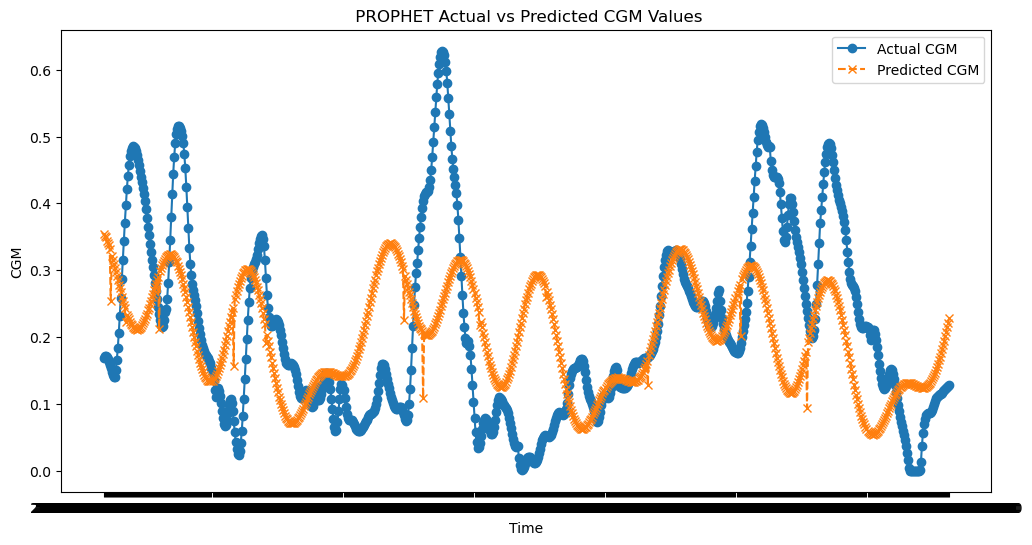

In [29]:

# Visualize the results
plt.figure(figsize=(12, 6))
# Convert the 'Time' column to string
df['Time'] = df['Time'].astype(str)
# Plot actual and predicted CGM values
time_range = df['Time'][train_size:]
plt.plot(time_range[:len(results_df)], results_df['Actual'], label='Actual CGM', marker='o')
plt.plot(time_range[:len(results_df)], results_df['Predicted'], label='Predicted CGM', linestyle='dashed', marker='x')
plt.xlabel('Time')
plt.ylabel('CGM')
plt.legend()
plt.title(' PROPHET Actual vs Predicted CGM Values')
plt.show()

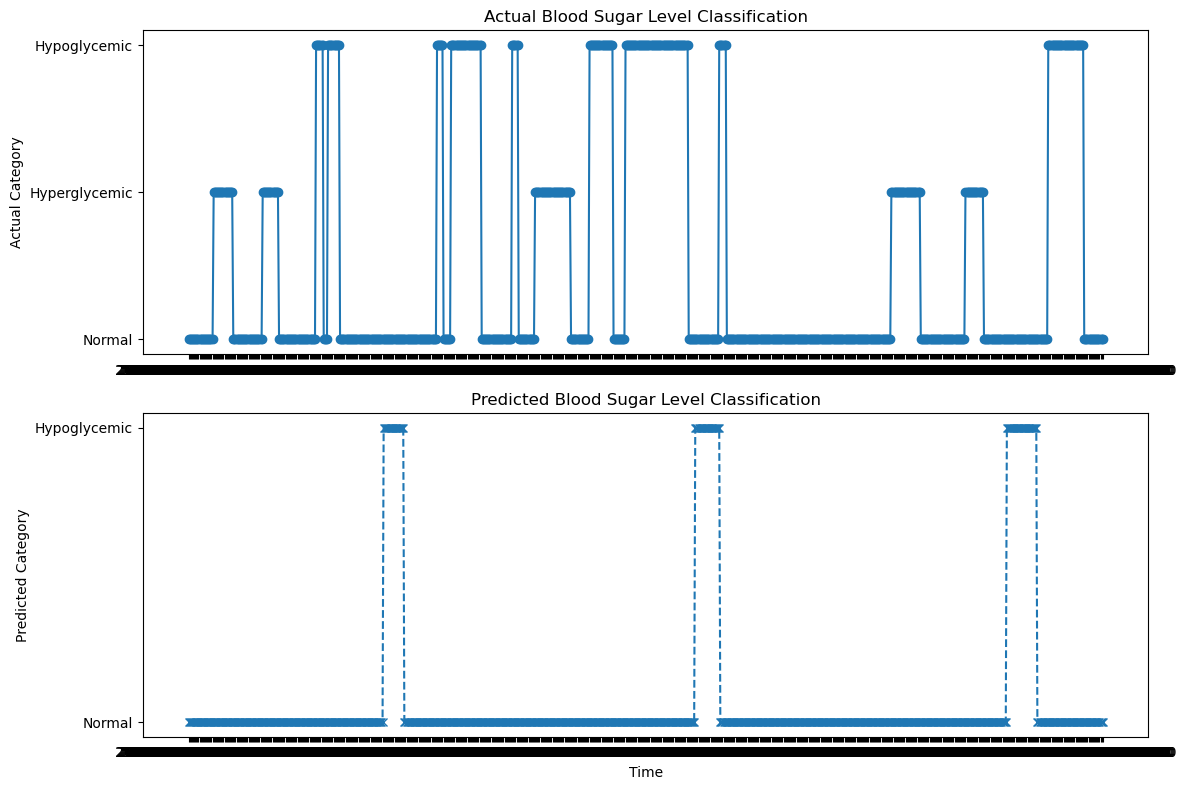

In [30]:
# Visualize the results for Blood Sugar Level Classification
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
# Plot actual and predicted classifications
axes[0].plot(time_range[:len(actual_categories_prophet)], actual_categories_prophet, label='Actual', marker='o')
axes[0].set_ylabel('Actual Category')
axes[0].set_title('Actual Blood Sugar Level Classification')
axes[1].plot(time_range[:len(predicted_categories_prophet)], predicted_categories_prophet, label='Predicted', linestyle='dashed', marker='x')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Predicted Category')
axes[1].set_title('Predicted Blood Sugar Level Classification')
plt.tight_layout()
plt.show()

# PROPHET Model Optimization and Refinement Using Cross-Validation

In [32]:
# Set the train size to 80% of the data
train_size = int(0.8 * len(df_prophet_cv))
train = df_prophet_cv.iloc[:train_size]
test = df_prophet_cv.iloc[train_size:]

# Lists to store actual and predicted values
actual_values_prophet = []
predicted_values_prophet = []

# Lists to store actual and predicted classifications
actual_categories_prophet = []
predicted_categories_prophet = []

# Set the size of the rolling window for cross-validation
window_size = 12 * 2  # 2 hours

# Continuous modeling loop
for i in range(train_size, len(df_prophet_cv)):
    # Extract training data with a rolling window
    train_data = df_prophet_cv.iloc[i - window_size:i]

    # Create a new Prophet object for each iteration
    model = Prophet()

    # Prepare the training data with 'Time', 'CGM', 'CHO', and 'insulin' columns
    train_data = train_data[['Time', 'CGM', 'CHO', 'insulin']]
    train_data.columns = ['ds', 'y', 'CHO', 'insulin']
    model.add_regressor('CHO')
    model.fit(train_data)

    # Predict the value for the next timestamp
    future = pd.DataFrame({
        'ds': [pd.to_datetime(df_prophet_cv['Time'].iloc[i]) + pd.Timedelta(hours=2)],  # Single timestamp after 2 hours
        'CHO': df_prophet_cv['CHO'].iloc[i],
    })
    forecast = model.predict(future)

    # Performance analysis
    predictions = forecast['yhat'].values
    actual_value = df_prophet_cv['CGM'].iloc[i]
    rmse = sqrt(mean_squared_error([actual_value], predictions))

    # Classify as hypoglycemic or hyperglycemic
    actual_category = 'Hypoglycemic' if actual_value < cgm_threshold_low else 'Hyperglycemic' if actual_value > cgm_threshold_high else 'Normal'
    predicted_category = 'Hypoglycemic' if predictions[0] < cgm_threshold_low else 'Hyperglycemic' if predictions[0] > cgm_threshold_high else 'Normal'

    print(f"Iteration {i + 1}: Predicted: {predictions[0]}, Actual: {actual_value}, RMSE: {rmse}")
    print(f"   Actual Category: {actual_category}, Predicted Category: {predicted_category}")

    # Update the DataFrame with the predicted value for 2 hours later
    df_prophet_cv.at[i + 12 * 2, 'CGM'] = predictions[0]

    # Add actual and predicted values to the lists
    actual_values_prophet.append(actual_value)
    predicted_values_prophet.append(predictions[0])

    # Add actual and predicted categories to the lists
    actual_categories_prophet.append(actual_category)
    predicted_categories_prophet.append(predicted_category)

    # Add actual value to the training set for the next iteration
    train = pd.concat([train, df_prophet_cv.iloc[i:i + 1]])

14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3457: Predicted: 0.2579836466723733, Actual: 0.14728422569462504, RMSE: 0.11069942097774824
   Actual Category: Normal, Predicted Category: Normal
Iteration 3458: Predicted: 0.2832702704597734, Actual: 0.14308154923575364, RMSE: 0.14018872122401974
   Actual Category: Normal, Predicted Category: Normal


14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3459: Predicted: 0.30233272130263983, Actual: 0.14163376360839006, RMSE: 0.16069895769424977
   Actual Category: Normal, Predicted Category: Normal
Iteration 3460: Predicted: 0.31506724487932253, Actual: 0.14161274239744362, RMSE: 0.1734545024818789
   Actual Category: Normal, Predicted Category: Normal


14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3461: Predicted: 0.3192156674100947, Actual: 0.1416903735626889, RMSE: 0.1775252938474058
   Actual Category: Normal, Predicted Category: Normal
Iteration 3462: Predicted: 0.3155435172454342, Actual: 0.14062862799267142, RMSE: 0.1749148892527628
   Actual Category: Normal, Predicted Category: Normal


14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3463: Predicted: 0.3036932633177628, Actual: 0.1379100415786875, RMSE: 0.1657832217390753
   Actual Category: Normal, Predicted Category: Normal
Iteration 3464: Predicted: 0.2843237478404288, Actual: 0.13454833513850112, RMSE: 0.14977541270192768
   Actual Category: Normal, Predicted Category: Normal


14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3465: Predicted: 0.26031813216683125, Actual: 0.13191751817337732, RMSE: 0.12840061399345393
   Actual Category: Normal, Predicted Category: Normal
Iteration 3466: Predicted: 0.23586047042900876, Actual: 0.13139161289402432, RMSE: 0.10446885753498444
   Actual Category: Normal, Predicted Category: Normal


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing
14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3467: Predicted: 0.21324581726762212, Actual: 0.13423317351617922, RMSE: 0.0790126437514429
   Actual Category: Normal, Predicted Category: Normal
Iteration 3468: Predicted: 0.18703700253529162, Actual: 0.1408129230965857, RMSE: 0.046224079438705934
   Actual Category: Normal, Predicted Category: Normal


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing
14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3469: Predicted: 0.16107940974485616, Actual: 0.14960642955595757, RMSE: 0.011472980188898585
   Actual Category: Normal, Predicted Category: Normal
Iteration 3470: Predicted: 0.14009394661490432, Actual: 0.15864335077236416, RMSE: 0.018549404157459842
   Actual Category: Normal, Predicted Category: Normal


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing
14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3471: Predicted: 0.1257511501900915, Actual: 0.16595335597736346, RMSE: 0.04020220578727196
   Actual Category: Normal, Predicted Category: Normal
Iteration 3472: Predicted: 0.11806191335772137, Actual: 0.16969305065857002, RMSE: 0.051631137300848645
   Actual Category: Normal, Predicted Category: Normal


14:19:09 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3473: Predicted: 0.11762880459195753, Actual: 0.16903445234095058, RMSE: 0.05140564774899305
   Actual Category: Normal, Predicted Category: Normal
Iteration 3474: Predicted: 0.12293456975940854, Actual: 0.16530731666592888, RMSE: 0.042372746906520334
   Actual Category: Normal, Predicted Category: Normal


14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3475: Predicted: 0.1317666121583439, Actual: 0.16034911028542972, RMSE: 0.028582498127085826
   Actual Category: Normal, Predicted Category: Normal
Iteration 3476: Predicted: 0.14266201965327813, Actual: 0.1559973100685004, RMSE: 0.013335290415222273
   Actual Category: Normal, Predicted Category: Normal


14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3477: Predicted: 0.2217903014588473, Actual: 0.15398512886539503, RMSE: 0.06780517259345226
   Actual Category: Normal, Predicted Category: Normal
Iteration 3478: Predicted: 0.1664183607493501, Actual: 0.15521159710232527, RMSE: 0.011206763647024831
   Actual Category: Normal, Predicted Category: Normal


14:19:10 - cmdstanpy - INFO - Chain [1] start processing
14:19:10 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3479: Predicted: 0.1769343100774656, Actual: 0.15880309632334152, RMSE: 0.018131213754124076
   Actual Category: Normal, Predicted Category: Normal
Iteration 3480: Predicted: 0.18585038034482754, Actual: 0.16346892137988675, RMSE: 0.022381458964940787
   Actual Category: Normal, Predicted Category: Normal


14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3481: Predicted: 0.19375483372682703, Actual: 0.2579836466723733, RMSE: 0.06422881294554625
   Actual Category: Normal, Predicted Category: Normal
Iteration 3482: Predicted: 0.2369110273859593, Actual: 0.2832702704597734, RMSE: 0.04635924307381409
   Actual Category: Normal, Predicted Category: Normal


14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:11 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3483: Predicted: 0.2852956132830782, Actual: 0.30233272130263983, RMSE: 0.017037108019561653
   Actual Category: Normal, Predicted Category: Normal
Iteration 3484: Predicted: 0.33640828090097735, Actual: 0.31506724487932253, RMSE: 0.021341036021654824
   Actual Category: Normal, Predicted Category: Normal


14:19:11 - cmdstanpy - INFO - Chain [1] start processing
14:19:11 - cmdstanpy - INFO - Chain [1] done processing
14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3485: Predicted: 0.38758048208520335, Actual: 0.3192156674100947, RMSE: 0.06836481467510863
   Actual Category: Normal, Predicted Category: Normal
Iteration 3486: Predicted: 0.43557053339217244, Actual: 0.3155435172454342, RMSE: 0.12002701614673822
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3487: Predicted: 0.4760282696478744, Actual: 0.3036932633177628, RMSE: 0.17233500633011162
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3488: Predicted: 0.5044665943644893, Actual: 0.2843237478404288, RMSE: 0.22014284652406046
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3489: Predicted: 0.5268442741529663, Actual: 0.26031813216683125, RMSE: 0.26652614198613506
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3490: Predicted: 0.5228077675423064, Actual: 0.23586047042900876, RMSE: 0.28694729711329764
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3491: Predicted: 0.504576471383092, Actual: 0.21324581726762212, RMSE: 0.2913306541154699
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3492: Predicted: 0.4721347871813532, Actual: 0.18703700253529162, RMSE: 0.2850977846460616
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3493: Predicted: 0.4305543596238352, Actual: 0.16107940974485616, RMSE: 0.269474949878979
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3494: Predicted: 0.38144045911528385, Actual: 0.14009394661490432, RMSE: 0.24134651250037953
   Actual Category: Normal, Predicted Category: Normal


14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3495: Predicted: 0.3273172370882878, Actual: 0.1257511501900915, RMSE: 0.2015660868981963
   Actual Category: Normal, Predicted Category: Normal
Iteration 3496: Predicted: 0.27214564194755825, Actual: 0.11806191335772137, RMSE: 0.15408372858983688
   Actual Category: Normal, Predicted Category: Normal


14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3497: Predicted: 0.2172950923787195, Actual: 0.11762880459195753, RMSE: 0.09966628778676197
   Actual Category: Normal, Predicted Category: Normal
Iteration 3498: Predicted: 0.1648882380268678, Actual: 0.12293456975940854, RMSE: 0.04195366826745926
   Actual Category: Normal, Predicted Category: Normal


14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3499: Predicted: 0.11551723274070168, Actual: 0.1317666121583439, RMSE: 0.01624937941764222
   Actual Category: Normal, Predicted Category: Normal
Iteration 3500: Predicted: 0.06964851180352621, Actual: 0.14266201965327813, RMSE: 0.07301350784975191
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3501: Predicted: 0.027890608275753896, Actual: 0.2217903014588473, RMSE: 0.19389969318309339
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3502: Predicted: 0.016269092759250148, Actual: 0.1664183607493501, RMSE: 0.15014926799009995
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3503: Predicted: -0.0032968516441945987, Actual: 0.1769343100774656, RMSE: 0.1802311617216602
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3504: Predicted: -0.05393365235291899, Actual: 0.18585038034482754, RMSE: 0.23978403269774654
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3505: Predicted: -0.07855369302486563, Actual: 0.19375483372682703, RMSE: 0.27230852675169265
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3506: Predicted: -0.06813936560444743, Actual: 0.2369110273859593, RMSE: 0.3050503929904067
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3507: Predicted: -0.0296043617816903, Actual: 0.2852956132830782, RMSE: 0.31489997506476847
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3508: Predicted: 0.03818145334561917, Actual: 0.33640828090097735, RMSE: 0.2982268275553582
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3509: Predicted: 0.1329163808223498, Actual: 0.38758048208520335, RMSE: 0.25466410126285355
   Actual Category: Normal, Predicted Category: Normal
Iteration 3510: Predicted: 0.2523516416744404, Actual: 0.43557053339217244, RMSE: 0.18321889171773204
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3511: Predicted: 0.39138472307851263, Actual: 0.4760282696478744, RMSE: 0.0846435465693618
   Actual Category: Hyperglycemic, Predicted Category: Normal
Iteration 3512: Predicted: 0.5438972105983872, Actual: 0.5044665943644893, RMSE: 0.039430616233897986
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3513: Predicted: 0.6496073144687753, Actual: 0.5268442741529663, RMSE: 0.12276304031580898
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3514: Predicted: 0.7778885105865562, Actual: 0.5228077675423064, RMSE: 0.25508074304424977
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3515: Predicted: 0.8850050606330485, Actual: 0.504576471383092, RMSE: 0.3804285892499565
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3516: Predicted: 0.9688738160384117, Actual: 0.4721347871813532, RMSE: 0.4967390288570585
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] start processing
14:19:16 - cmdstanpy - INFO - Chain [1] done processing
14:19:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3517: Predicted: 1.0211735775706907, Actual: 0.4305543596238352, RMSE: 0.5906192179468555
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3518: Predicted: 1.0397435226392575, Actual: 0.38144045911528385, RMSE: 0.6583030635239737
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3519: Predicted: 1.0216077310130978, Actual: 0.3273172370882878, RMSE: 0.69429049392481
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3520: Predicted: 0.9692320961748868, Actual: 0.27214564194755825, RMSE: 0.6970864542273285
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3521: Predicted: 0.8889887895071106, Actual: 0.2172950923787195, RMSE: 0.6716936971283911
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3522: Predicted: 0.7715085151031036, Actual: 0.1648882380268678, RMSE: 0.6066202770762358
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3523: Predicted: 0.6335206711316196, Actual: 0.11551723274070168, RMSE: 0.5180034383909179
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3524: Predicted: 0.4736479991084062, Actual: 0.06964851180352621, RMSE: 0.40399948730488
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:17 - cmdstanpy - INFO - Chain [1] done processing
14:19:17 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3525: Predicted: 0.29475896712381405, Actual: 0.027890608275753896, RMSE: 0.26686835884806015
   Actual Category: Hypoglycemic, Predicted Category: Normal
Iteration 3526: Predicted: 0.1267385407788499, Actual: 0.016269092759250148, RMSE: 0.11046944801959976
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3527: Predicted: -0.06973539376520406, Actual: -0.0032968516441945987, RMSE: 0.06643854212100946
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3528: Predicted: -0.15693868421840204, Actual: -0.05393365235291899, RMSE: 0.10300503186548304
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3529: Predicted: -0.337417348072579, Actual: -0.07855369302486563, RMSE: 0.25886365504771336
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3530: Predicted: -0.5217604795329024, Actual: -0.06813936560444743, RMSE: 0.45362111392845494
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing
14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3531: Predicted: -0.6688462156426209, Actual: -0.0296043617816903, RMSE: 0.6392418538609306
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3532: Predicted: -0.7788982601154156, Actual: 0.03818145334561917, RMSE: 0.8170797134610348
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:18 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3533: Predicted: -0.8332776544132059, Actual: 0.1329163808223498, RMSE: 0.9661940352355557
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3534: Predicted: -0.8212086486600932, Actual: 0.2523516416744404, RMSE: 1.0735602903345336
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3535: Predicted: -0.7359303578148524, Actual: 0.39138472307851263, RMSE: 1.127315080893365
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3536: Predicted: -0.5714943917908024, Actual: 0.5438972105983872, RMSE: 1.1153916023891897
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3537: Predicted: -0.576079987375966, Actual: 0.6496073144687753, RMSE: 1.2256873018447414
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3538: Predicted: -0.22164732853493682, Actual: 0.7778885105865562, RMSE: 0.999535839121493
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:19 - cmdstanpy - INFO - Chain [1] start processing
14:19:19 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3539: Predicted: 0.16909115866204855, Actual: 0.8850050606330485, RMSE: 0.7159139019709999
   Actual Category: Hyperglycemic, Predicted Category: Normal
Iteration 3540: Predicted: 0.5765156549902839, Actual: 0.9688738160384117, RMSE: 0.3923581610481278
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3541: Predicted: 0.9840999360328258, Actual: 1.0211735775706907, RMSE: 0.037073641537864965
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3542: Predicted: 1.3683956870209413, Actual: 1.0397435226392575, RMSE: 0.32865216438168376
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:20 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3543: Predicted: 1.7213619568050504, Actual: 1.0216077310130978, RMSE: 0.6997542257919527
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3544: Predicted: 2.00949554886922, Actual: 0.9692320961748868, RMSE: 1.0402634526943333
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
14:19:20 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3545: Predicted: 2.2360024770003966, Actual: 0.8889887895071106, RMSE: 1.3470136874932859
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3546: Predicted: 2.383351343972523, Actual: 0.7715085151031036, RMSE: 1.6118428288694195
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing
14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3547: Predicted: 2.443237440663201, Actual: 0.6335206711316196, RMSE: 1.8097167695315814
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3548: Predicted: 2.416102035058316, Actual: 0.4736479991084062, RMSE: 1.94245403594991
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing
14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3549: Predicted: 2.2863573186479247, Actual: 0.29475896712381405, RMSE: 1.9915983515241107
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3550: Predicted: 2.0611533043710586, Actual: 0.1267385407788499, RMSE: 1.9344147635922087
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing
14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3551: Predicted: 1.761102733149243, Actual: -0.06973539376520406, RMSE: 1.8308381269144471
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3552: Predicted: 1.363429196453158, Actual: -0.15693868421840204, RMSE: 1.52036788067156
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:21 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3553: Predicted: 0.9157816772866562, Actual: -0.337417348072579, RMSE: 1.253199025359235
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3554: Predicted: 0.3859355540308422, Actual: -0.5217604795329024, RMSE: 0.9076960335637445
   Actual Category: Hypoglycemic, Predicted Category: Normal


14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3555: Predicted: -0.19677434644923075, Actual: -0.6688462156426209, RMSE: 0.47207186919339017
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3556: Predicted: -0.8445603846336484, Actual: -0.7788982601154156, RMSE: 0.06566212451823272
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3557: Predicted: -1.5289725795366689, Actual: -0.8332776544132059, RMSE: 0.695694925123463
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3558: Predicted: -2.17278661340909, Actual: -0.8212086486600932, RMSE: 1.351577964748997
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3559: Predicted: -2.7516965191913445, Actual: -0.7359303578148524, RMSE: 2.015766161376492
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3560: Predicted: -3.2218792907333356, Actual: -0.5714943917908024, RMSE: 2.650384898942533
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3561: Predicted: -3.1808734908468703, Actual: -0.576079987375966, RMSE: 2.6047935034709044
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3562: Predicted: -3.3466410109021476, Actual: -0.22164732853493682, RMSE: 3.1249936823672106
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3563: Predicted: -3.287600305130525, Actual: 0.16909115866204855, RMSE: 3.456691463792574
   Actual Category: Normal, Predicted Category: Hypoglycemic
Iteration 3564: Predicted: -2.984238867586502, Actual: 0.5765156549902839, RMSE: 3.560754522576786
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3565: Predicted: -2.4690049731962143, Actual: 0.9840999360328258, RMSE: 3.4531049092290402
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3566: Predicted: -1.758978960950627, Actual: 1.3683956870209413, RMSE: 3.1273746479715685
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3567: Predicted: -0.89110284051568, Actual: 1.7213619568050504, RMSE: 2.6124647973207304
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3568: Predicted: 0.11110112358741141, Actual: 2.00949554886922, RMSE: 1.8983944252818088
   Actual Category: Hyperglycemic, Predicted Category: Normal


14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3569: Predicted: 1.1807883051921118, Actual: 2.2360024770003966, RMSE: 1.0552141718082848
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3570: Predicted: 2.279065499434036, Actual: 2.383351343972523, RMSE: 0.1042858445384871
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3571: Predicted: 3.3600814715036003, Actual: 2.443237440663201, RMSE: 0.9168440308403993
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3572: Predicted: 4.350978742225554, Actual: 2.416102035058316, RMSE: 1.9348767071672381
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3573: Predicted: 5.238173513762934, Actual: 2.2863573186479247, RMSE: 2.9518161951150095
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3574: Predicted: 5.953442823407467, Actual: 2.0611533043710586, RMSE: 3.892289519036409
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3575: Predicted: 6.439755530630819, Actual: 1.761102733149243, RMSE: 4.678652797481576
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3576: Predicted: 6.68219077911236, Actual: 1.363429196453158, RMSE: 5.318761582659202
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3577: Predicted: 6.659699480706018, Actual: 0.9157816772866562, RMSE: 5.743917803419362
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3578: Predicted: 6.364192475020154, Actual: 0.3859355540308422, RMSE: 5.9782569209893115
   Actual Category: Normal, Predicted Category: Hyperglycemic


14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing
14:19:25 - cmdstanpy - INFO - Chain [1] done processing
14:19:25 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3579: Predicted: 5.732856241595746, Actual: -0.19677434644923075, RMSE: 5.929630588044977
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3580: Predicted: 4.768051798454858, Actual: -0.8445603846336484, RMSE: 5.612612183088506
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:26 - cmdstanpy - INFO - Chain [1] done processing
14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3581: Predicted: 3.5038840656952472, Actual: -1.5289725795366689, RMSE: 5.032856645231917
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3582: Predicted: 1.947919253557646, Actual: -2.17278661340909, RMSE: 4.120705866966736
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing
14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing
14:19:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3583: Predicted: 0.1679923287567096, Actual: -2.7516965191913445, RMSE: 2.9196888479480543
   Actual Category: Hypoglycemic, Predicted Category: Normal
Iteration 3584: Predicted: -1.79261634106684, Actual: -3.2218792907333356, RMSE: 1.4292629496664955
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:26 - cmdstanpy - INFO - Chain [1] done processing
14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3585: Predicted: -3.8111853995816825, Actual: -3.1808734908468703, RMSE: 0.6303119087348121
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3586: Predicted: -5.734607962027449, Actual: -3.3466410109021476, RMSE: 2.3879669511253017
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing
14:19:26 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing
14:19:27 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3587: Predicted: -7.533346972910754, Actual: -3.287600305130525, RMSE: 4.245746667780228
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3588: Predicted: -9.044323966895988, Actual: -2.984238867586502, RMSE: 6.060085099309486
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:27 - cmdstanpy - INFO - Chain [1] done processing
14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3589: Predicted: -10.210783668986169, Actual: -2.4690049731962143, RMSE: 7.741778695789955
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3590: Predicted: -10.885715125431712, Actual: -1.758978960950627, RMSE: 9.126736164481086
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing
14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3591: Predicted: -11.0395332682248, Actual: -0.89110284051568, RMSE: 10.148430427709119
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3592: Predicted: -10.596626286220713, Actual: 0.11110112358741141, RMSE: 10.707727409808125
   Actual Category: Normal, Predicted Category: Hypoglycemic


14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing
14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3593: Predicted: -9.524361637479743, Actual: 1.1807883051921118, RMSE: 10.705149942671854
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3594: Predicted: -7.939665999785578, Actual: 2.279065499434036, RMSE: 10.218731499219613
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:27 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3595: Predicted: -5.8285230791315605, Actual: 3.3600814715036003, RMSE: 9.18860455063516
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3596: Predicted: -3.2402266216419062, Actual: 4.350978742225554, RMSE: 7.591205363867461
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3597: Predicted: -0.30309415944093654, Actual: 5.238173513762934, RMSE: 5.541267673203871
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3598: Predicted: 2.8888964237999524, Actual: 5.953442823407467, RMSE: 3.064546399607515
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3599: Predicted: 6.205179247930939, Actual: 6.439755530630819, RMSE: 0.23457628269988007
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3600: Predicted: 9.610728117192695, Actual: 6.68219077911236, RMSE: 2.928537338080335
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing
14:19:28 - cmdstanpy - INFO - Chain [1] start processing
14:19:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3601: Predicted: 12.633449852825144, Actual: 6.659699480706018, RMSE: 5.9737503721191265
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3602: Predicted: 15.355941752544611, Actual: 6.364192475020154, RMSE: 8.991749277524457
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing
14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3603: Predicted: 17.630315111397454, Actual: 5.732856241595746, RMSE: 11.897458869801708
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3604: Predicted: 19.349210243569203, Actual: 4.768051798454858, RMSE: 14.581158445114346
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing
14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3605: Predicted: 20.127639192055486, Actual: 3.5038840656952472, RMSE: 16.62375512636024
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3606: Predicted: 20.026572543555766, Actual: 1.947919253557646, RMSE: 18.07865328999812
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing
14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3607: Predicted: 18.84814866380151, Actual: 0.1679923287567096, RMSE: 18.6801563350448
   Actual Category: Normal, Predicted Category: Hyperglycemic
Iteration 3608: Predicted: 16.615530849774384, Actual: -1.79261634106684, RMSE: 18.408147190841223
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:29 - cmdstanpy - INFO - Chain [1] start processing
14:19:29 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3609: Predicted: 13.36660204128979, Actual: -3.8111853995816825, RMSE: 17.177787440871473
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3610: Predicted: 9.267771412941142, Actual: -5.734607962027449, RMSE: 15.00237937496859
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3611: Predicted: 8.380774104679354, Actual: -7.533346972910754, RMSE: 15.914121077590107
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3612: Predicted: 1.6093658676911382, Actual: -9.044323966895988, RMSE: 10.653689834587126
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3613: Predicted: -5.17046488689795, Actual: -10.210783668986169, RMSE: 5.040318782088219
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3614: Predicted: -11.758759644167734, Actual: -10.885715125431712, RMSE: 0.8730445187360214
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
14:19:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3615: Predicted: -18.23095632293934, Actual: -11.0395332682248, RMSE: 7.191423054714539
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3616: Predicted: -23.735468170938574, Actual: -10.596626286220713, RMSE: 13.138841884717861
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing
14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing
14:19:31 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3617: Predicted: -28.289028556676897, Actual: -9.524361637479743, RMSE: 18.764666919197154
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3618: Predicted: -31.62713796849898, Actual: -7.939665999785578, RMSE: 23.687471968713403
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:31 - cmdstanpy - INFO - Chain [1] done processing
14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3619: Predicted: -33.51800267251879, Actual: -5.8285230791315605, RMSE: 27.68947959338723
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3620: Predicted: -33.81690732132488, Actual: -3.2402266216419062, RMSE: 30.57668069968297
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing
14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3621: Predicted: -32.442247659640046, Actual: -0.30309415944093654, RMSE: 32.13915350019911
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3622: Predicted: -29.346631340985017, Actual: 2.8888964237999524, RMSE: 32.23552776478497
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:31 - cmdstanpy - INFO - Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing
14:19:32 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3623: Predicted: -24.58424916434701, Actual: 6.205179247930939, RMSE: 30.78942841227795
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3624: Predicted: -18.217854660212765, Actual: 9.610728117192695, RMSE: 27.828582777405458
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:32 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing
14:19:32 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing
14:19:32 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3625: Predicted: -10.45810371900485, Actual: 12.633449852825144, RMSE: 23.091553571829994
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3626: Predicted: -1.5891037511903963, Actual: 15.355941752544611, RMSE: 16.945045503735006
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:32 - cmdstanpy - INFO - Chain [1] done processing
14:19:32 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3627: Predicted: 8.207303694052586, Actual: 17.630315111397454, RMSE: 9.423011417344869
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3628: Predicted: 18.583740456752146, Actual: 19.349210243569203, RMSE: 0.7654697868170572
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:32 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing
14:19:32 - cmdstanpy - INFO - Chain [1] start processing
14:19:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3629: Predicted: 29.150292604331526, Actual: 20.127639192055486, RMSE: 9.02265341227604
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3630: Predicted: 39.19409810751708, Actual: 20.026572543555766, RMSE: 19.167525563961313
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3631: Predicted: 48.42554579251781, Actual: 18.84814866380151, RMSE: 29.5773971287163
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3632: Predicted: 56.03502490301641, Actual: 16.615530849774384, RMSE: 39.41949405324202
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3633: Predicted: 61.59200912889981, Actual: 13.36660204128979, RMSE: 48.22540708761002
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3634: Predicted: 64.45473442071871, Actual: 9.267771412941142, RMSE: 55.186963007777564
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing
14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3635: Predicted: 60.05657941906264, Actual: 8.380774104679354, RMSE: 51.67580531438329
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3636: Predicted: 57.87383122419667, Actual: 1.6093658676911382, RMSE: 56.26446535650553
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:33 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3637: Predicted: 51.794621947446664, Actual: -5.17046488689795, RMSE: 56.96508683434462
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3638: Predicted: 42.118007332239635, Actual: -11.758759644167734, RMSE: 53.87676697640737
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3639: Predicted: 29.37960637312164, Actual: -18.23095632293934, RMSE: 47.61056269606098
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3640: Predicted: 14.061134621620669, Actual: -23.735468170938574, RMSE: 37.79660279255924
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3641: Predicted: -2.8913825462326956, Actual: -28.289028556676897, RMSE: 25.397646010444202
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3642: Predicted: -21.21318856162874, Actual: -31.62713796849898, RMSE: 10.413949406870241
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:34 - cmdstanpy - INFO - Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:34 - cmdstanpy - INFO - Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3643: Predicted: -29.34318579330362, Actual: -33.51800267251879, RMSE: 4.174816879215172
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3644: Predicted: -50.22541176468357, Actual: -33.81690732132488, RMSE: 16.408504443358694
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3645: Predicted: -68.36245526574282, Actual: -32.442247659640046, RMSE: 35.92020760610278
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3646: Predicted: -83.10300829088958, Actual: -29.346631340985017, RMSE: 53.75637694990456
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3647: Predicted: -93.8570963099301, Actual: -24.58424916434701, RMSE: 69.27284714558309
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3648: Predicted: -100.04076627169525, Actual: -18.217854660212765, RMSE: 81.82291161148248
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3649: Predicted: -101.12549458273973, Actual: -10.45810371900485, RMSE: 90.66739086373488
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3650: Predicted: -97.20043566634405, Actual: -1.5891037511903963, RMSE: 95.61133191515366
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:35 - cmdstanpy - INFO - Chain [1] start processing
14:19:35 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3651: Predicted: -87.91158317704638, Actual: 8.207303694052586, RMSE: 96.11888687109897
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3652: Predicted: -73.51560183807204, Actual: 18.583740456752146, RMSE: 92.0993422948242
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3653: Predicted: -54.096854501258356, Actual: 29.150292604331526, RMSE: 83.24714710558987
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3654: Predicted: -30.470958491757067, Actual: 39.19409810751708, RMSE: 69.66505659927415
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3655: Predicted: -3.4376839533140737, Actual: 48.42554579251781, RMSE: 51.86322974583188
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3656: Predicted: 26.52041747991847, Actual: 56.03502490301641, RMSE: 29.514607423097935
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
14:19:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3657: Predicted: 57.686372934100596, Actual: 61.59200912889981, RMSE: 3.9056361947992144
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3658: Predicted: 89.34937742865391, Actual: 64.45473442071871, RMSE: 24.8946430079352
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3659: Predicted: 118.82390895276026, Actual: 60.05657941906264, RMSE: 58.76732953369762
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3660: Predicted: 145.25463390090894, Actual: 57.87383122419667, RMSE: 87.38080267671228
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3661: Predicted: 167.1251748962901, Actual: 51.794621947446664, RMSE: 115.33055294884343
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3662: Predicted: 182.67058929699095, Actual: 42.118007332239635, RMSE: 140.5525819647513
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3663: Predicted: 190.0741203484491, Actual: 29.37960637312164, RMSE: 160.69451397532745
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3664: Predicted: 188.09680470119454, Actual: 14.061134621620669, RMSE: 174.03567007957386
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:37 - cmdstanpy - INFO - Chain [1] done processing
14:19:37 - cmdstanpy - INFO - Chain [1] start processing
14:19:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3665: Predicted: 175.58604037029926, Actual: -2.8913825462326956, RMSE: 178.47742291653196
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3666: Predicted: 151.99086984138307, Actual: -21.21318856162874, RMSE: 173.2040584030118
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3667: Predicted: 121.60203094713275, Actual: -29.34318579330362, RMSE: 150.94521674043636
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3668: Predicted: 86.29061682801094, Actual: -50.22541176468357, RMSE: 136.5160285926945
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3669: Predicted: 42.231447896601146, Actual: -68.36245526574282, RMSE: 110.59390316234396
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3670: Predicted: -8.219369618166658, Actual: -83.10300829088958, RMSE: 74.88363867272292
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3671: Predicted: -62.424042317841774, Actual: -93.8570963099301, RMSE: 31.433053992088325
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3672: Predicted: -117.78188459872847, Actual: -100.04076627169525, RMSE: 17.74111832703322
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:38 - cmdstanpy - INFO - Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3673: Predicted: -171.4394961236654, Actual: -101.12549458273973, RMSE: 70.31400154092567
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3674: Predicted: -220.0955768902251, Actual: -97.20043566634405, RMSE: 122.89514122388104
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3675: Predicted: -261.1644073648225, Actual: -87.91158317704638, RMSE: 173.25282418777613
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3676: Predicted: -291.98100164085565, Actual: -73.51560183807204, RMSE: 218.46539980278362
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3677: Predicted: -310.2556952960271, Actual: -54.096854501258356, RMSE: 256.15884079476876
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3678: Predicted: -313.88847004582465, Actual: -30.470958491757067, RMSE: 283.4175115540676
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing
14:19:39 - cmdstanpy - INFO - Chain [1] done processing
14:19:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3679: Predicted: -301.42096253306255, Actual: -3.4376839533140737, RMSE: 297.98327857974846
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3680: Predicted: -272.50742087765497, Actual: 26.52041747991847, RMSE: 299.02783835757344
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3681: Predicted: -227.1221713293925, Actual: 57.686372934100596, RMSE: 284.8085442634931
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3682: Predicted: -166.33956351954672, Actual: 89.34937742865391, RMSE: 255.68894094820064
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3683: Predicted: -91.68933740498203, Actual: 118.82390895276026, RMSE: 210.51324635774228
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3684: Predicted: -7.995533524225953, Actual: 145.25463390090894, RMSE: 153.2501674251349
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3685: Predicted: 84.40587096532076, Actual: 167.1251748962901, RMSE: 82.71930393096935
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3686: Predicted: 180.7518890183766, Actual: 182.67058929699095, RMSE: 1.9187002786143523
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:40 - cmdstanpy - INFO - Chain [1] done processing
14:19:40 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3687: Predicted: 276.32819950678567, Actual: 190.0741203484491, RMSE: 86.25407915833657
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3688: Predicted: 367.17386420036536, Actual: 188.09680470119454, RMSE: 179.07705949917082
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3689: Predicted: 444.65284357290045, Actual: 175.58604037029926, RMSE: 269.0668032026012
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3690: Predicted: 506.60031129266054, Actual: 151.99086984138307, RMSE: 354.60944145127746
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3691: Predicted: 547.3563796403232, Actual: 121.60203094713275, RMSE: 425.7543486931905
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3692: Predicted: 566.2286393718656, Actual: 86.29061682801094, RMSE: 479.9380225438547
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:41 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3693: Predicted: 560.1437800157097, Actual: 42.231447896601146, RMSE: 517.9123321191086
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3694: Predicted: 522.828849701629, Actual: -8.219369618166658, RMSE: 531.0482193197956
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3695: Predicted: 457.4075524430125, Actual: -62.424042317841774, RMSE: 519.8315947608543
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3696: Predicted: 363.86520374187785, Actual: -117.78188459872847, RMSE: 481.64708834060633
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:42 - cmdstanpy - INFO - Chain [1] start processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3697: Predicted: 244.7163463740033, Actual: -171.4394961236654, RMSE: 416.1558424976687
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3698: Predicted: 104.87106531731372, Actual: -220.0955768902251, RMSE: 324.9666422075388
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3699: Predicted: -51.04273220372397, Actual: -261.1644073648225, RMSE: 210.12167516109855
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3700: Predicted: -216.5962452900712, Actual: -291.98100164085565, RMSE: 75.38475635078444
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] start processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3701: Predicted: -386.04685218101673, Actual: -310.2556952960271, RMSE: 75.79115688498962
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3702: Predicted: -551.9821000130871, Actual: -313.88847004582465, RMSE: 238.09362996726247
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3703: Predicted: -693.6770529819827, Actual: -301.42096253306255, RMSE: 392.25609044892013
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3704: Predicted: -816.669090672768, Actual: -272.50742087765497, RMSE: 544.1616697951131
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3705: Predicted: -908.5869537875867, Actual: -227.1221713293925, RMSE: 681.4647824581942
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3706: Predicted: -961.1572325564238, Actual: -166.33956351954672, RMSE: 794.8176690368771
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3707: Predicted: -968.9248504174325, Actual: -91.68933740498203, RMSE: 877.2355130124505
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3708: Predicted: -926.4052701754423, Actual: -7.995533524225953, RMSE: 918.4097366512163
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:43 - cmdstanpy - INFO - Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3709: Predicted: -834.4278560098544, Actual: 84.40587096532076, RMSE: 918.8337269751752
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3710: Predicted: -692.8047633764468, Actual: 180.7518890183766, RMSE: 873.5566523948233
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3711: Predicted: -503.14760478672497, Actual: 276.32819950678567, RMSE: 779.4758042935107
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3712: Predicted: -273.2816750088201, Actual: 367.17386420036536, RMSE: 640.4555392091854
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3713: Predicted: -11.467771678445024, Actual: 444.65284357290045, RMSE: 456.1206152513455
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3714: Predicted: 274.2406208003513, Actual: 506.60031129266054, RMSE: 232.35969049230926
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:44 - cmdstanpy - INFO - Chain [1] done processing
14:19:44 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3715: Predicted: 567.4122390135557, Actual: 547.3563796403232, RMSE: 20.055859373232465
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3716: Predicted: 854.4949996217347, Actual: 566.2286393718656, RMSE: 288.2663602498691
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3717: Predicted: 1124.5949482337821, Actual: 560.1437800157097, RMSE: 564.4511682180724
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3718: Predicted: 1361.3017100977636, Actual: 522.828849701629, RMSE: 838.4728603961346
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3719: Predicted: 1549.0495846127278, Actual: 457.4075524430125, RMSE: 1091.6420321697153
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3720: Predicted: 1675.7242635852715, Actual: 363.86520374187785, RMSE: 1311.8590598433937
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing
14:19:45 - cmdstanpy - INFO - Chain [1] start processing
14:19:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3721: Predicted: 1725.4197141188076, Actual: 244.7163463740033, RMSE: 1480.7033677448044
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3722: Predicted: 1691.296394596305, Actual: 104.87106531731372, RMSE: 1586.4253292789913
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing
14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3723: Predicted: 1569.0883193469695, Actual: -51.04273220372397, RMSE: 1620.1310515506934
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3724: Predicted: 1361.891596530469, Actual: -216.5962452900712, RMSE: 1578.4878418205403
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing
14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3725: Predicted: 1068.6862945110777, Actual: -386.04685218101673, RMSE: 1454.7331466920944
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3726: Predicted: 698.015040592557, Actual: -551.9821000130871, RMSE: 1249.9971406056443
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing
14:19:46 - cmdstanpy - INFO - Chain [1] start processing
14:19:46 - cmdstanpy - INFO - Chain [1] done processing
14:19:46 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3727: Predicted: 263.3552550604834, Actual: -693.6770529819827, RMSE: 957.0323080424661
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3728: Predicted: -217.01870596668434, Actual: -816.669090672768, RMSE: 599.6503847060836
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:46 - cmdstanpy - INFO - Chain [1] done processing
14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3729: Predicted: -721.8960833027171, Actual: -908.5869537875867, RMSE: 186.6908704848696
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3730: Predicted: -1240.3073551089308, Actual: -961.1572325564238, RMSE: 279.150122552507
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing
14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3731: Predicted: -1732.40492719142, Actual: -968.9248504174325, RMSE: 763.4800767739875
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3732: Predicted: -2173.43665933333, Actual: -926.4052701754423, RMSE: 1247.031389157888
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing
14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3733: Predicted: -2541.3067109962617, Actual: -834.4278560098544, RMSE: 1706.8788549864073
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3734: Predicted: -2814.086035727461, Actual: -692.8047633764468, RMSE: 2121.281272351014
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing
14:19:47 - cmdstanpy - INFO - Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3735: Predicted: -2986.9210444917508, Actual: -503.14760478672497, RMSE: 2483.773439705026
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3736: Predicted: -2977.197062245544, Actual: -273.2816750088201, RMSE: 2703.915387236724
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3737: Predicted: -2831.5584705973747, Actual: -11.467771678445024, RMSE: 2820.09069891893
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3738: Predicted: -2534.2141837305267, Actual: 274.2406208003513, RMSE: 2808.454804530878
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3739: Predicted: -2085.5713793368404, Actual: 567.4122390135557, RMSE: 2652.9836183503962
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3740: Predicted: -1493.5807206658665, Actual: 854.4949996217347, RMSE: 2348.075720287601
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:48 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3741: Predicted: -788.7258810030443, Actual: 1124.5949482337821, RMSE: 1913.3208292368263
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3742: Predicted: 14.796497337421991, Actual: 1361.3017100977636, RMSE: 1346.5052127603417
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:49 - cmdstanpy - INFO - Chain [1] done processing
14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3743: Predicted: 891.6799656491346, Actual: 1549.0495846127278, RMSE: 657.3696189635932
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3744: Predicted: 1796.120043776411, Actual: 1675.7242635852715, RMSE: 120.39578019113947
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing
14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3745: Predicted: 2670.324184862455, Actual: 1725.4197141188076, RMSE: 944.9044707436472
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3746: Predicted: 3492.050809410741, Actual: 1691.296394596305, RMSE: 1800.754414814436
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing
14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3747: Predicted: 4203.456100262585, Actual: 1569.0883193469695, RMSE: 2634.3677809156156
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3748: Predicted: 4764.391996224873, Actual: 1361.891596530469, RMSE: 3402.5003996944038
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing
14:19:49 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3749: Predicted: 5122.307745237916, Actual: 1068.6862945110777, RMSE: 4053.621450726838
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3750: Predicted: 5256.147651357009, Actual: 698.015040592557, RMSE: 4558.132610764452
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing
14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3751: Predicted: 5128.967044231697, Actual: 263.3552550604834, RMSE: 4865.611789171214
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3752: Predicted: 4740.656004683229, Actual: -217.01870596668434, RMSE: 4957.674710649913
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing
14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3753: Predicted: 4060.455486446058, Actual: -721.8960833027171, RMSE: 4782.351569748775
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3754: Predicted: 3156.0870269514276, Actual: -1240.3073551089308, RMSE: 4396.394382060358
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing
14:19:50 - cmdstanpy - INFO - Chain [1] start processing
14:19:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3755: Predicted: 2002.638940497339, Actual: -1732.40492719142, RMSE: 3735.043867688759
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3756: Predicted: 666.2721485241923, Actual: -2173.43665933333, RMSE: 2839.7088078575225
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3757: Predicted: -806.7320713130179, Actual: -2541.3067109962617, RMSE: 1734.5746396832437
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3758: Predicted: -2364.658172773229, Actual: -2814.086035727461, RMSE: 449.42786295423184
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3759: Predicted: -3919.5992481602893, Actual: -2986.9210444917508, RMSE: 932.6782036685386
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3760: Predicted: -5436.503051170765, Actual: -2977.197062245544, RMSE: 2459.3059889252204
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3761: Predicted: -6784.472322870776, Actual: -2831.5584705973747, RMSE: 3952.9138522734015
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3762: Predicted: -7889.197646724952, Actual: -2534.2141837305267, RMSE: 5354.983462994425
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:51 - cmdstanpy - INFO - Chain [1] start processing
14:19:51 - cmdstanpy - INFO - Chain [1] done processing
14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3763: Predicted: -8688.001011819231, Actual: -2085.5713793368404, RMSE: 6602.429632482391
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3764: Predicted: -9105.613355593687, Actual: -1493.5807206658665, RMSE: 7612.03263492782
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing
14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3765: Predicted: -9091.461167240395, Actual: -788.7258810030443, RMSE: 8302.735286237352
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3766: Predicted: -8597.870405134392, Actual: 14.796497337421991, RMSE: 8612.666902471814
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing
14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3767: Predicted: -7685.207441090264, Actual: 891.6799656491346, RMSE: 8576.887406739399
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3768: Predicted: -6265.322575118905, Actual: 1796.120043776411, RMSE: 8061.442618895316
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:52 - cmdstanpy - INFO - Chain [1] done processing
14:19:52 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3769: Predicted: -4429.35664196353, Actual: 2670.324184862455, RMSE: 7099.680826825985
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3770: Predicted: -2232.869474488456, Actual: 3492.050809410741, RMSE: 5724.920283899197
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3771: Predicted: 250.46674194383021, Actual: 4203.456100262585, RMSE: 3952.989358318755
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3772: Predicted: 2931.580538463822, Actual: 4764.391996224873, RMSE: 1832.8114577610509
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3773: Predicted: 5669.573114902411, Actual: 5122.307745237916, RMSE: 547.2653696644957
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3774: Predicted: 8377.4360043121, Actual: 5256.147651357009, RMSE: 3121.288352955091
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3775: Predicted: 10859.022342580462, Actual: 5128.967044231697, RMSE: 5730.055298348764
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3776: Predicted: 12997.515123535373, Actual: 4740.656004683229, RMSE: 8256.859118852144
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:53 - cmdstanpy - INFO - Chain [1] done processing
14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3777: Predicted: 14658.85814180135, Actual: 4060.455486446058, RMSE: 10598.40265535529
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3778: Predicted: 15699.615773406213, Actual: 3156.0870269514276, RMSE: 12543.528746454786
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:54 - cmdstanpy - INFO - Chain [1] done processing
14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3779: Predicted: 16046.187978656679, Actual: 2002.638940497339, RMSE: 14043.549038159339
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3780: Predicted: 17339.791653879696, Actual: 666.2721485241923, RMSE: 16673.519505355503
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:54 - cmdstanpy - INFO - Chain [1] done processing
14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:54 - cmdstanpy - INFO - Chain [1] done processing
14:19:54 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3781: Predicted: 15584.20713554923, Actual: -806.7320713130179, RMSE: 16390.939206862247
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3782: Predicted: 13028.247982584635, Actual: -2364.658172773229, RMSE: 15392.906155357865
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:54 - cmdstanpy - INFO - Chain [1] done processing
14:19:54 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3783: Predicted: 9737.063455289737, Actual: -3919.5992481602893, RMSE: 13656.662703450027
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3784: Predicted: 5810.492557443049, Actual: -5436.503051170765, RMSE: 11246.995608613814
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3785: Predicted: 1426.701584896282, Actual: -6784.472322870776, RMSE: 8211.173907767057
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3786: Predicted: -3273.3649133916456, Actual: -7889.197646724952, RMSE: 4615.832733333307
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3787: Predicted: -8148.368735449622, Actual: -8688.001011819231, RMSE: 539.6322763696089
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3788: Predicted: -12932.425192812825, Actual: -9105.613355593687, RMSE: 3826.8118372191384
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3789: Predicted: -17409.815320036552, Actual: -9091.461167240395, RMSE: 8318.354152796157
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3790: Predicted: -21354.840918128117, Actual: -8597.870405134392, RMSE: 12756.970512993725
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:55 - cmdstanpy - INFO - Chain [1] start processing
14:19:55 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3791: Predicted: -24549.865776195937, Actual: -7685.207441090264, RMSE: 16864.658335105672
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3792: Predicted: -26781.512013328254, Actual: -6265.322575118905, RMSE: 20516.18943820935
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3793: Predicted: -27847.79233197694, Actual: -4429.35664196353, RMSE: 23418.435690013408
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3794: Predicted: -27672.20414033188, Actual: -2232.869474488456, RMSE: 25439.334665843424
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3795: Predicted: -26071.550453357046, Actual: 250.46674194383021, RMSE: 26322.017195300876
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3796: Predicted: -23010.34309665194, Actual: 2931.580538463822, RMSE: 25941.923635115763
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:56 - cmdstanpy - INFO - Chain [1] start processing
14:19:56 - cmdstanpy - INFO - Chain [1] done processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3797: Predicted: -18527.316096041934, Actual: 5669.573114902411, RMSE: 24196.889210944344
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3798: Predicted: -9540.20787044283, Actual: 8377.4360043121, RMSE: 17917.64387475493
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:57 - cmdstanpy - INFO - Chain [1] done processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3799: Predicted: -8879.076405225358, Actual: 10859.022342580462, RMSE: 19738.09874780582
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3800: Predicted: -409.1624512517752, Actual: 12997.515123535373, RMSE: 13406.677574787149
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3801: Predicted: 8454.731615514056, Actual: 14658.85814180135, RMSE: 6204.126526287293
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3802: Predicted: 17434.818590096853, Actual: 15699.615773406213, RMSE: 1735.2028166906402
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3803: Predicted: 25909.490115728335, Actual: 16046.187978656679, RMSE: 9863.302137071656
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3804: Predicted: 33174.556390847065, Actual: 17339.791653879696, RMSE: 15834.764736967369
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3805: Predicted: 40576.43685294344, Actual: 15584.20713554923, RMSE: 24992.229717394213
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3806: Predicted: 46099.73046582945, Actual: 13028.247982584635, RMSE: 33071.48248324482
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3807: Predicted: 49296.64790825251, Actual: 9737.063455289737, RMSE: 39559.58445296277
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3808: Predicted: 50179.85136107683, Actual: 5810.492557443049, RMSE: 44369.358803633775
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3809: Predicted: 48538.33998584423, Actual: 1426.701584896282, RMSE: 47111.638400947944
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3810: Predicted: 44117.43269401435, Actual: -3273.3649133916456, RMSE: 47390.797607406
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:58 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3811: Predicted: 37368.77732168998, Actual: -8148.368735449622, RMSE: 45517.1460571396
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3812: Predicted: 28248.67408453433, Actual: -12932.425192812825, RMSE: 41181.09927734715
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3813: Predicted: 17048.52234523961, Actual: -17409.815320036552, RMSE: 34458.337665276165
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3814: Predicted: 4200.874846804887, Actual: -21354.840918128117, RMSE: 25555.715764933004
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3815: Predicted: -9876.872193161418, Actual: -24549.865776195937, RMSE: 14672.993583034518
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3816: Predicted: -24637.937622838494, Actual: -26781.512013328254, RMSE: 2143.574390489761
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:19:59 - cmdstanpy - INFO - Chain [1] done processing
14:19:59 - cmdstanpy - INFO - Chain [1] start processing
14:19:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3817: Predicted: -39881.05814901837, Actual: -27847.79233197694, RMSE: 12033.265817041429
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3818: Predicted: -54260.461248721644, Actual: -27672.20414033188, RMSE: 26588.257108389764
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing
14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3819: Predicted: -67373.95359565325, Actual: -26071.550453357046, RMSE: 41302.4031422962
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3820: Predicted: -78505.37875830774, Actual: -23010.34309665194, RMSE: 55495.0356616558
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing
14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3821: Predicted: -86736.20910427702, Actual: -18527.316096041934, RMSE: 68208.89300823509
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3822: Predicted: -91047.29266973527, Actual: -9540.20787044283, RMSE: 81507.08479929244
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing
14:20:00 - cmdstanpy - INFO - Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3823: Predicted: -83814.21458761822, Actual: -8879.076405225358, RMSE: 74935.13818239287
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3824: Predicted: -79861.83340819912, Actual: -409.1624512517752, RMSE: 79452.67095694735
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3825: Predicted: -71143.40280744676, Actual: 8454.731615514056, RMSE: 79598.13442296082
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3826: Predicted: -57800.19243424247, Actual: 17434.818590096853, RMSE: 75235.01102433933
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
14:20:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3827: Predicted: -40295.89713480821, Actual: 25909.490115728335, RMSE: 66205.38725053654
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3828: Predicted: -19389.630717743188, Actual: 33174.556390847065, RMSE: 52564.18710859025
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:01 - cmdstanpy - INFO - Chain [1] done processing
14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3829: Predicted: 4626.686648383796, Actual: 40576.43685294344, RMSE: 35949.75020455965
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3830: Predicted: 30757.924263968085, Actual: 46099.73046582945, RMSE: 15341.806201861367
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:01 - cmdstanpy - INFO - Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3831: Predicted: 57144.45813639586, Actual: 49296.64790825251, RMSE: 7847.810228143346
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3832: Predicted: 82701.52695902687, Actual: 50179.85136107683, RMSE: 32521.675597950045
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3833: Predicted: 106070.88977523801, Actual: 48538.33998584423, RMSE: 57532.549789393786
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3834: Predicted: 125834.3637203315, Actual: 44117.43269401435, RMSE: 81716.93102631715
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3835: Predicted: 140620.85870516536, Actual: 37368.77732168998, RMSE: 103252.08138347538
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3836: Predicted: 149642.54131581623, Actual: 28248.67408453433, RMSE: 121393.8672312819
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing
14:20:02 - cmdstanpy - INFO - Chain [1] start processing
14:20:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3837: Predicted: 151390.13098859618, Actual: 17048.52234523961, RMSE: 134341.60864335657
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3838: Predicted: 145939.61288457262, Actual: 4200.874846804887, RMSE: 141738.73803776773
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing
14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3839: Predicted: 131780.01299269992, Actual: -9876.872193161418, RMSE: 141656.88518586135
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3840: Predicted: 111583.31658819031, Actual: -24637.937622838494, RMSE: 136221.2542110288
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing
14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3841: Predicted: 83429.40277505435, Actual: -39881.05814901837, RMSE: 123310.46092407271
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3842: Predicted: 48706.9311643954, Actual: -54260.461248721644, RMSE: 102967.39241311705
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing
14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3843: Predicted: 8784.031123129223, Actual: -67373.95359565325, RMSE: 76157.98471878248
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3844: Predicted: -35275.86896825097, Actual: -78505.37875830774, RMSE: 43229.50979005676
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:03 - cmdstanpy - INFO - Chain [1] start processing
14:20:03 - cmdstanpy - INFO - Chain [1] done processing
14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3845: Predicted: -81291.80190656178, Actual: -86736.20910427702, RMSE: 5444.407197715234
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3846: Predicted: -128352.52564042002, Actual: -91047.29266973527, RMSE: 37305.23297068475
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing
14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3847: Predicted: -170105.2271477331, Actual: -83814.21458761822, RMSE: 86291.01256011488
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3848: Predicted: -207005.39394841995, Actual: -79861.83340819912, RMSE: 127143.56054022083
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing
14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3849: Predicted: -237096.97148482112, Actual: -71143.40280744676, RMSE: 165953.56867737434
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3850: Predicted: -257827.4437064178, Actual: -57800.19243424247, RMSE: 200027.25127217534
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing
14:20:04 - cmdstanpy - INFO - Chain [1] start processing
14:20:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3851: Predicted: -267205.26595999504, Actual: -40295.89713480821, RMSE: 226909.36882518683
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3852: Predicted: -264606.77975639165, Actual: -19389.630717743188, RMSE: 245217.14903864847
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3853: Predicted: -248033.45504790795, Actual: 4626.686648383796, RMSE: 252660.14169629174
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3854: Predicted: -217491.69845247202, Actual: 30757.924263968085, RMSE: 248249.6227164401
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3855: Predicted: -221698.13534306016, Actual: 57144.45813639586, RMSE: 278842.59347945603
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3856: Predicted: -151681.6679825878, Actual: 82701.52695902687, RMSE: 234383.19494161467
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing
14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:05 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3857: Predicted: -73440.31779691306, Actual: 106070.88977523801, RMSE: 179511.2075721511
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3858: Predicted: 10001.880006546773, Actual: 125834.3637203315, RMSE: 115832.48371378472
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:05 - cmdstanpy - INFO - Chain [1] start processing
14:20:06 - cmdstanpy - INFO - Chain [1] done processing
14:20:06 - cmdstanpy - INFO - Chain [1] start processing
14:20:06 - cmdstanpy - INFO - Chain [1] done processing
14:20:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3859: Predicted: 95717.59139537576, Actual: 140620.85870516536, RMSE: 44903.267309789604
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3860: Predicted: 180850.80443094161, Actual: 149642.54131581623, RMSE: 31208.263115125388
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:06 - cmdstanpy - INFO - Chain [1] done processing
14:20:06 - cmdstanpy - INFO - Chain [1] start processing
14:20:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3861: Predicted: 261050.40215519172, Actual: 151390.13098859618, RMSE: 109660.27116659554
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3862: Predicted: 331925.9874311727, Actual: 145939.61288457262, RMSE: 185986.37454660007
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:06 - cmdstanpy - INFO - Chain [1] start processing
14:20:06 - cmdstanpy - INFO - Chain [1] done processing
14:20:06 - cmdstanpy - INFO - Chain [1] start processing
14:20:06 - cmdstanpy - INFO - Chain [1] done processing
14:20:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3863: Predicted: 392160.1548245299, Actual: 131780.01299269992, RMSE: 260380.14183182997
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3864: Predicted: 435049.47836505546, Actual: 111583.31658819031, RMSE: 323466.16177686513
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:06 - cmdstanpy - INFO - Chain [1] done processing
14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3865: Predicted: 459830.5006210244, Actual: 83429.40277505435, RMSE: 376401.0978459701
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3866: Predicted: 464539.5855260445, Actual: 48706.9311643954, RMSE: 415832.65436164907
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing
14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3867: Predicted: 445228.9673244711, Actual: 8784.031123129223, RMSE: 436444.93620134186
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3868: Predicted: 404050.9692554351, Actual: -35275.86896825097, RMSE: 439326.8382236861
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing
14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3869: Predicted: 337543.9383229371, Actual: -81291.80190656178, RMSE: 418835.7402294989
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3870: Predicted: 248025.91599263667, Actual: -128352.52564042002, RMSE: 376378.4416330567
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing
14:20:07 - cmdstanpy - INFO - Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3871: Predicted: 138240.74773899768, Actual: -170105.2271477331, RMSE: 308345.9748867308
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3872: Predicted: 14527.783674760665, Actual: -207005.39394841995, RMSE: 221533.1776231806
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3873: Predicted: -123222.52615380616, Actual: -237096.97148482112, RMSE: 113874.44533101495
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3874: Predicted: -268350.24368395505, Actual: -257827.4437064178, RMSE: 10522.799977537245
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3875: Predicted: -415460.23505529796, Actual: -267205.26595999504, RMSE: 148254.96909530292
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3876: Predicted: -556872.5721547641, Actual: -264606.77975639165, RMSE: 292265.79239837243
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing
14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3877: Predicted: -687420.7398994832, Actual: -248033.45504790795, RMSE: 439387.2848515752
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3878: Predicted: -798466.6492656486, Actual: -217491.69845247202, RMSE: 580974.9508131766
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:08 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing
14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3879: Predicted: -791840.5930763067, Actual: -221698.13534306016, RMSE: 570142.4577332466
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3880: Predicted: -837639.3787903886, Actual: -151681.6679825878, RMSE: 685957.7108078008
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing
14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3881: Predicted: -837911.9973603184, Actual: -73440.31779691306, RMSE: 764471.6795634053
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3882: Predicted: -787680.9384812106, Actual: 10001.880006546773, RMSE: 797682.8184877574
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing
14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3883: Predicted: -692410.5574822183, Actual: 95717.59139537576, RMSE: 788128.148877594
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3884: Predicted: -555138.2125133728, Actual: 180850.80443094161, RMSE: 735989.0169443144
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:09 - cmdstanpy - INFO - Chain [1] start processing
14:20:09 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3885: Predicted: -373299.6863590912, Actual: 261050.40215519172, RMSE: 634350.088514283
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3886: Predicted: -166320.14019553666, Actual: 331925.9874311727, RMSE: 498246.12762670935
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3887: Predicted: 66930.7396325748, Actual: 392160.1548245299, RMSE: 325229.4151919551
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3888: Predicted: 311817.7647912897, Actual: 435049.47836505546, RMSE: 123231.71357376577
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3889: Predicted: 562215.8602352339, Actual: 459830.5006210244, RMSE: 102385.3596142095
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3890: Predicted: 800516.366957526, Actual: 464539.5855260445, RMSE: 335976.7814314815
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing
14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3891: Predicted: 1019078.3875795092, Actual: 445228.9673244711, RMSE: 573849.4202550381
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3892: Predicted: 1195334.276699872, Actual: 404050.9692554351, RMSE: 791283.3074444369
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing
14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3893: Predicted: 1335728.3650589602, Actual: 337543.9383229371, RMSE: 998184.426736023
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3894: Predicted: 1415820.336047025, Actual: 248025.91599263667, RMSE: 1167794.4200543882
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing
14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3895: Predicted: 1424692.4959442567, Actual: 138240.74773899768, RMSE: 1286451.748205259
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3896: Predicted: 1368049.347938289, Actual: 14527.783674760665, RMSE: 1353521.5642635282
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing
14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3897: Predicted: 1232107.6906423797, Actual: -123222.52615380616, RMSE: 1355330.2167961858
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3898: Predicted: 1024818.59658239, Actual: -268350.24368395505, RMSE: 1293168.840266345
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3899: Predicted: 747230.2821915289, Actual: -415460.23505529796, RMSE: 1162690.517246827
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3900: Predicted: 410144.6499114304, Actual: -556872.5721547641, RMSE: 967017.2220661945
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3901: Predicted: 21954.43923743662, Actual: -687420.7398994832, RMSE: 709375.1791369198
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3902: Predicted: -408295.1671890764, Actual: -798466.6492656486, RMSE: 390171.48207657214
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3903: Predicted: -848453.4397819982, Actual: -791840.5930763067, RMSE: 56612.84670569142
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3904: Predicted: -1282087.9223162013, Actual: -837639.3787903886, RMSE: 444448.5435258127
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3905: Predicted: -1686236.1589761788, Actual: -837911.9973603184, RMSE: 848324.1616158604
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3906: Predicted: -2048610.352756279, Actual: -787680.9384812106, RMSE: 1260929.4142750683
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3907: Predicted: -2331066.0046123774, Actual: -692410.5574822183, RMSE: 1638655.447130159
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3908: Predicted: -2519421.925646291, Actual: -555138.2125133728, RMSE: 1964283.7131329183
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3909: Predicted: -2593154.7121199877, Actual: -373299.6863590912, RMSE: 2219855.0257608965
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3910: Predicted: -2542462.2751153726, Actual: -166320.14019553666, RMSE: 2376142.134919836
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:13 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3911: Predicted: -2362433.8925901614, Actual: 66930.7396325748, RMSE: 2429364.6322227363
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3912: Predicted: -2047585.0365761758, Actual: 311817.7647912897, RMSE: 2359402.8013674654
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3913: Predicted: -1614151.5559792195, Actual: 562215.8602352339, RMSE: 2176367.4162144535
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3914: Predicted: -1064118.4204018016, Actual: 800516.366957526, RMSE: 1864634.7873593275
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:14 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3915: Predicted: -421875.5751719932, Actual: 1019078.3875795092, RMSE: 1440953.9627515024
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3916: Predicted: 291600.019835842, Actual: 1195334.276699872, RMSE: 903734.2568640299
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:14 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3917: Predicted: 1038089.352220522, Actual: 1335728.3650589602, RMSE: 297639.01283843815
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3918: Predicted: 1807070.4374704196, Actual: 1415820.336047025, RMSE: 391250.10142339463
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3919: Predicted: 2541633.2870192803, Actual: 1424692.4959442567, RMSE: 1116940.7910750236
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3920: Predicted: 3201702.712972548, Actual: 1368049.347938289, RMSE: 1833653.365034259
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3921: Predicted: 3694448.946192939, Actual: 1232107.6906423797, RMSE: 2462341.255550559
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3922: Predicted: 4126843.220713097, Actual: 1024818.59658239, RMSE: 3102024.6241307072
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3923: Predicted: 4347869.111786745, Actual: 747230.2821915289, RMSE: 3600638.8295952156
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3924: Predicted: 4357535.256716805, Actual: 410144.6499114304, RMSE: 3947390.6068053744
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:15 - cmdstanpy - INFO - Chain [1] start processing
14:20:16 - cmdstanpy - INFO - Chain [1] done processing
14:20:16 - cmdstanpy - INFO - Chain [1] start processing
14:20:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3925: Predicted: 4088692.79861953, Actual: 21954.43923743662, RMSE: 4066738.3593820934
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3926: Predicted: 3649233.75517822, Actual: -408295.1671890764, RMSE: 4057528.9223672966
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:16 - cmdstanpy - INFO - Chain [1] start processing
14:20:16 - cmdstanpy - INFO - Chain [1] done processing
14:20:16 - cmdstanpy - INFO - Chain [1] start processing
14:20:16 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3927: Predicted: 2938502.118684576, Actual: -848453.4397819982, RMSE: 3786955.558466574
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3928: Predicted: 2066452.6212246774, Actual: -1282087.9223162013, RMSE: 3348540.5435408787
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:16 - cmdstanpy - INFO - Chain [1] start processing
14:20:16 - cmdstanpy - INFO - Chain [1] done processing
14:20:16 - cmdstanpy - INFO - Chain [1] start processing
14:20:16 - cmdstanpy - INFO - Chain [1] done processing
14:20:16 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3929: Predicted: 1018412.9218155111, Actual: -1686236.1589761788, RMSE: 2704649.08079169
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3930: Predicted: -161388.88396000446, Actual: -2048610.352756279, RMSE: 1887221.4687962746
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:16 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3931: Predicted: -1438233.8645060915, Actual: -2331066.0046123774, RMSE: 892832.1401062859
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3932: Predicted: -2736583.6628955565, Actual: -2519421.925646291, RMSE: 217161.73724926542
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3933: Predicted: -4023830.337085162, Actual: -2593154.7121199877, RMSE: 1430675.6249651741
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3934: Predicted: -5209455.854580197, Actual: -2542462.2751153726, RMSE: 2666993.579464824
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3935: Predicted: -6237104.719993805, Actual: -2362433.8925901614, RMSE: 3874670.827403643
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3936: Predicted: -7043804.547376838, Actual: -2047585.0365761758, RMSE: 4996219.5108006615
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing
14:20:17 - cmdstanpy - INFO - Chain [1] start processing
14:20:17 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3937: Predicted: -7577324.341205231, Actual: -1614151.5559792195, RMSE: 5963172.785226012
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3938: Predicted: -7775663.945037367, Actual: -1064118.4204018016, RMSE: 6711545.5246355655
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3939: Predicted: -7580595.678350768, Actual: -421875.5751719932, RMSE: 7158720.103178775
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3940: Predicted: -6967441.669137265, Actual: 291600.019835842, RMSE: 7259041.688973106
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3941: Predicted: -5922779.748114454, Actual: 1038089.352220522, RMSE: 6960869.100334976
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3942: Predicted: -4493965.408919292, Actual: 1807070.4374704196, RMSE: 6301035.846389711
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing
14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:18 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3943: Predicted: -2627305.620857064, Actual: 2541633.2870192803, RMSE: 5168938.907876344
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3944: Predicted: -406057.83614063874, Actual: 3201702.712972548, RMSE: 3607760.5491131865
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:18 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:19 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3945: Predicted: 1129627.9574827463, Actual: 3694448.946192939, RMSE: 2564820.9887101925
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3946: Predicted: 3420832.8200935046, Actual: 4126843.220713097, RMSE: 706010.4006195925
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3947: Predicted: 5738831.0739716375, Actual: 4347869.111786745, RMSE: 1390961.962184893
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3948: Predicted: 7975981.711932842, Actual: 4357535.256716805, RMSE: 3618446.455216037
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3949: Predicted: 9952621.529730793, Actual: 4088692.79861953, RMSE: 5863928.731111263
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3950: Predicted: 11572258.827515451, Actual: 3649233.75517822, RMSE: 7923025.072337231
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:19 - cmdstanpy - INFO - Chain [1] start processing
14:20:19 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3951: Predicted: 12722107.237694398, Actual: 2938502.118684576, RMSE: 9783605.119009823
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3952: Predicted: 13272811.393364495, Actual: 2066452.6212246774, RMSE: 11206358.772139817
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3953: Predicted: 13260622.052921213, Actual: 1018412.9218155111, RMSE: 12242209.131105702
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3954: Predicted: 12557804.379462305, Actual: -161388.88396000446, RMSE: 12719193.26342231
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3955: Predicted: 11126464.403330628, Actual: -1438233.8645060915, RMSE: 12564698.26783672
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3956: Predicted: 9010558.189662242, Actual: -2736583.6628955565, RMSE: 11747141.852557799
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3957: Predicted: 6303150.488797699, Actual: -4023830.337085162, RMSE: 10326980.825882861
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3958: Predicted: 3064092.9138150774, Actual: -5209455.854580197, RMSE: 8273548.768395274
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:20 - cmdstanpy - INFO - Chain [1] done processing
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
14:20:21 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3959: Predicted: -591035.8804976541, Actual: -6237104.719993805, RMSE: 5646068.839496151
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3960: Predicted: -4527122.468489548, Actual: -7043804.547376838, RMSE: 2516682.0788872894
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:21 - cmdstanpy - INFO - Chain [1] start processing
14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:21 - cmdstanpy - INFO - Chain [1] start processing
14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3961: Predicted: -8556042.94259566, Actual: -7577324.341205231, RMSE: 978718.6013904298
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3962: Predicted: -12500255.987237766, Actual: -7775663.945037367, RMSE: 4724592.0422004
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:21 - cmdstanpy - INFO - Chain [1] start processing
14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3963: Predicted: -16143059.647206537, Actual: -7580595.678350768, RMSE: 8562463.968855768
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3964: Predicted: -19268392.867667023, Actual: -6967441.669137265, RMSE: 12300951.198529758
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:21 - cmdstanpy - INFO - Chain [1] start processing
14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:21 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3965: Predicted: -21672315.919531886, Actual: -5922779.748114454, RMSE: 15749536.171417432
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3966: Predicted: -23136017.415937845, Actual: -4493965.408919292, RMSE: 18642052.00701855
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:21 - cmdstanpy - INFO - Chain [1] done processing
14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3967: Predicted: -23538259.330590554, Actual: -2627305.620857064, RMSE: 20910953.70973349
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3968: Predicted: -22729312.740187846, Actual: -406057.83614063874, RMSE: 22323254.904047206
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:22 - cmdstanpy - INFO - Chain [1] done processing
14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3969: Predicted: -20587399.286603484, Actual: 1129627.9574827463, RMSE: 21717027.244086232
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3970: Predicted: -17515436.597249363, Actual: 3420832.8200935046, RMSE: 20936269.417342868
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:22 - cmdstanpy - INFO - Chain [1] done processing
14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:22 - cmdstanpy - INFO - Chain [1] done processing
14:20:22 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3971: Predicted: -13277074.991344005, Actual: 5738831.0739716375, RMSE: 19015906.06531564
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3972: Predicted: -8141881.605258083, Actual: 7975981.711932842, RMSE: 16117863.317190925
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:22 - cmdstanpy - INFO - Chain [1] done processing
14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:22 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3973: Predicted: -2016329.0128946507, Actual: 9952621.529730793, RMSE: 11968950.542625444
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 3974: Predicted: 4636276.846913575, Actual: 11572258.827515451, RMSE: 6935981.980601876
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:22 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3975: Predicted: 11646904.431534361, Actual: 12722107.237694398, RMSE: 1075202.8061600365
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3976: Predicted: 18709980.53510276, Actual: 13272811.393364495, RMSE: 5437169.141738264
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3977: Predicted: 25236337.838470474, Actual: 13260622.052921213, RMSE: 11975715.78554926
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3978: Predicted: 31132142.596270643, Actual: 12557804.379462305, RMSE: 18574338.216808338
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3979: Predicted: 35889507.04887512, Actual: 11126464.403330628, RMSE: 24763042.645544495
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3980: Predicted: 39191948.31340406, Actual: 9010558.189662242, RMSE: 30181390.12374182
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing
14:20:23 - cmdstanpy - INFO - Chain [1] start processing
14:20:23 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3981: Predicted: 40892287.80090867, Actual: 6303150.488797699, RMSE: 34589137.31211097
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 3982: Predicted: 40503927.62561105, Actual: 3064092.9138150774, RMSE: 37439834.71179597
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:24 - cmdstanpy - INFO - Chain [1] start processing
14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing
14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3983: Predicted: 38104259.8175229, Actual: -591035.8804976541, RMSE: 38695295.698020555
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3984: Predicted: 33579773.07850959, Actual: -4527122.468489548, RMSE: 38106895.54699914
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing
14:20:24 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3985: Predicted: 27001919.54227782, Actual: -8556042.94259566, RMSE: 35557962.48487348
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3986: Predicted: 18532325.643474095, Actual: -12500255.987237766, RMSE: 31032581.63071186
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:24 - cmdstanpy - INFO - Chain [1] start processing
14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing
14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:24 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3987: Predicted: 8464813.932234116, Actual: -16143059.647206537, RMSE: 24607873.579440653
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 3988: Predicted: -2841904.2772956653, Actual: -19268392.867667023, RMSE: 16426488.590371357
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:24 - cmdstanpy - INFO - Chain [1] done processing
14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3989: Predicted: -14901263.664122079, Actual: -21672315.919531886, RMSE: 6771052.255409807
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3990: Predicted: -27480782.1729545, Actual: -23136017.415937845, RMSE: 4344764.757016655
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing
14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3991: Predicted: -39260909.77144876, Actual: -23538259.330590554, RMSE: 15722650.440858208
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3992: Predicted: -50130873.72629183, Actual: -22729312.740187846, RMSE: 27401560.98610398
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing
14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3993: Predicted: -59301484.13931751, Actual: -20587399.286603484, RMSE: 38714084.85271403
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3994: Predicted: -66220831.8053433, Actual: -17515436.597249363, RMSE: 48705395.20809394
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing
14:20:25 - cmdstanpy - INFO - Chain [1] start processing
14:20:25 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing


Iteration 3995: Predicted: -70446539.82952935, Actual: -13277074.991344005, RMSE: 57169464.83818534
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3996: Predicted: -71423982.4364, Actual: -8141881.605258083, RMSE: 63282100.83114191
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3997: Predicted: -69009092.1673553, Actual: -2016329.0128946507, RMSE: 66992763.154460646
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 3998: Predicted: -62603168.0911656, Actual: 4636276.846913575, RMSE: 67239444.93807918
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 3999: Predicted: -52874156.68258897, Actual: 11646904.431534361, RMSE: 64521061.11412333
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4000: Predicted: -39844757.91623917, Actual: 18709980.53510276, RMSE: 58554738.45134193
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing
14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:26 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4001: Predicted: -23167513.60491677, Actual: 25236337.838470474, RMSE: 48403851.44338724
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4002: Predicted: -4405001.104622132, Actual: 31132142.596270643, RMSE: 35537143.700892776
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:26 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing
14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4003: Predicted: 16096774.187303778, Actual: 35889507.04887512, RMSE: 19792732.861571345
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4004: Predicted: 37654935.3798588, Actual: 39191948.31340406, RMSE: 1537012.9335452616
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing
14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4005: Predicted: 58926161.46303645, Actual: 40892287.80090867, RMSE: 18033873.662127778
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4006: Predicted: 78974000.71551847, Actual: 40503927.62561105, RMSE: 38470073.08990742
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing
14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4007: Predicted: 96644416.96152414, Actual: 38104259.8175229, RMSE: 58540157.144001245
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4008: Predicted: 110900332.71960847, Actual: 33579773.07850959, RMSE: 77320559.64109889
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4009: Predicted: 120825594.37625532, Actual: 27001919.54227782, RMSE: 93823674.83397749
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4010: Predicted: 124820492.24747664, Actual: 18532325.643474095, RMSE: 106288166.60400254
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:28 - cmdstanpy - INFO - Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4011: Predicted: 123677360.54907085, Actual: 8464813.932234116, RMSE: 115212546.61683673
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4012: Predicted: 115633406.8294346, Actual: -2841904.2772956653, RMSE: 118475311.10673027
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4013: Predicted: 101168940.57952824, Actual: -14901263.664122079, RMSE: 116070204.24365032
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4014: Predicted: 80469512.93158746, Actual: -27480782.1729545, RMSE: 107950295.10454196
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4015: Predicted: 53953220.572385855, Actual: -39260909.77144876, RMSE: 93214130.34383461
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4016: Predicted: 22795271.8540477, Actual: -50130873.72629183, RMSE: 72926145.58033952
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4017: Predicted: -11955313.43116849, Actual: -59301484.13931751, RMSE: 47346170.70814902
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4018: Predicted: -48582155.53482369, Actual: -66220831.8053433, RMSE: 17638676.270519607
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4019: Predicted: -86283681.64468762, Actual: -70446539.82952935, RMSE: 15837141.815158278
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4020: Predicted: -122481628.45622723, Actual: -71423982.4364, RMSE: 51057646.01982723
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4021: Predicted: -155555440.8619291, Actual: -69009092.1673553, RMSE: 86546348.69457379
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4022: Predicted: -179492747.973537, Actual: -62603168.0911656, RMSE: 116889579.8823714
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing
14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4023: Predicted: -201707182.7935605, Actual: -52874156.68258897, RMSE: 148833026.11097154
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4024: Predicted: -214645178.53808546, Actual: -39844757.91623917, RMSE: 174800420.6218463
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing
14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4025: Predicted: -215870828.72406158, Actual: -23167513.60491677, RMSE: 192703315.1191448
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4026: Predicted: -205473362.86767676, Actual: -4405001.104622132, RMSE: 201068361.76305464
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing
14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4027: Predicted: -184442355.41306326, Actual: 16096774.187303778, RMSE: 200539129.60036704
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4028: Predicted: -151509409.6316094, Actual: 37654935.3798588, RMSE: 189164345.0114682
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:30 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4029: Predicted: -108757765.79429564, Actual: 58926161.46303645, RMSE: 167683927.2573321
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4030: Predicted: -58357197.673927315, Actual: 78974000.71551847, RMSE: 137331198.38944578
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4031: Predicted: -1153852.7270769184, Actual: 96644416.96152414, RMSE: 97798269.68860106
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4032: Predicted: 60557146.36353102, Actual: 110900332.71960847, RMSE: 50343186.35607745
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4033: Predicted: 123753107.81278366, Actual: 120825594.37625532, RMSE: 2927513.43652834
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4034: Predicted: 187438829.60051757, Actual: 124820492.24747664, RMSE: 62618337.35304093
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:31 - cmdstanpy - INFO - Chain [1] start processing
14:20:31 - cmdstanpy - INFO - Chain [1] done processing
14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4035: Predicted: 246080872.34412804, Actual: 123677360.54907085, RMSE: 122403511.79505719
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4036: Predicted: 297695975.3316509, Actual: 115633406.8294346, RMSE: 182062568.5022163
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing
14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4037: Predicted: 338799039.251833, Actual: 101168940.57952824, RMSE: 237630098.67230478
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4038: Predicted: 366665246.78245777, Actual: 80469512.93158746, RMSE: 286195733.8508703
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing
14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4039: Predicted: 377797561.19491833, Actual: 53953220.572385855, RMSE: 323844340.6225325
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4040: Predicted: 370917174.93379235, Actual: 22795271.8540477, RMSE: 348121903.07974464
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing
14:20:32 - cmdstanpy - INFO - Chain [1] start processing
14:20:32 - cmdstanpy - INFO - Chain [1] done processing
14:20:33 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4041: Predicted: 346287110.2230757, Actual: -11955313.43116849, RMSE: 358242423.6542442
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4042: Predicted: 295519891.27567273, Actual: -48582155.53482369, RMSE: 344102046.81049645
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:33 - cmdstanpy - INFO - Chain [1] done processing
14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4043: Predicted: 226941129.39434326, Actual: -86283681.64468762, RMSE: 313224811.0390309
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4044: Predicted: 137350026.7758535, Actual: -122481628.45622723, RMSE: 259831655.23208076
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing
14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4045: Predicted: 30152991.143381305, Actual: -155555440.8619291, RMSE: 185708432.0053104
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4046: Predicted: -45289953.17798247, Actual: -179492747.973537, RMSE: 134202794.79555452
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing
14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4047: Predicted: -155588959.22574022, Actual: -201707182.7935605, RMSE: 46118223.56782028
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4048: Predicted: -270697423.9431698, Actual: -214645178.53808546, RMSE: 56052245.40508431
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:33 - cmdstanpy - INFO - Chain [1] start processing
14:20:33 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4049: Predicted: -380469065.05842334, Actual: -215870828.72406158, RMSE: 164598236.33436176
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4050: Predicted: -479581300.0204517, Actual: -205473362.86767676, RMSE: 274107937.15277493
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4051: Predicted: -562320878.4602798, Actual: -184442355.41306326, RMSE: 377878523.04721653
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4052: Predicted: -621819279.0717542, Actual: -151509409.6316094, RMSE: 470309869.4401448
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4053: Predicted: -659982192.8268863, Actual: -108757765.79429564, RMSE: 551224427.0325906
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4054: Predicted: -654844327.5934759, Actual: -58357197.673927315, RMSE: 596487129.9195486
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
14:20:34 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4055: Predicted: -624000572.5258281, Actual: -1153852.7270769184, RMSE: 622846719.7987512
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4056: Predicted: -558252380.9566865, Actual: 60557146.36353102, RMSE: 618809527.3202175
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing
14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4057: Predicted: -459386301.88369757, Actual: 123753107.81278366, RMSE: 583139409.6964812
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4058: Predicted: -329354995.97164273, Actual: 187438829.60051757, RMSE: 516793825.5721603
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing
14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing
14:20:35 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4059: Predicted: -173773721.15095562, Actual: 246080872.34412804, RMSE: 419854593.4950837
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4060: Predicted: 2948803.1249588085, Actual: 297695975.3316509, RMSE: 294747172.2066921
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:35 - cmdstanpy - INFO - Chain [1] done processing
14:20:35 - cmdstanpy - INFO - Chain [1] start processing
14:20:35 - cmdstanpy - INFO - Chain [1] done processing
14:20:36 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4061: Predicted: 194299718.73823676, Actual: 338799039.251833, RMSE: 144499320.51359627
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4062: Predicted: 390793370.6768412, Actual: 366665246.78245777, RMSE: 24128123.89438343
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:36 - cmdstanpy - INFO - Chain [1] done processing
14:20:36 - cmdstanpy - INFO - Chain [1] start processing
14:20:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4063: Predicted: 586749105.6239172, Actual: 377797561.19491833, RMSE: 208951544.4289989
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4064: Predicted: 767467197.543816, Actual: 370917174.93379235, RMSE: 396550022.6100236
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:36 - cmdstanpy - INFO - Chain [1] start processing
14:20:36 - cmdstanpy - INFO - Chain [1] done processing
14:20:36 - cmdstanpy - INFO - Chain [1] start processing
14:20:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4065: Predicted: 924103724.9358395, Actual: 346287110.2230757, RMSE: 577816614.7127638
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4066: Predicted: 1047536116.446145, Actual: 295519891.27567273, RMSE: 752016225.1704724
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:36 - cmdstanpy - INFO - Chain [1] start processing
14:20:36 - cmdstanpy - INFO - Chain [1] done processing
14:20:36 - cmdstanpy - INFO - Chain [1] start processing
14:20:36 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4067: Predicted: 1125748060.7873514, Actual: 226941129.39434326, RMSE: 898806931.3930081
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4068: Predicted: 1157894431.434351, Actual: 137350026.7758535, RMSE: 1020544404.6584975
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:36 - cmdstanpy - INFO - Chain [1] start processing
14:20:36 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4069: Predicted: 1119594744.5823684, Actual: 30152991.143381305, RMSE: 1089441753.438987
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4070: Predicted: 1022057520.2961526, Actual: -45289953.17798247, RMSE: 1067347473.474135
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4071: Predicted: 877031053.1701608, Actual: -155588959.22574022, RMSE: 1032620012.395901
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4072: Predicted: 677315217.811665, Actual: -270697423.9431698, RMSE: 948012641.7548349
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4073: Predicted: 428234204.10048026, Actual: -380469065.05842334, RMSE: 808703269.1589036
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4074: Predicted: 134760818.400231, Actual: -479581300.0204517, RMSE: 614342118.4206827
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:37 - cmdstanpy - INFO - Chain [1] done processing
14:20:37 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4075: Predicted: -188718987.60803273, Actual: -562320878.4602798, RMSE: 373601890.8522471
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4076: Predicted: -532800915.261748, Actual: -621819279.0717542, RMSE: 89018363.8100062
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing
14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4077: Predicted: -876684162.4046602, Actual: -659982192.8268863, RMSE: 216701969.57777393
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4078: Predicted: -1206416831.6523983, Actual: -654844327.5934759, RMSE: 551572504.0589224
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing
14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4079: Predicted: -1499391863.9793193, Actual: -624000572.5258281, RMSE: 875391291.4534912
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4080: Predicted: -1739587638.076442, Actual: -558252380.9566865, RMSE: 1181335257.1197555
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing
14:20:38 - cmdstanpy - INFO - Chain [1] start processing
14:20:38 - cmdstanpy - INFO - Chain [1] done processing
14:20:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4081: Predicted: -1912158916.914197, Actual: -459386301.88369757, RMSE: 1452772615.0304995
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4082: Predicted: -2001855513.0579023, Actual: -329354995.97164273, RMSE: 1672500517.0862596
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:39 - cmdstanpy - INFO - Chain [1] done processing
14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4083: Predicted: -1998469955.2560458, Actual: -173773721.15095562, RMSE: 1824696234.1050901
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4084: Predicted: -1892418356.6278055, Actual: 2948803.1249588085, RMSE: 1895367159.7527642
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing
14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing
14:20:39 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4085: Predicted: -1685722470.6310105, Actual: 194299718.73823676, RMSE: 1880022189.3692472
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4086: Predicted: -1370844679.8228278, Actual: 390793370.6768412, RMSE: 1761638050.499669
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:39 - cmdstanpy - INFO - Chain [1] done processing
14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4087: Predicted: -969548159.9317513, Actual: 586749105.6239172, RMSE: 1556297265.5556684
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4088: Predicted: -485223929.4741384, Actual: 767467197.543816, RMSE: 1252691127.0179543
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:39 - cmdstanpy - INFO - Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4089: Predicted: 62180459.35123491, Actual: 924103724.9358395, RMSE: 861923265.5846046
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4090: Predicted: 657567953.5596607, Actual: 1047536116.446145, RMSE: 389968162.8864844
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4091: Predicted: 1259584324.1300058, Actual: 1125748060.7873514, RMSE: 133836263.34265447
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4092: Predicted: 1850947328.6929018, Actual: 1157894431.434351, RMSE: 693052897.2585509
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing
14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:40 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4093: Predicted: 2395526712.197223, Actual: 1119594744.5823684, RMSE: 1275931967.6148548
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4094: Predicted: 2853147828.3229604, Actual: 1022057520.2961526, RMSE: 1831090308.0268078
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:40 - cmdstanpy - INFO - Chain [1] done processing
14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4095: Predicted: 3210931627.225065, Actual: 877031053.1701608, RMSE: 2333900574.0549045
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4096: Predicted: 3439200419.3489723, Actual: 677315217.811665, RMSE: 2761885201.5373073
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing
14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4097: Predicted: 3506111031.294698, Actual: 428234204.10048026, RMSE: 3077876827.194218
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4098: Predicted: 3408722208.508674, Actual: 134760818.400231, RMSE: 3273961390.1084433
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing
14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4099: Predicted: 3124288947.303024, Actual: -188718987.60803273, RMSE: 3313007934.9110565
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4100: Predicted: 2661645634.348216, Actual: -532800915.261748, RMSE: 3194446549.609964
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing
14:20:41 - cmdstanpy - INFO - Chain [1] start processing
14:20:41 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4101: Predicted: 2027713789.6638646, Actual: -876684162.4046602, RMSE: 2904397952.068525
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4102: Predicted: 1237558987.9255912, Actual: -1206416831.6523983, RMSE: 2443975819.5779896
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing
14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4103: Predicted: 329915856.30517334, Actual: -1499391863.9793193, RMSE: 1829307720.2844927
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4104: Predicted: -667248135.5942851, Actual: -1739587638.076442, RMSE: 1072339502.4821569
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing
14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4105: Predicted: -1713355933.5358236, Actual: -1912158916.914197, RMSE: 198802983.37837338
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4106: Predicted: -2776247666.459663, Actual: -2001855513.0579023, RMSE: 774392153.4017606
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing
14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:42 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4107: Predicted: -3762462548.032268, Actual: -1998469955.2560458, RMSE: 1763992592.7762222
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4108: Predicted: -4642359076.2864685, Actual: -1892418356.6278055, RMSE: 2749940719.658663
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:42 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4109: Predicted: -5358537072.406996, Actual: -1685722470.6310105, RMSE: 3672814601.7759852
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4110: Predicted: -5880138977.705415, Actual: -1370844679.8228278, RMSE: 4509294297.882587
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4111: Predicted: -6129760046.965199, Actual: -969548159.9317513, RMSE: 5160211887.033448
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4112: Predicted: -6093875437.206801, Actual: -485223929.4741384, RMSE: 5608651507.732663
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4113: Predicted: -5743860398.314521, Actual: 62180459.35123491, RMSE: 5806040857.665756
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4114: Predicted: -6024074529.430097, Actual: 657567953.5596607, RMSE: 6681642482.989758
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:43 - cmdstanpy - INFO - Chain [1] start processing
14:20:43 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4115: Predicted: -4772833858.174723, Actual: 1259584324.1300058, RMSE: 6032418182.3047285
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4116: Predicted: -3267884375.9138365, Actual: 1850947328.6929018, RMSE: 5118831704.606738
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4117: Predicted: -1568975200.7588718, Actual: 2395526712.197223, RMSE: 3964501912.9560947
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4118: Predicted: 271837842.0559194, Actual: 2853147828.3229604, RMSE: 2581309986.267041
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4119: Predicted: 2184847068.9182715, Actual: 3210931627.225065, RMSE: 1026084558.3067937
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4120: Predicted: 4085125332.498967, Actual: 3439200419.3489723, RMSE: 645924913.1499949
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing
14:20:44 - cmdstanpy - INFO - Chain [1] start processing
14:20:44 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4121: Predicted: 5904379474.116657, Actual: 3506111031.294698, RMSE: 2398268442.821959
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4122: Predicted: 7545910067.510037, Actual: 3408722208.508674, RMSE: 4137187859.0013633
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4123: Predicted: 8928484654.52895, Actual: 3124288947.303024, RMSE: 5804195707.225925
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4124: Predicted: 9970728607.584764, Actual: 2661645634.348216, RMSE: 7309082973.236548
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4125: Predicted: 10597855529.40148, Actual: 2027713789.6638646, RMSE: 8570141739.737616
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4126: Predicted: 10743094520.473745, Actual: 1237558987.9255912, RMSE: 9505535532.548155
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:45 - cmdstanpy - INFO - Chain [1] done processing
14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:45 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4127: Predicted: 10376294580.865988, Actual: 329915856.30517334, RMSE: 10046378724.560814
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4128: Predicted: 9457937861.940544, Actual: -667248135.5942851, RMSE: 10125185997.53483
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:45 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4129: Predicted: 7989359470.642126, Actual: -1713355933.5358236, RMSE: 9702715404.17795
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4130: Predicted: 6058928016.462982, Actual: -2776247666.459663, RMSE: 8835175682.922646
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4131: Predicted: 3527601093.3625584, Actual: -3762462548.032268, RMSE: 7290063641.394827
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4132: Predicted: 652914552.8420844, Actual: -4642359076.2864685, RMSE: 5295273629.128553
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4133: Predicted: -2536957828.6725955, Actual: -5358537072.406996, RMSE: 2821579243.7344003
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4134: Predicted: -5950121608.265724, Actual: -5880138977.705415, RMSE: 69982630.56030941
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:46 - cmdstanpy - INFO - Chain [1] start processing
14:20:46 - cmdstanpy - INFO - Chain [1] done processing
14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4135: Predicted: -9462935785.326368, Actual: -6129760046.965199, RMSE: 3333175738.361169
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4136: Predicted: -12839327948.483988, Actual: -6093875437.206801, RMSE: 6745452511.277186
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing
14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4137: Predicted: -16027036515.247427, Actual: -5743860398.314521, RMSE: 10283176116.932907
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4138: Predicted: -16569594469.078756, Actual: -6024074529.430097, RMSE: 10545519939.648659
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing
14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4139: Predicted: -18456626499.054333, Actual: -4772833858.174723, RMSE: 13683792640.87961
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4140: Predicted: -19396610803.11606, Actual: -3267884375.9138365, RMSE: 16128726427.20222
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing
14:20:47 - cmdstanpy - INFO - Chain [1] start processing
14:20:47 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4141: Predicted: -19321758200.026054, Actual: -1568975200.7588718, RMSE: 17752782999.26718
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4142: Predicted: -18185246918.58819, Actual: 271837842.0559194, RMSE: 18457084760.644108
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4143: Predicted: -16007319877.73691, Actual: 2184847068.9182715, RMSE: 18192166946.65518
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4144: Predicted: -12806757620.18163, Actual: 4085125332.498967, RMSE: 16891882952.680595
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4145: Predicted: -8826418448.635809, Actual: 5904379474.116657, RMSE: 14730797922.752466
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4146: Predicted: -4084081986.852476, Actual: 7545910067.510037, RMSE: 11629992054.362514
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing
14:20:48 - cmdstanpy - INFO - Chain [1] start processing
14:20:48 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4147: Predicted: 1208107461.9450064, Actual: 8928484654.52895, RMSE: 7720377192.583943
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4148: Predicted: 6817479943.452115, Actual: 9970728607.584764, RMSE: 3153248664.1326494
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:49 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4149: Predicted: 12571354455.471998, Actual: 10597855529.40148, RMSE: 1973498926.0705185
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4150: Predicted: 18107393648.83104, Actual: 10743094520.473745, RMSE: 7364299128.357294
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4151: Predicted: 23130270820.532707, Actual: 10376294580.865988, RMSE: 12753976239.66672
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4152: Predicted: 27413317315.29068, Actual: 9457937861.940544, RMSE: 17955379453.350136
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4153: Predicted: 30642470752.483032, Actual: 7989359470.642126, RMSE: 22653111281.840904
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4154: Predicted: 32573359199.08146, Actual: 6058928016.462982, RMSE: 26514431182.618477
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:49 - cmdstanpy - INFO - Chain [1] start processing
14:20:49 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4155: Predicted: 33124130099.25248, Actual: 3527601093.3625584, RMSE: 29596529005.889923
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4156: Predicted: 31841625237.863308, Actual: 652914552.8420844, RMSE: 31188710685.021225
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4157: Predicted: 28859275699.155087, Actual: -2536957828.6725955, RMSE: 31396233527.827682
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4158: Predicted: 24262831473.555645, Actual: -5950121608.265724, RMSE: 30212953081.82137
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4159: Predicted: 17952115804.245857, Actual: -9462935785.326368, RMSE: 27415051589.572227
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4160: Predicted: 10186824785.701723, Actual: -12839327948.483988, RMSE: 23026152734.18571
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing
14:20:50 - cmdstanpy - INFO - Chain [1] start processing
14:20:50 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4161: Predicted: 1207481544.5581856, Actual: -16027036515.247427, RMSE: 17234518059.80561
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4162: Predicted: -8817219828.43043, Actual: -16569594469.078756, RMSE: 7752374640.648327
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4163: Predicted: -18759889365.345158, Actual: -18456626499.054333, RMSE: 303262866.2908249
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4164: Predicted: -28752520001.49724, Actual: -19396610803.11606, RMSE: 9355909198.38118
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4165: Predicted: -38135091250.449326, Actual: -19321758200.026054, RMSE: 18813333050.42327
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4166: Predicted: -46607381765.14776, Actual: -18185246918.58819, RMSE: 28422134846.55957
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4167: Predicted: -53051892028.5301, Actual: -16007319877.73691, RMSE: 37044572150.79319
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4168: Predicted: -57550753898.57819, Actual: -12806757620.18163, RMSE: 44743996278.39656
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:51 - cmdstanpy - INFO - Chain [1] start processing
14:20:51 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4169: Predicted: -58870516208.79531, Actual: -8826418448.635809, RMSE: 50044097760.1595
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4170: Predicted: -58524975358.42478, Actual: -4084081986.852476, RMSE: 54440893371.5723
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4171: Predicted: -54563452981.848694, Actual: 1208107461.9450064, RMSE: 55771560443.7937
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4172: Predicted: -47633609853.202644, Actual: 6817479943.452115, RMSE: 54451089796.65476
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4173: Predicted: -37823716442.97077, Actual: 12571354455.471998, RMSE: 50395070898.44277
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4174: Predicted: -25378390697.283573, Actual: 18107393648.83104, RMSE: 43485784346.11461
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing
14:20:52 - cmdstanpy - INFO - Chain [1] start processing
14:20:52 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4175: Predicted: -10748183251.62492, Actual: 23130270820.532707, RMSE: 33878454072.157627
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4176: Predicted: 5533388188.060588, Actual: 27413317315.29068, RMSE: 21879929127.23009
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4177: Predicted: 22732343168.913193, Actual: 30642470752.483032, RMSE: 7910127583.5698395
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4178: Predicted: 40449681115.22828, Actual: 32573359199.08146, RMSE: 7876321916.14682
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4179: Predicted: 57802649715.45545, Actual: 33124130099.25248, RMSE: 24678519616.202972
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4180: Predicted: 68089006675.0354, Actual: 31841625237.863308, RMSE: 36247381437.17209
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4181: Predicted: 82726218343.16405, Actual: 28859275699.155087, RMSE: 53866942644.00896
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4182: Predicted: 93192586368.17142, Actual: 24262831473.555645, RMSE: 68929754894.61577
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:53 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4183: Predicted: 98972027713.48497, Actual: 17952115804.245857, RMSE: 81019911909.2391
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4184: Predicted: 99779132704.83165, Actual: 10186824785.701723, RMSE: 89592307919.12993
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4185: Predicted: 94753966962.24457, Actual: 1207481544.5581856, RMSE: 93546485417.68639
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4186: Predicted: 84280075112.19193, Actual: -8817219828.43043, RMSE: 93097294940.62236
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4187: Predicted: 69315293803.18999, Actual: -18759889365.345158, RMSE: 88075183168.53514
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4188: Predicted: 49538899321.33758, Actual: -28752520001.49724, RMSE: 78291419322.83481
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4189: Predicted: 26055739351.61651, Actual: -38135091250.449326, RMSE: 64190830602.065834
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4190: Predicted: -832660315.7691109, Actual: -46607381765.14776, RMSE: 45774721449.37865
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4191: Predicted: -29918365771.34365, Actual: -53051892028.5301, RMSE: 23133526257.186447
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4192: Predicted: -59898192682.217674, Actual: -57550753898.57819, RMSE: 2347438783.6394806
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4193: Predicted: -89427226750.68227, Actual: -58870516208.79531, RMSE: 30556710541.886955
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4194: Predicted: -116726405186.6296, Actual: -58524975358.42478, RMSE: 58201429828.20481
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] start processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4195: Predicted: -140882001666.24265, Actual: -54563452981.848694, RMSE: 86318548684.39395
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4196: Predicted: -160091737028.14465, Actual: -47633609853.202644, RMSE: 112458127174.94202
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:56 - cmdstanpy - INFO - Chain [1] done processing
14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:56 - cmdstanpy - INFO - Chain [1] done processing
14:20:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4197: Predicted: -173208443208.64792, Actual: -37823716442.97077, RMSE: 135384726765.67715
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4198: Predicted: -178169258322.77057, Actual: -25378390697.283573, RMSE: 152790867625.487
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:56 - cmdstanpy - INFO - Chain [1] done processing
14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:56 - cmdstanpy - INFO - Chain [1] done processing
14:20:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4199: Predicted: -174678855171.36636, Actual: -10748183251.62492, RMSE: 163930671919.74146
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4200: Predicted: -161678898715.50357, Actual: 5533388188.060588, RMSE: 167212286903.56415
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:56 - cmdstanpy - INFO - Chain [1] done processing
14:20:56 - cmdstanpy - INFO - Chain [1] start processing
14:20:56 - cmdstanpy - INFO - Chain [1] done processing
14:20:56 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4201: Predicted: -138357677542.72977, Actual: 22732343168.913193, RMSE: 161090020711.64294
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4202: Predicted: -105581677512.10194, Actual: 40449681115.22828, RMSE: 146031358627.33023
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4203: Predicted: -62516291338.01569, Actual: 57802649715.45545, RMSE: 120318941053.47115
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4204: Predicted: -27772503788.979694, Actual: 68089006675.0354, RMSE: 95861510464.01509
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4205: Predicted: 20493737599.85199, Actual: 82726218343.16405, RMSE: 62232480743.31206
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4206: Predicted: 72246523826.1199, Actual: 93192586368.17142, RMSE: 20946062542.051514
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4207: Predicted: 125901903834.9407, Actual: 98972027713.48497, RMSE: 26929876121.455734
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4208: Predicted: 177284019676.89572, Actual: 99779132704.83165, RMSE: 77504886972.06407
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:57 - cmdstanpy - INFO - Chain [1] done processing
14:20:57 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4209: Predicted: 223948817169.8474, Actual: 94753966962.24457, RMSE: 129194850207.60284
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4210: Predicted: 261525017083.36664, Actual: 84280075112.19193, RMSE: 177244941971.1747
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing
14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4211: Predicted: 289115231956.64417, Actual: 69315293803.18999, RMSE: 219799938153.45416
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4212: Predicted: 304372565479.1794, Actual: 49538899321.33758, RMSE: 254833666157.8418
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing
14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4213: Predicted: 304251980254.94257, Actual: 26055739351.61651, RMSE: 278196240903.32605
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4214: Predicted: 289297631643.224, Actual: -832660315.7691109, RMSE: 290130291958.9931
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing
14:20:58 - cmdstanpy - INFO - Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4215: Predicted: 257940697140.2117, Actual: -29918365771.34365, RMSE: 287859062911.55536
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4216: Predicted: 211411041420.55347, Actual: -59898192682.217674, RMSE: 271309234102.77115
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing
14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4217: Predicted: 150653213092.0077, Actual: -89427226750.68227, RMSE: 240080439842.68994
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4218: Predicted: 77441157920.52495, Actual: -116726405186.6296, RMSE: 194167563107.15454
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing
14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4219: Predicted: -5422819579.802161, Actual: -140882001666.24265, RMSE: 135459182086.44049
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4220: Predicted: -95372592374.04358, Actual: -160091737028.14465, RMSE: 64719144654.101074
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing
14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4221: Predicted: -187136222065.05325, Actual: -173208443208.64792, RMSE: 13927778856.405334
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4222: Predicted: -278561996440.2468, Actual: -178169258322.77057, RMSE: 100392738117.47626
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:20:59 - cmdstanpy - INFO - Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4223: Predicted: -362419304682.1242, Actual: -174678855171.36636, RMSE: 187740449510.75784
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4224: Predicted: -435194839940.55457, Actual: -161678898715.50357, RMSE: 273515941225.051
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4225: Predicted: -492137659861.7739, Actual: -138357677542.72977, RMSE: 353779982319.0442
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4226: Predicted: -527323699265.88947, Actual: -105581677512.10194, RMSE: 421742021753.78754
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4227: Predicted: -538317614515.4097, Actual: -62516291338.01569, RMSE: 475801323177.39404
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4228: Predicted: -521264376392.70386, Actual: -27772503788.979694, RMSE: 493491872603.7242
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:00 - cmdstanpy - INFO - Chain [1] start processing
14:21:00 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4229: Predicted: -481343556229.7692, Actual: 20493737599.85199, RMSE: 501837293829.6212
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4230: Predicted: -414264973623.94714, Actual: 72246523826.1199, RMSE: 486511497450.067
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing
14:21:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4231: Predicted: -319509699159.3096, Actual: 125901903834.9407, RMSE: 445411602994.25024
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4232: Predicted: -202279036940.9886, Actual: 177284019676.89572, RMSE: 379563056617.8843
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:01 - cmdstanpy - INFO - Chain [1] start processing
14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing
14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4233: Predicted: -64815419535.424866, Actual: 223948817169.8474, RMSE: 288764236705.2723
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4234: Predicted: 87061699580.83492, Actual: 261525017083.36664, RMSE: 174463317502.53174
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:01 - cmdstanpy - INFO - Chain [1] done processing
14:21:01 - cmdstanpy - INFO - Chain [1] start processing
14:21:01 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4235: Predicted: 247662064489.37787, Actual: 289115231956.64417, RMSE: 41453167467.2663
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4236: Predicted: 408100391634.0159, Actual: 304372565479.1794, RMSE: 103727826154.83655
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:01 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing
14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4237: Predicted: 561558212731.9117, Actual: 304251980254.94257, RMSE: 257306232476.96918
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4238: Predicted: 698329600371.6464, Actual: 289297631643.224, RMSE: 409031968728.42236
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing
14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4239: Predicted: 810704112277.3055, Actual: 257940697140.2117, RMSE: 552763415137.0939
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4240: Predicted: 892491296466.5073, Actual: 211411041420.55347, RMSE: 681080255045.9539
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing
14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4241: Predicted: 932318987124.3694, Actual: 150653213092.0077, RMSE: 781665774032.3617
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4242: Predicted: 929511295548.2114, Actual: 77441157920.52495, RMSE: 852070137627.6865
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:02 - cmdstanpy - INFO - Chain [1] start processing
14:21:02 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4243: Predicted: 879947584453.1381, Actual: -5422819579.802161, RMSE: 885370404032.9402
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4244: Predicted: 780718952043.0929, Actual: -95372592374.04358, RMSE: 876091544417.1365
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4245: Predicted: 635093616465.5657, Actual: -187136222065.05325, RMSE: 822229838530.6189
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4246: Predicted: 445353398892.371, Actual: -278561996440.2468, RMSE: 723915395332.6178
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4247: Predicted: 218759173582.97495, Actual: -362419304682.1242, RMSE: 581178478265.0991
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4248: Predicted: -37415129294.671074, Actual: -435194839940.55457, RMSE: 397779710645.8835
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
14:21:04 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4249: Predicted: -313554673324.26373, Actual: -492137659861.7739, RMSE: 178582986537.5102
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4250: Predicted: -595652699213.0479, Actual: -527323699265.88947, RMSE: 68328999947.15839
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:04 - cmdstanpy - INFO - Chain [1] done processing
14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4251: Predicted: -869099705625.7794, Actual: -538317614515.4097, RMSE: 330782091110.3697
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4252: Predicted: -1120295646384.6746, Actual: -521264376392.70386, RMSE: 599031269991.9707
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing
14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4253: Predicted: -1336472260364.954, Actual: -481343556229.7692, RMSE: 855128704135.1848
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4254: Predicted: -1503819044994.273, Actual: -414264973623.94714, RMSE: 1089554071370.3258
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing
14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:04 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4255: Predicted: -1609626215008.555, Actual: -319509699159.3096, RMSE: 1290116515849.2454
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4256: Predicted: -1643220041953.1104, Actual: -202279036940.9886, RMSE: 1440941005012.1218
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:04 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4257: Predicted: -1595102591996.5415, Actual: -64815419535.424866, RMSE: 1530287172461.1167
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4258: Predicted: -1461270537268.3025, Actual: 87061699580.83492, RMSE: 1548332236849.1375
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4259: Predicted: -1243920544021.715, Actual: 247662064489.37787, RMSE: 1491582608511.093
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4260: Predicted: -946767438224.0256, Actual: 408100391634.0159, RMSE: 1354867829858.0415
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing
14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:05 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4261: Predicted: -578484194573.2039, Actual: 561558212731.9117, RMSE: 1140042407305.1157
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4262: Predicted: -153108499712.45258, Actual: 698329600371.6464, RMSE: 851438100084.0989
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:05 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:06 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4263: Predicted: 313108403816.9166, Actual: 810704112277.3055, RMSE: 497595708460.3889
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4264: Predicted: 803298999230.0994, Actual: 892491296466.5073, RMSE: 89192297236.40796
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:06 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4265: Predicted: 1297714786523.5203, Actual: 932318987124.3694, RMSE: 365395799399.1509
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4266: Predicted: 1759638697343.3313, Actual: 929511295548.2114, RMSE: 830127401795.1199
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:06 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:06 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4267: Predicted: 2169638796415.2966, Actual: 879947584453.1381, RMSE: 1289691211962.1587
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4268: Predicted: 2499620435811.983, Actual: 780718952043.0929, RMSE: 1718901483768.8901
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:06 - cmdstanpy - INFO - Chain [1] done processing
14:21:06 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4269: Predicted: 2743255481062.5156, Actual: 635093616465.5657, RMSE: 2108161864596.95
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4270: Predicted: 2860442753720.6543, Actual: 445353398892.371, RMSE: 2415089354828.283
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4271: Predicted: 2840405902568.5625, Actual: 218759173582.97495, RMSE: 2621646728985.5874
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4272: Predicted: 2672660798703.138, Actual: -37415129294.671074, RMSE: 2710075927997.809
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4273: Predicted: 2358459468109.766, Actual: -313554673324.26373, RMSE: 2672014141434.03
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4274: Predicted: 1898136010675.2708, Actual: -595652699213.0479, RMSE: 2493788709888.3184
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4275: Predicted: 1307237120896.8506, Actual: -869099705625.7794, RMSE: 2176336826522.63
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4276: Predicted: 606111079910.1508, Actual: -1120295646384.6746, RMSE: 1726406726294.8252
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4277: Predicted: -178483457253.24036, Actual: -1336472260364.954, RMSE: 1157988803111.7139
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4278: Predicted: -1016443984194.612, Actual: -1503819044994.273, RMSE: 487375060799.6609
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4279: Predicted: -1882750802222.5051, Actual: -1609626215008.555, RMSE: 273124587213.9502
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4280: Predicted: -2715990447615.9287, Actual: -1643220041953.1104, RMSE: 1072770405662.8184
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4281: Predicted: -3483544052779.4946, Actual: -1595102591996.5415, RMSE: 1888441460782.9531
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4282: Predicted: -4137791971750.0156, Actual: -1461270537268.3025, RMSE: 2676521434481.713
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4283: Predicted: -4635836440603.6875, Actual: -1243920544021.715, RMSE: 3391915896581.9727
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4284: Predicted: -4935454334906.106, Actual: -946767438224.0256, RMSE: 3988686896682.081
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4285: Predicted: -5015390845275.384, Actual: -578484194573.2039, RMSE: 4436906650702.18
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4286: Predicted: -4847901157887.694, Actual: -153108499712.45258, RMSE: 4694792658175.242
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4287: Predicted: -4419087652583.933, Actual: 313108403816.9166, RMSE: 4732196056400.85
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4288: Predicted: -3728370528170.4224, Actual: 803298999230.0994, RMSE: 4531669527400.521
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4289: Predicted: -2828070282589.583, Actual: 1297714786523.5203, RMSE: 4125785069113.1035
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4290: Predicted: -1656076001178.8372, Actual: 1759638697343.3313, RMSE: 3415714698522.1685
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:10 - cmdstanpy - INFO - Chain [1] done processing
14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4291: Predicted: -343800338829.3932, Actual: 2169638796415.2966, RMSE: 2513439135244.69
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4292: Predicted: 1088724089053.9736, Actual: 2499620435811.983, RMSE: 1410896346758.0093
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing
14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing
14:21:10 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4293: Predicted: 2574208025977.076, Actual: 2743255481062.5156, RMSE: 169047455085.43945
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4294: Predicted: 4088023179342.7036, Actual: 2860442753720.6543, RMSE: 1227580425622.0493
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:10 - cmdstanpy - INFO - Chain [1] done processing
14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4295: Predicted: 5492592956537.405, Actual: 2840405902568.5625, RMSE: 2652187053968.843
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4296: Predicted: 6736165839131.076, Actual: 2672660798703.138, RMSE: 4063505040427.938
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:10 - cmdstanpy - INFO - Chain [1] start processing
14:21:10 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4297: Predicted: 7740386437814.3125, Actual: 2358459468109.766, RMSE: 5381926969704.547
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4298: Predicted: 8441208378903.844, Actual: 1898136010675.2708, RMSE: 6543072368228.573
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4299: Predicted: 8752788545703.284, Actual: 1307237120896.8506, RMSE: 7445551424806.434
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic
Iteration 4300: Predicted: 8654261218868.374, Actual: 606111079910.1508, RMSE: 8048150138958.224
   Actual Category: Hyperglycemic, Predicted Category: Hyperglycemic


14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4301: Predicted: 8104679116147.879, Actual: -178483457253.24036, RMSE: 8283162573401.119
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4302: Predicted: 7106483976586.238, Actual: -1016443984194.612, RMSE: 8122927960780.851
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:11 - cmdstanpy - INFO - Chain [1] done processing
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4303: Predicted: 5674350082915.366, Actual: -1882750802222.5051, RMSE: 7557100885137.871
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4304: Predicted: 3840181990804.8003, Actual: -2715990447615.9287, RMSE: 6556172438420.729
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic


14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4305: Predicted: 1672841577356.5845, Actual: -3483544052779.4946, RMSE: 5156385630136.079
   Actual Category: Hypoglycemic, Predicted Category: Hyperglycemic
Iteration 4306: Predicted: -750360422202.0383, Actual: -4137791971750.0156, RMSE: 3387431549547.9775
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4307: Predicted: -3320539203068.026, Actual: -4635836440603.6875, RMSE: 1315297237535.6616
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4308: Predicted: -5967758467785.441, Actual: -4935454334906.106, RMSE: 1032304132879.335
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4309: Predicted: -8502509543092.831, Actual: -5015390845275.384, RMSE: 3487118697817.4473
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4310: Predicted: -10846987937974.44, Actual: -4847901157887.694, RMSE: 5999086780086.745
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:12 - cmdstanpy - INFO - Chain [1] start processing
14:21:12 - cmdstanpy - INFO - Chain [1] done processing
14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4311: Predicted: -12798015374072.723, Actual: -4419087652583.933, RMSE: 8378927721488.79
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4312: Predicted: -14272231003685.79, Actual: -3728370528170.4224, RMSE: 10543860475515.367
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing
14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4313: Predicted: -15141375295055.908, Actual: -2828070282589.583, RMSE: 12313305012466.324
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4314: Predicted: -15347230308204.918, Actual: -1656076001178.8372, RMSE: 13691154307026.08
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic


14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing
14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:13 - cmdstanpy - INFO - Chain [1] done processing
14:21:13 - cmdstanpy - INFO - Chain [1] start processing


Iteration 4315: Predicted: -14745074866102.523, Actual: -343800338829.3932, RMSE: 14401274527273.13
   Actual Category: Hypoglycemic, Predicted Category: Hypoglycemic
Iteration 4316: Predicted: -13377629411331.924, Actual: 1088724089053.9736, RMSE: 14466353500385.898
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:13 - cmdstanpy - INFO - Chain [1] done processing
14:21:13 - cmdstanpy - INFO - Chain [1] start processing
14:21:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4317: Predicted: -11184433412810.373, Actual: 2574208025977.076, RMSE: 13758641438787.45
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4318: Predicted: -8300518733077.939, Actual: 4088023179342.7036, RMSE: 12388541912420.643
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


14:21:14 - cmdstanpy - INFO - Chain [1] start processing
14:21:14 - cmdstanpy - INFO - Chain [1] done processing
14:21:14 - cmdstanpy - INFO - Chain [1] start processing
14:21:14 - cmdstanpy - INFO - Chain [1] done processing


Iteration 4319: Predicted: -4749366598604.708, Actual: 5492592956537.405, RMSE: 10241959555142.113
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic
Iteration 4320: Predicted: -699616256836.6198, Actual: 6736165839131.076, RMSE: 7435782095967.696
   Actual Category: Hyperglycemic, Predicted Category: Hypoglycemic


In [33]:
# Convert the lists to a DataFrame for easier analysis
results_df = pd.DataFrame({
    'Actual': actual_values_prophet,
    'Predicted': predicted_values_prophet,
    'Actual_Category': actual_categories_prophet,
    'Prediction_Category': predicted_categories_prophet
})

accuracy = accuracy_score(results_df['Actual_Category'], results_df['Prediction_Category'])
precision_prophet = precision_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')
recall_prophet = recall_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')
f1_prophet = f1_score(results_df['Actual_Category'], results_df['Prediction_Category'], average='weighted')

print(f"\nPROPHET Model Metrics:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision_prophet * 100:.2f}%")
print(f"Recall: {recall_prophet * 100:.2f}%")
print(f"F1-Score: {f1_prophet * 100:.2f}%")

# Visualize the classification results
conf_matrix = confusion_matrix(
    results_df['Actual_Category'],
    results_df['Prediction_Category'],
    labels=['Hypoglycemic', 'Normal', 'Hyperglycemic']
)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


PROPHET Model Metrics:
Accuracy: 64.70%
Precision: 65.20%
Recall: 64.70%
F1-Score: 64.69%
Confusion Matrix:
[[262   4 130]
 [ 14  36  18]
 [135   4 261]]
